In [1]:
import re
import difflib
from nltk import agreement
from nltk.tokenize import TweetTokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random #As of now only used for generating 100 random tweets for manual labelling
from sklearn.metrics import cohen_kappa_score

from collections import Counter

## Reading data
### The Offensive Training Data

In [2]:
f = open("../data/raw/offensive/train_text.txt", 'r', encoding = "utf-8")
inputlist = [line for line in f]
f.close()

with open("../data/raw/offensive/train_labels.txt", 'r', encoding = "utf-8") as f:
    offensive_labels = [int(i.strip("\n")) for i in f]



off_training_data, off_validation_data = inputlist[:len(inputlist)//2], inputlist[len(inputlist)//2:]
off_training_labels, off_validation_labels = offensive_labels[:len(inputlist)//2], offensive_labels[len(inputlist)//2:]

## Tokenizer as Function:

In [3]:
## patterns
def tokenizer(tweets):
    """
    Function that takes a list of strings and returns the tokenized version of each string
    """

    token_pat = re.compile(r'[\w@’#]+')
    skippable_pat = re.compile(r'[\s\d]+|@user')

    non_white_space = re.compile(r'[^@’#\w\s]') #Finds characters that are not white_space nor word characters (nor @’#)


    tokenlist = []
    for i in tweets:
        tokens = []
        unmatchable = []
        line = i.lower() #Turning everything into lowercase
        while line:
            skippable_match = re.search(skippable_pat, line)
            nws_match = re.search(non_white_space, line) #Search for non-word && non-whitespace chars (nws = non_white_space)
            if skippable_match and skippable_match.start() == 0:
                # If there is one at the beginning of the line, just skip it.
                line = line[skippable_match.end():]

            elif nws_match and nws_match.start() == 0: # If a character is neither non_white_space nor a word-character
                tokens.append(line[:nws_match.end()]) #Append it to tokens
                line = line[nws_match.end():] #Move further along in line
            else:
                # Else try finding a real token.
                token_match = re.search(token_pat, line)
                if token_match and token_match.start() == 0:
                    # If there is one at the beginning of the line, tokenise it.
                    tokens.append(line[:token_match.end()])
                    line = line[token_match.end():]
                else:
                    # Else there is unmatchable material here.
                    # It ends where a skippable or token match starts, or at the end of the line.
                    unmatchable_end = len(line)
                    if skippable_match:
                        unmatchable_end = skippable_match.start()
                    if token_match:
                        unmatchable_end = min(unmatchable_end, token_match.start())
                    # Add it to unmatchable and discard from line.
                    unmatchable.append(line[:unmatchable_end])
                    line = line[unmatchable_end:]
        tokenlist.append(tokens)
    return(tokenlist)



In [4]:
token_tweets = tokenizer(off_training_data)
[print(*i) for i in token_tweets]

bono . . . who cares . soon people will understand that they gain nothing from following a phony celebrity . become a leader of your people instead or help and support your fellow countrymen .
eight years the republicans denied obama’s picks . breitbarters outrage is as phony as their fake president .
get him some line help . he is gonna be just fine . as the game went on you could see him progressing more with his reads . he brought what has been missing . the deep ball presence . now he just needs a little more time
she is great . hi fiona !
she has become a parody unto herself ? she has certainly taken some heat for being such an . . . . well idiot . could be optic too who know with liberals they ' re all optics . no substance
this is the vetsresistsquadron " " is bullshit . . they are girl scout veterans , i have never met any other veterans or served with anyone that was a gun control advocate ? have you ? " "
your looking more like a plant #maga #walkaway
lol . except he’s the mo

doubt he is requesting any player to be moved . imo it ' s likely if he feels the team is close to be a contender or if he is satisfied to being a mentor to a borderline team
can ' t stand to listen to that puke . i change the channel when he speaks . he believes his own lies ! ! . . . . they ' re all nuts ! ! #leftwingliberaldisease #walkaway #voteredtosaveamerica 🇺 🇸 🇺 🇸 #maga 🇺 🇸 🇺 🇸
. six year - old tweet from an account i don ' t control referencing my previous time slot . refers to bloomberg ' s call for gun control . not mine . michael bloomberg .
. this little one is my why . she is the reason i strive each day to become a better version of who i already am . . before babies i used to fear i’d never have enough time for a family . …
i love your momma . she is me
sad day for all liberals 💃 💃 💃 💃 💃 💃 💃 💃 💃 💃 😂 😂 😂 😂 😂
. you’re my lil baby and i’m so proud of you for working as hard as you do . thank you for still being there for me like you are . you’re the sweetest 💕 💕 don’t eve

he is always the victim . . same song and dance . .
tuna and beef brisket ? i thought all you liberals were vegans .
omg why do we care about these hollywood liberals ? ?
doing pretty good hope you are well my friend tough season for both teams but it happens
liberals are full of s# $ t when they say they have alot of love to give ! they have become the devils minions . no one will prayerfully vote for their socialist agenda !
free speech is alive but not so well since all social media platforms are run with a strict dictatorship of opinions by libtards .
i can ' t wait for kavanaugh to throw gun control in the garbage can where it belongs .
no and they’re expensive ass hell
that ' s like me & amp ; flying i have never been in any airplane unless donnie takes me his plane & amp ; holds my hand the whole time or i sit right next to him knowing me i would have sit on his lap & amp ; hold on to him i ' m afraid to fly
my favourite part of this is watching all the conservatives lose their 

his fruits comes not only from his mouth ; he is a liar and a deceiver . he is definitely not a catholic — he likes to re - form the church to his own image .
antifa gets to stay on twitter but the proud boys are banned . life isn ' t fair . don ' t be a victim .
way more accurate than most theories . most history ancient egypt ect is all made up bs . it’s all been fabricated for us i don’t claim to know why . but if you start looking into history ect there’s no fucking proof of anything . enjoy the show . our consciousness is def changing #doit
president trump is fighting for the american worker and american jobs ! #maga
kind of why we need nation - wide gun control . are you really that stupid ?
it ' s too had liberals are exempt from laws .
and what if she is lying ? what if kavanaugh is the victim of a smear and character assassination ? what then ?
a liter of filter semi - skimmed milk costs p per ltr retail in tesco school children drink about ltr of milk per annum that works out

cause i dead have no clue who she is .
i ' ve noticed a lot of conservatives are thoroughly disingenuous when engaging in twitter .
it’s more what she does than who she is
hes sure as hell not one of is either . . . traitor liberals - all of them -
you are hilarious ! you keep defending that woman . i have watched her for over years and she is a liar and a hypocrite and an obstructionist . i like my crumbs " " . she needs people like you to support her though . " "
bono is clearly a racist
happy birthday again namjoon ! thank you for always sharing your thoughts and feelings with us ! you are a beautiful person with a beautiful mind and heart 💜 ✨ ♈ ️
goodness . your wife and ex - gf were both sexually abused ? you liberals are into some weird stuff
i concede that ' s likely the case . i do think there ' s quite a number of people who are being anti - serena because of who she is
after the gop wins the mid - terms easily there will be no reason we dont put on the masks and grab weapons 

he is nuts who would have ever imagined that the us would have concentration camps . . . . . . he is the devil
the pope is satan incarnate
don ' t you have to have some proof ? 🤔
do i care 🚫 pe . hope they fold like a cheap table . wonder what the spoiled primadonnas do when their huge salaries can ' t be made . bet it won ' t be bailed out like gm & amp ; too big to fail banks were
i never said that . i merely refuted the statement that they don’t have a tight end . virgil green is a solid tight end when he is surrounded by the talent that the chargers have
and i you ya sexy lady you ♡
traitor whoever he or she is .
he is an awesome dog . almost worth the trip
good . he is a head case . go get a passrusher
i was actually thinking you were joining antifa .
rodenbury was against violence and would have advocated for gun control .
you can listen to it on the dana show podcast !
yes , joy ? . . . . you were about to say six - and - a - half years ? " " because that ' s correct , you socio

this is another attempt from the democratic liberals to bash a judge this didn ' t come out any other time and since it ' s many years ago she should have to prove it and i still think they should have that vote also there a democrat running for mayor and he paid his girlfriend
everybody talks about the weather . . . we don ' t : we confront them when we make sure that what doesn ' t suit us never happens again . don’t blather that it is too violence . the action #antifa is not crocheting doilies !
stocks record high url #maga
fool
of course he is offended he is ill due to liberalism !
he is 😭 😭 😭 he is so precious 💖
while for republicans there ' s no difference in % of agw belief between phds and college freshmen because conservatives are more open - minded people who are able to question consensus ; plus tend to get degrees in more practical fields like eng . instead of airy fairy artsy bs .
you are way off
cause gun control worked so well for chicago ?
you are whoring yourself out f

when you have politicians running on concepts like “ sanctuary cities ” . . . . what do you expect . they should all be sued for aiding and abetting .
the last thing parents need to learn from the liberals is the ethics of raising their own child .
blocked
she is unfit for office . mentally deranged . . unstable . .
not really i have several shares in nike i’m a capitalist not a socialist . i believe in free markets . i can use liberals for my advantages . you on the other hand keep standing with your representatives they will lead you down the golden path of higher taxes and wealth sharing
words . . . . words . . . monday is a different day . . .
time i’m really starting to hate that word . . . . she had all the time in the world to open her mouth . . . really shut up about time ! enough of this left . . . . liberals bull shit about time ! you and she have no case ! actually time is what is hurting her case !
carrey should be shut up for good
you should tell the they ' ve just posted 

did you hurt yourself jumping to that conclusion ? if you want biblical scholarship worth having read bart d . ehrman . if you want ignorant schlock . . . well you are already here .
deep corruption in the puerto rican government is the cause for the ppls misery . billions sent & amp ; you don’t have the foresight to harden & amp ; secure the power system on an island that will most likely get hit again . this is the puerto rican’s government ms fault .
since you ' re in the medical field i ' m sure you are very knowledgeable
no my family aren ' t maga they just don ' t care . they ' re apart of the populace who get distracted by pop culture completely . they have zero idea what is going on in the world until i tell them & amp ; even then they don ' t care . i ' m a lion amongst lambs .
he should have tried that on obama after he gpsent millions to iran which has been traced to terrorists ! unbelievable
and sarah ' s story , egad ! the producer who ' s asked if he could fall for a nymp

bad bytches prolly got some fucked up attitudes ! so this oughta y’all y’all ya looks only carry you so far 🤷 🏾 ‍ ♂ ️
shut up man you are useless
this is not conservative . what has happened to our party ? lost the plot .
i also need to address this question : why did president trump hire two lawyers that would hire robert mueller when they did not have to ? #maga
so many issues facing australian voters but the single obsession of australian conservatives is bullying transgender children . . .
a rich snow ❄ ️ here
running away from the truth yet again and using childish language . provide a competent argument justifying #brexit even is it’s just to prove that you are not a russian algorithm designed to disrupt britain’s society and economy .
shitting yourself more like .
because the non - citizens are looking for a free ride on the backs of the american taxpayer and liberals are looking for votes . it ' s like a pyramid . they need to bring new people in at the bottom to support them a

this guy kerry is one do nothing damn politician where does he get off going over sea ' s and trying to undermined our president now this is a traitor for sure you better watch this s . o . b . !
president trump’s th wave of judicial nominees " " #tcot #maga #rednationrising " "
leona will start something big to come . . . liberals sit in terror in house of commons . . . better not criticize the groper ! ! !
coming from a guy who should be arrested and charged as an accessory . i hat a deranged individual .
the democrats are becoming more despicable by the day ! there is no bottom to their vitriol and lies " " barrel . why liberals go along with this makes no sense . " "
i cast my vote as “ opportunist ” #christineblaseyford had thirty - five years to come out with her allegations . why now ? it’s obvious . #maga
she is the bomb ! !
good #boycottnfl
this witch hunt against kavanaughs is pitiful . i can ' t believe anyone could find this story is believable . why didn ' t she come forwa

that ' s heartbreaking to read . keep being the best you . there are many that will see you in a wow . look at what he is doing " " and light up with pride . head high . one foot in front of the other . " "
buck up buttercup !
. . . . . . . . . . kindergarten for adults ? ? ?
antifa is not giving death threats to professor ford or threatening violence if their candidate loses or spanky is impeached .
i respect you so much . i love what youfe doing regarding our youth and our culture . thank you for loving your people . you are loved and appreciated . blessings multiplied u to you !
he is so funny 😂 😂 😂
as it should be !
whenever conservatives lose a court ruling , they bitch and moan about activist judges or agenda judges . " " whenever anyone else loses a court ruling , they accept that they lost a court ruling . conservatives are whiny babies . " "
what services will you cut ? if the answer is ' none ' what specific ' waste ' will you eliminate ? without an answer to these your commi

#julieburchill is actually mentally ill . when i was a kid she used to fill the nme and the face and all those mags with her vacuous drivel and now she is given the space in grown up world to do it courtesy the spineless pro #brexit eejits . she is pathetic .
/ . . . . drunk - year - old tell us little about his character as - year - old , let alone about his competency as a jurist . " " but it seems a tad more likely that conservatives are merely clarifying , yet again , that “ law and order means using the law to reinforce a social order . " " " "
. alina_ae hah ! makes me think of my friend catherine back at home & lt ; / mighty hunter that she is !
he ' s qualified . 😂 😂 😂 😂
you are very creative : )
#toad the one on top . nobama is best described as such . . . . . 🇺 🇸 #maga #trump2020 🇺 🇸
antifa is a terrorist organization funded by george soros
you are too pure to become like this , atsushi - kun . " " he whispered as if he could hear what the child was thinking about . that wasn

i’m really not on any side of this mess but all day people were siding with cardi talking bout nicki and do shit . jsjdhkdfhjfkfkhsjdhd messsssss ! !
the comments below , defending drug ford ' s blatant abuse of power is completely laughable . but , but the liberals . bias , bias i tell you ! ! ! must be only the ndp rich downtown area that was polled " " . ho - man . . . thanks guys . . . i needed a good laugh ! 😂 😂 😂 " "
incoming “ evil soy ” conspiracy nuts
let ' s focus on kavanaugh . bringing up other cases to make an argument about hypocrisy is irrelevant . it ' s like saying , let ' s not investigate this bank robbery because liberals have robbed other banks . " " try to focus . " "
this is how he #maga . . . ? ! ? please explain . . .
if it could that shit would be talking to you like butch noo you already know he a fuck boii bye
what a crap she is ? . . . . . . . total publicity seeker . since when tearing apart the bhagwad gita is symbol of changing india and why bhagwad gita

it ' s all liberals have . it ' s all they ever had . they see everything through the prism of race .
he should leak that shit anyways lol
you don’t agree sexual assault is more serious than marijuana use ? how many “ baseless ” allegations are supported by therapist corroboration years beforehand ? there’s evidence and conservatives are afraid investigation would make it more convincing .
libertarians and conservatives working together to achieve authoritarianism . . . shock . the name ppc ( similar to prc ) sure was a good choice for them .
if he did wouldn’t this be the sort of thing liberals love ? don’t they hate all law enforcement ?
liberals own education in this country . the faults of education lies on the federal socialization of our schools and the unions power over school boards . look where the worst schools are . . .
hey why don’t you just leave then ? it’s ok we’ll be ok without you . let us know how much better things are where you end up .
maybe there wouldn ' t be of 

liberal dictionary : - illegal immigrants : dreamers - trump supporters : deplorable - ms - killers : human beings - human beings in the womb : not human beings - antifa : protestors - law abiding nra members : terrorists - bill clinton : feminist - brett kavanaugh : predator
he is embarrassing and just as low a human as possible to diminish the loss of life of the elderly .
man i hope they say if he is playing or not on saturday
wonder how many children he molested
he is a biased liberal like most media types they still don ' t realize people have tuned them out long ago . they won ' t talk about yrs of lieberal scandals / rising debt but reducing council jobs will make them mad !
conservatives can be respected up until the point where they start winning .
does he know who you are ? lol
and there i was thinking i couldn ' t like you any more than i already did . . . brilliant . 😀 ❤ ️ 💉 ❤ ️ 😀
freaking casual fans say you are their favorite .
another dumbass democrat . one thing you hav

flawed logic . some / many liberals would identify as christian . because this is america and that is the dominate religion . look at some stats before you make overgeneralization . take your crazy else where .
oh i never had any doubt . . read all about the dirty wars too . . he is a slovenly pos . . jesuit who worships satan . .
if bobby is fit thats exactly what i would say but not sure if he is or not
funny how i never get asked to vote in any of these fake polls
ahhhhhhh yes ! ! ! ! it ' s amish brother and antifa warrior jaquonadiah . thank you for clearing that up
who cares .
you may not be funny but you are serving up some serious truth bombs and i love it . thanks ! ! !
griffin thinks she is funny but she ' s not . she ' s a disgusting pig ! !
so y ' all are gonna fight against gun control but y ' all laughing at this guy literally pulling out a gun and shooting it ?
a little note for - the bible ( have you ever read that ? ) says that if the holy spirit is in us that we can f

also she ' s thick as shit despite her posh brainy voice " " on qt when the " " refugee " " crisis was at it ' s peak , she said they should come in because there may be surgeons & amp ; dentists amongst them . fecking leftie lunatic . #scruffbag " "
right on shaft . he is shafticus !
california - creepy fake uber driver tries to follow woman into her home #maga #kag #california #fakeuberdriver #bodywraprestraint #crimenews
and don ' t say anything towards me because my cousins are puerto rican my answer puerto rican none of them blame from they ain ' t playing the mayor of puerto rico the government
followed
well you are dumped
you liberals live by double standards . look at what you did to monica lewinski . she was branded a liar and whore even after she produced the evidence . all because good ole bill is a democrat ! your all fucking insane !
apparantly that rule of law doesn ' t apply to republicans / conservatives baselessly accused by dems
hectares cultivated with poppy for opiu

you care about black men dying at the hands of racist cops ? you care about the immigrants being kidnapped at the border ? you care about the k puerto ricans that died ? i figured you would bring up antifa . that says everything about you .
nice list . of course i am against gun control . i am also in favor of freedom of religion . people can believe whatever horseshit they like . they just need to keep it out of schools . creationism has no place in schools .
. . . . . " " and he is shuting up . don ' t mess with yumi . don ' t ever mess with ms . yuzuki . " "
i’m just here to see which liberals decide to politicize this tragedy ( despite cincy having tight gun control ) . . . 👀
she ' s probably a millionaire now and once they get paid all that money to slander and ruin someones name they go away because they don ' t want to get sued for slander / libel . the democrat party pays a lot of money to get people to make false accusations against conservatives .
you are welcome
me - too lyn

st thing liberals and conservatives want to pass is the tpp trade deal via #cdnpoli #tpp #nafta
gun control is racist .
who will abuse it the most : liberals or rinos ?
to justify his death to racists & amp ; bigots . they ' re excuse will be well he had weed so he is a criminal & amp ; deserved to be murdered . just wait till the excuses start .
oh no ! hope you are okay .
ciara has stopped me from doing so much dumb ass shit god bless that woman
#tuesdaythoughts got a gut feeling twitter is now in the gunsights of the government and president trump for anti - trust violations censoring and shaddowbanning conservatives - - - watch for big news coming out soon .
u liberals always pull the race card . . . i see truth no matter what skin color ! ! they sold us all out ! u would knowthat if u researched truth
* * * triggers the conservatives
step : approach the fascist from behind . " " i see two problems with this , the first being that it would require the antifa member to recognize the

who cares ! he is a sick head !
should be thanking her lucky stars that she has never been sexually assaulted or raped when she was a year old girl . she could hardly deal with a little harassment from antifa . #nothinglower
credibly accused is a antifa mob dog whistle . we heard and we are cocked and loaded .
she is !
would help them but he is in his own sunken place . . to the rescue ?
i hope the voters of the uk won’t forget what a shambles and have made of this . lack of leadership has left us in the doldrums and betrayed both those who voted leave and the rest of the uk . #brexitbritain
if the tournament of shit ain’t on here . . .
this sums up what ' s happening across the pond . it is what the #msm hides in america . #metoo #maga #kag2018
if its a papercup where is the cake 🎂
did chuck think juanita broderick credible - keith ellison’s girlfriend domestic abuse credible ? the truth is chuck is a sh * t stirrer for a cause . in this case - ruin a mans impeccable career - embarras

uk govt non announcements are the only consistant and affordable policy under labour or conservatives for decades . designed for a soundbite . no immediate resource required . never likely to ever be implemented . its propoganda but sadly it has its desired effect .
#liberals making life unaffordable by taxation
hey spartacus you forget about admitting doing the same thing that you and the liberals are accusing kavanaugh ? time for you to resign spartacus . or is this more of you living the liberal mantra of “ do as we say not as we do “
is there an aluminum pole anywhere to be seen ?
not crazy but given she is my wife i feel unqualified to give an unbiased answer lol
if you are not sure then l will block all these useless tweets . ok ?
yes do hurt your selves gun control freaks .
if you are running a top offense every year & amp ; still get fired from pitt there are concerns . as talented as he is players don’t like playing for him you have to have balance can’t be in your face /
he i

- wherever you are in your journey try your best to appreciate even if it ' s not where you want to be . every season serves a purpose . - @ putrajaya
“ yeah we got everything sorted that needed to be sorted ” she is still only taking small sips of her wine unusual for emily but she guessed jj wouldn’t profile her
why are all obama ' s records sealed if he had the most transparent " " administration in history ? doesn ' t sound transparent to me . #maga " "
i hear he is having an mei on his knee due to the pressure exerted . lol
the liberals are mentally unstable ! !
cuz i ' ve never been insulted by conservatives . . . ahahaha
and they say russia is the hackers . . hmmm . . .
looks like a perfect illustration of gun control . #letsgoshooting
isn ' t it great how liberals ignore the pain of their victims because they are democrats . it is really sick .
you are an inspiration to us all .
how about as a republic ?
#ibelievechristine and stand behind her bravery , which makes her a target

. but i have to called an hotel to send a shuttle to come pick my mother who is sitting at terminal at the airport with their agents . . i reminded them that she is a wheelchair passenger who cannot speak english . how will the hotel find her ?
the fact a liberal crosses the floor only indicates that the cpc ' s platform is more palatable to leftists than to true conservatives . thanks god for maxime bernier .
conservatives are so sick of these tactics by liberals . first there was bork then there was thomas . republicans just keep taking it too . . . trump won’t take it for long though .
so inspiring to see so many people playing !
“ like hell he is hurt . do your job ” - randy orton . do you have ears ?
haha you liberals are so desperate it’s hilarious . trying at all ends to set him up . this bs last minute stalling tactic about the alleged hs incident and the bait of emails that were sent to him . and people wonder how trump won ? because they’re tired of democrats and their crap .

you not in gitmo yet ? you do know you will face jesus face to face don ' t you ? hope you repent before then because the wide gate and broad way you are on leads to destruction and it will be for eternity ! right now you are not looking so good !
and states that she went to save herself from online abuse . if she wants to live in peace then why she is not taking case back and asking relatives to attend hearing . contradictory statements and action .
not surprising . that i * n c * nnor nigga was on the payroll
sam’s act is working . i swear she is acting !
i find them super cool i find myself pasting screen caps of them in my discord . i hope for more in the future as it makes the game more interactive in the sense that my character feels more involved in what is going on around him . more please !
i can see a case for it based on the evidence of how appalling badly the conservatives have gone about brexit and now that we have a clear idea of what leaving means .
. killshot . gun cont

he’s back ! ! james o’keefe’s ‘ project veritas’ exposes the deep state in a new series of videos he exposes a state dept employee organizing for the ‘ democrat socialist of america’ while at work and your tax dollars pay him #tuesdaytips #maga #kag
this is as bad as those right wing nutjobs that scream now is not the time ! ! " " to talk about things like gun control when a school gets shot up this is exactly the time , when people are paying attention , when someone has just lost their life to something horrible & amp ; preventable " "
gupta . you are a dreamer . years cannot be compared to a telephone call that lasted for minutes . i didnt want you to testify in the state capture inquiry . you are moving according to our plan now . remember years of planning and calculating all the dots .
apparently they didn ' t learn from gun control .
everyone will be dead by
correction : antifa - peaceful protesters
i suggest using the nd to remove him .
so you are saying the authors of these ar

those are old photos and in no way represent antifa " " . it ' s a small group of delusional people who call themselves antideutsch ( " " anti - german " " ) who have tried to co - opt the anti - fascist movement and claim that anyone who is not anti - german and pro - israel is antisemitic and racist . " "
i don’t think jack knows too many conservatives . i’ve never met one that didn’t want to lecture me on how everything should be “ run like a business ” and we should all just work harder and follow the rules .
he is great ! awesome songs . . . i love walk on by and what it is best !
i believe all of this stuff is to bring in gun control . gun control = disarming america .
i understand annie she is stuck in between ! i understand her !
both sides have promised wall since ever y should anyone believe anything they say ? ? ? ? ? ? promised since
please could the author of this brill article do something to rescue us and brexit from this remainiac of a pm who will enslave us forever und

🙄 she’s not claiming rape ! and fbi does not have jurisdiction ! the day said they won’t do it more than once he’s had fbi background checks if there was anything they would’ve found it also how do you investigate something when complainant doesn’t even know when or where ? #maga
you are all brothers
so then why was it cool for all the other candidates to discuss issues with russia over multiple decades ?
smh nigga dat shit gone take us far u tweaked out 🤦 🏼 ‍ ♂ ️ 💯
nigga say he a stretch big 💀
why do conservatives always assume that a women making these allegations is lying ?
lisa page confirmed the russia story was passed to the msm as a distraction for gullible liberals to push as a narrative to hinder our duly elected president’s success in office .
i can’t believe how close you got . . . i am thankful you are ok !
hollywood is packed with pedophiles
ty a . j . 👍 i can ' t sit by and watch my town being destroyed by liberals . they have used all sorts of tactics to try to destroy m

he is a legend 😜
this is antifa ! ! ! " " & lt ; kicks man into pit & gt ; " "
he a lunatic democrats politicians like antifa george soros think there money talk but it lunatic dung money dam money they have pay me in gold
looks like the jokes on liberals again . #forttrump #poland #boomingeconomy
keep your eye on liberals in close quarters . they ' re very violent and mentally unstable .
you are awesome
right like . . . . the name thing is odd enough but . in that location as well .
friggen crook .
he is dumb and dumber all in one president . it ' s a two for one .
all this is bs . ford is lying ! ! this has everything to do with delaying the vote . . . #maga #confirmkavanaughnow #potus
hey remember those storage bins they recently found full of supplies that were in puerto rico 🇵 🇷 but never given out . . ask your mayor
true baby you are my only one baby
woman ' s car towed away after she claimed to have explosives authorities in prince george ' s county investigated a threat wednesd

they are both guilty of criminal behavior & amp ; they know it . 🙏 🏻 god removes any & amp ; all barriers to getting the truth from them ! #maga
he is older but that ' s before the cooley days
lmbo ! she ' s like pelosi . she thinks she important because she is a female . she is a destriment to society and real women !
you niggas spend on us and we get used to it . i hate to admit it but half the things my boyfriend does for me i can’t do for myself 😂 😂 😂
amenadiel ' s were my favorite . the massive triangle shape . . . the actor being hot . . . . the big connection spots . . . . kisses my fingertips
lots of info coming out today ! #patriotsunite #patriotsfight #wwg1wga #growthenetwork #makeamericagreatagain #keepamericagreat #thegreatawakening #thestormisuponus #theeyeofthestorm #maga #kag #iloveamerica 💯 🇺 🇸 🦅 .
conservatives characterize an attempted rape allegation as “ bullsh * t ” then wonder why liberals describe them as anti - woman . the right thing to do is properly investiga

/ you simply gloss right over the silly emotional female , and her nothing problem . then you delete this as you realize how horrible it is , ( or perhaps someone told you ) , but somehow it is the fault of the liberals , " " who might misinterpret what you wrote in plain english . " "
this can only help the conservatives unify ! 🙄
go away
i heard they actually are gonna cgi an antifa flag now . you know . for accuracy
crazy russian dude owns all your data
that’s really insulting because there are a lot of latinos like me and there are a lot black conservatives who believe in god . we are not crackheads nor are we uneducated . these celebrities are garbage who know only how to read from a script that’s all .
oh she does . just a chunk missing . some bone may be showing . i ' ll be alright , kogasa . just . . . help me get back to our home . " " that much is true . she isn ' t like her normal self . and she is much more aggressive . she ' s just gonna kneel on kogasa for support , thoug

antifa : the anarchist who wants to abolish government . . . by joining it
funny that she actually hears dog whistles . . . i think that says something about her . 🐩
and you are who to speak for the rest of us ?
you are the coolest
absolutely nfw .
forget that called a con man and a kkk supporter . . . she actually voted for doesn ' t that sum up how truly unqualified she is for florida
i do like your tweets ! , but maybe you should be more focused on consolidating them and sending fewer out , i miss many of them and you leave yourself open to the new liberal fascist movement antifa ? " " " "
a new bill aims to send masked antifa activists to jail for years
and the hits just keep on coming from the democrats . the desperation is palpable . #despicabledemocrats #factsmatter #msmedialies #maga #republicans2018 #trump2020 #bigredwave #bluepuddle #potus * * follow / like #usaguard - on twitter * * share !
did every other comedian suddenly die ?
but tinubu is supporting this monster against

got to love the future of the democratic party though . . .
yes im the cousin of the infamous cheese ! 🤣
fuck yeah !
i mean , that occasionally works when arguing with liberals or centrists , if you can get them to give up the idea that socialism = authoritarianism , " " the problem is that conservatives have long since given up the idea that administrative measures are ever the right thing to do . " "
niggas say anything
doubt he is losing much sleep over it . the guy has been a busted flush for years
and does this surprise any of us trump supporters ! ! ! not at all . . . we have heard him accused of everything that can be imagined ! ! ! we still stand behind our president donald j trump ! ! ! 🇺 🇸 🇺 🇸 🇺 🇸 🇺 🇸 👍 👍 👍 👍 👍
well your a tool for the liberals so i’m not surprised you don’t see . pretty much a tool in general . . .
#muellerwitchhunt double standard - paul #manafort and #feinstein ' s china spy #deepstatecorruption #deepstate #fbicorruption#maga #kag #kag2018 #kag2020 #keepam

are you kidding me ? i’m so pissed for you . he is a sorry excuse for a human being .
is that all you ' ve got ? ndp and liberals will grasp at anything to get attention . sure am enjoying watching the meltdown .
i am talking about your comment that nick was a fascist . . . brittany means nothing to me . so like i said are you antifa ?
i have great sons & amp ; great brothers who don ' t go around like liberal antifa with their kkk hoods beating up strangers they know nothing about . i will go with the year of the brave people who would never belong to the most violent party of democrats !
she knew conservatives would destroy her world . she’d hoped to remain anonymous .
ggg knows he is going to knock him out no way this goes to judges .
gun control is not about guns . gun control is about control .
i love the way leona alleslev has seen through the liberals . she has undoubtedly seen the destruction of our choice of service to our country . trudeau ' s father started its destruction i

gun control and money control are the fantasy with today ' s technology . you ' re part of the old guard .
uk polititians are a special breed of filth ! they get together and vote that their expense and sex crimes ( paedophilia ) remain secret and then declare child abuse documents remain secret due to national security nothing to do with national security
all of us are scratching our heads over this . he is trying to intimidate . don ' t let him .
you are full of shit sweetie " " " "
congratulations joe you deserve to a nice treat after all the hard work you are doing each and every day keeping us sareptians informed . i know us ca boys appreciate you .
have you ever seen the former democratic hierarchy fight against the president so much ? ? ? we know it’s because you’ve been so corrupt and guilty of abuse of power . it’s our darkest times with the doj / cia and presidential cabinet
gosh alejandro you cheating on us .
the people complaining about this are almost certainly the ones wh

i dunno . i know who he is but i don ' t interact directly with him a lot . 🤷 ‍ ♂ ️
she is laughing while she looks at up
you are missing brains ?
yeah ! liberals are all look at me ! i ' m a victim just because a man held me down , covered my mouth and tried to rip my clothes off to rape me . boo hoo . and his friend turned up the music too loud to cover up my screams and it hurt my widdle ears " " get over it already , amiright ? " "
same here but the more he talks the dumber he looks wwgiwga maga
vote r in #election2018 november #gop #redwave #trump #maga 👍 🏻 🇺 🇸
now this . a thousand percent agree with this . she is a passionate woman .
no - it’s wise all the time to not capitulate to liberal demands . . example - allowing a few more days for the kavanaugh hearings and offering the fake accuser the opportunity to testify under oath is smart politically . . but liberals demanded more . then grassley said “ hell no ”
love this woman telling the truth every day why do conservatives ha

i love women like you . we believe all women . excluding one woman . soon - yi is years old . she is an adult . but such a reaction is very significant . it means hypocrisy .
only the left is violent , like they guy who shot gop senators , and antifa who trash berkeley , portland . and blm that trashed ferguson . nobody who actually attacks makes death threat first , duh . they just do it " " as nike who now supports cop - killers put it . " "
for the best night sleep in the whole wide world . . .
fat ass liar strikes again . #neverforget
nansbabh bitch stfu
be very careful because you are in danger of pushing maps back into the closet .
what happened to your last guess kevin hassert ? huntsman has already denied it . so you are calling him a liar .
like antifa hiding their faces ?
these things happen from time time . likely to be antifa or a group like that causing trouble as they have nothing better to do
can we ' remove ' eric holder ?
#maga 👍 let that set in . . . . . .
fake queen 

one of them just called me ' politically and morally bankrupt ' because i said i would get behind him if he opposed brexit 😐 😂
right now the supreme court is divided liberals conservatives which means important rulings are coming up and they need kavanaugh vote . . and it’s trumps ticket to freedom and it’s the gop ticket to further their agenda
how ' s her go fund me " " page working , kamala rama lama ding - dong ? i believe you , anita , or is it antifa ? the left is off the rails , and heading downhill with a load full of crap . keep drinking , and smoking your meds . " "
who the hell does think he is to say that dr ford is mixed up " " and is not to be believed . he is only showing his stunning ignorance about the issue and his partisan bias . he hasn ' t even heard what dr ford has to say nor does he know her . horrible man . " "
beast boy is raven is and robin and starfire are both at least in their early thirties
#conservatives have been playing defense way too long . enough . 

what they fail to realize is that if even % of trump supporters decide to use force to protest like the lunatic left does now it will be like white sleeves and antifa soy boy . they really do not want to keep up this level of rhetoric .
weeks until we go back to this awesome place . some awful behaviour from adults staring at her skin but she is a wee fighter . months clear now and her confidence back . 💙
your so correct ! liberals r so easy to figure out ! make america great again get rid of all liberal woman
confidence = rigged
boycotting the national fools league
none . gun control is a proven failure . just like in mexico . rather we need to reintroduce moral teaching into schools and fix our brocken mental health system .
he is such a good ad for conservatives
let her come to dc and testify by being safely surrounded by the dnc’s street army #antifa and even let them wear those cute black masks . that way americans can see the diversity of the democrat party and how they protect t

he has the msm covering up
thank you sm !
so what about your antifa children harassing and threatening members of congress at their homes ? or is that different ?
what an incredibly odd little man he is .
is trying too hard to create a racist agenda .
i think judge kavanaugh will be voted through next week after mondays hearing unfortunately for him his reputation has tarnished by these vicious lies maga wwgiwga
how does he know canada wants him ? they seem to have enough problems with liberals right now .
he is treason . he went to iran for what ? to beg iran to give them ( the treasons ) more time to get the power back so they can keep giving tax payers $ $ to iran the terrorists leader .
i think she is great
horrendously sad that we all know who “ he ” is . it gives me no joy to know i’m smarter than the president .
let ' s play a game called spot the bot ! my guess is this account above . . .
the same left - wing lie . the economist seems a teenage antifa facebook post .
you are we

i think it was found that less well educated conservatives were more inclined to accept the government directive at face value
what the fuck
he will change after mid term elections and .
i love you so much yoongi you are the reason that i could be happy all day . youre smile is the most beautiful think that i ever see in my hold life 😍 😘 💜
#theresamay we need a #peoplesvote
believe the woman . what person would volunteer for the shit show she is about to experience if it weren’t true . i stand in solidarity with christine blasey ford .
% true ! and she is stupid as well !
you literally told me that you thought i was being “ a fake nice bitch ”
nah . did you see his sideline out burst sunday ? he is a me first player and only cares about his stats . we don’t need him
not saying i disagree with you at all some of the far right stuff i’ve been reading lately is disgusting . but would you also say groups like antifa should be banned and labelled as a terrorist organisation ? they use viole

* mom speaks into her phone to compose a text for my brother * she is angry so she yells at the phone while telling it what to type like my brother will be able to tell she was even yelling 🤦 🏻 ‍ ♀ ️
#doyourjob #dotherightthing - u all know well what a stellar #scotus #judgekavanaugh will b - a documented lifetime of excellence don ' t b puppets obstructing who is #maga & amp ; #kag #confirmkavanaughnow #maga #kag
dubious mortgages ? lol you mean the ninja loans for subprime borrowers that banks were forced to provide by democrats and liberals citing that not providing them was racist and discriminating just because people don ' t have a job . cmos were a derivative of the subprime problem
everyone should know about this . it ' s about time we called out these violent liberals that have gone so far off the deep end .
good arrest them all ! arrest the crazy ndp leader as well . she is having her lil minions take a fall for her ! she planned this ! will she be paying their legal fees ? i

you are amazing ! hope you have an incredible future . thank you for your contributions to this community
exactly but they’ll never put him on tv 📺
lies on top of lies that is the antifa and democrats way
bro we are one big happy family
#leftists and #commies in the #usa are going to get a little bit riled up me thinks ? ! 😆 #maga #mbga #mcga #socialists #lefties #conservatives #patriots #mega #trump #democrats #republicans
trump promotes all people . you as well . at lest they don ' t have blm signs or are dressed as antifa and beating people . these are patches and i look at everyone defensively . the way cool patch was the ! love guns and titties ! #walkaway #maga #trump
hollywood and media make jokes about jesus and christians and think that ' s hilarious but turn every innocent joke conservatives tell in to an outrage . typical of reprobates .
that’s hilarious ! try again . it’s the liberals and their media lackeys that have done just that . 😜
he was almost shot and that makes him

and he is out for game . he has played like games in years . the team can no longer depend on him . get somebody here that actually plays football games .
besides the liberals .
sadly , you blew it in this interview . you are , or will be , bought . you did not pass the litmus test " " for what a real progressive is . . . . you have mistakenly alienated what ' s left of the dem base , thanks to hrc , and you need us , know it or not .
it all makes sense now that’s why he is wondering around omg i was thinking why is he becoming so local he needs to head back and make that album i am stressing
i remember when the game just fucking started .
#beaboutit anyone in california see how utterly defenseless their gun control agenda makes people ? bravery backed by effective tools prevents loss of life . good on this guy ! be willing to win at any cost !
start with explaining why you think he is stupid rather than writing a question looking for attention .
by arguing a call ? the media and you a

when it comes to gun control in order to make all of america happy remove all gun list from conservatives . then take all the guns from card toting democrats . that way everybody is happy . everybody is safe
and democrats want an open border and gun control . . . 🤣 🤣 😅
#nodealbrexit is the better option despite the bullshit et al would have you believe . #chequersplan will be the #downfall of #theresamay and the the only brightside is when we have a #brexiteer as pm things will change
i believe gun control should consist of guarding your firearms from thivery and kids .
she " " is a he . " "
it was thirty years ago supposedly if you keep something a secret that long it usually didn’t happen and he’s gone through several other confirmations in the past and it never came up this is just how liberals play politics nowadays
yesterday this happen here 😳 so much for gun control when you can ' t prevent a nd grader from bringing a gun to school huh 😏
. you sir are correct . there are so many 

lol ! don’t hold your breath while you are waiting - because it’s going to be about more years of president trump .
take the gun violence in the cities that already have strict gun control and it ' s extremely low . gun crime has decreased at the same time gun ownership has increased .
why are you so fucking good .
we skewer sushma swaraj also for treason . we r not inconsistent like u leftists / liberals . take ur bloody poison somewhere else .
#teamspotlightsunday this spotlight goes to women ! meghan mcdermott and alanna mcdermott . alanna has had an amazing journey not only physically but mentally . she is breaking her comfort zone by helping others achieve their goals . i am so proud of you ! your growth is inspiring !
this fluffy bastard .
no they are seeing how liberals are sleazballs and they are #walkingaway
you ' re interested in making me glance at your tweets because i think you are nintendo for a split second .
he is nuts ! ! ! !
her opinion . she is not a feminist .
keep 

no that is it the mind set of gangs in chicago where the toughest gun control laws are and it does nothing .
i will not be playing your game on android ever as ) i ' m downloading an all from an unknown source and ) i think all epic games should be banned from the android system as you are stripping the revenue that pays for the dev and it ' s unfair on other devs like me 😡
and the nytimes anonymous author he probably considers a saint .
aaaah thank u sm
you are literally so woke and sexy
you are a great model for inspiration
evil man . how would you know
million - health care for all ! gun control for msd students . food for the hungry ( wait did we get the ostrich jacket ? ) gop is it time yet ?
ashole gonna eat himself to death
so what ur saying is that it is in fact chicken shit and you are eating chicken shit
the distance home for right now but we will be sending you a doll factory proof very soon and you are going to love it fiona ! !
of course he does ! ! #maga for everyone 🇺 🇸 

such a fucked night
fake news he is a liberal dem .
conceal and carry is your best friend .
he is quite the yarn spinner
cute as fuck 🤗
wait for it . the dims are going to preach gun control . . . .
you are correct . my old eyes don ' t seem to work so well anymore .
antifa gets shot right in the nuts / / phoenix / / gas can via now there ' s a challenge for a no - scope kraber .
we seem to have less shootings that you guys . apparently you need more gun control laws .
has clearly been compromised . he is supporting behavior that is unconstitutional .
i hope you realize that you are loved . #letsomebodyloveyou #life
so babies aren ' t future men ? i suppose ripping their limbs off and sucking their dead bodies out and putting them in the trash . that ' s sorta thing ?
i wonder if he is a chicago bears fan . . ?
thank you don jr ! you are absolutely correct !
i agree he is very intelligent and i like the latest policy of a sovereign wealth fund - something i ' ve long supported . but he

the og dream i believe is what you are looking for haha . if you watched all games in this tournament vs leetpro you would notice a pattern . never the less insane game and im glad i witnessed it live .
please show me your post where you said the same thing about conservatives targeted by antifa and other leftist friends of yours 🙄 #hypocrite
help help liberals . . . sexual assaults with facts . . . where are you ?
gillibrand must have been a very sexually active woman to be pushing young women to have abortions .
oh you did not just tag @ jack
learning english for “ conservatives ”
nra tweet was a fraud : more than half of americans say gunrights are the most important issue . " " falsehood . the % was " " gun rights / gun control " " , and ca question indicates biase towards control . deliberate knowing propaganda .
wifi - free
serena is a bully . she threatened to shove a ball down the throat of a line judge in the us open . she was points away from losing in the semifinals when she

i think he’s talking about the illegal immigrants and their drugs of society . mostly liberals are the people funding the drug importation to this country .
agreed ! what is wrong with senator collins to suggest this as tho the victim is on trial - she is not !
#secondamendment i saw the dems in the kavanaugh hearings bring up common sense " " gun control , time after time . is a chicago guy . chicago has some of the very toughest gun laws in the country , yet it ' s the gun violence capital of the usa . how about this dick , + + " "
the australian origins of gun control : paperback kindle
i ' m not watching it ever again . soccer anyone ? that damn soccer game in tn looked like a winner to me . usa beat mexico - . over k attended . i think soccer can overcome football in the future .
- year - old allison was completely in awe of the beauty and talented of the incomparable marin mazzie . so grateful to have met such an incredible woman and be a witness to her radiance ! ! ! she is so v

i still can ' t read an analog clock like i can but it takes me like a fucking minute to process it and i can ' t just glance at one like a digital click
and democrats actually commit acts of violence a la antifa
#sesamestreet’s #bert and #ernie came out of the #closet today . spox says they’re a loving #couple . #conservatives incensed . rush out to buy bert and ernie dolls to burn along with their newly purchased #nike fashions . #gay #lgbtq #lgbtqtwitter #bluewave
orwell was antifa . : )
omg he is ! ! ! ! ! i fucking hate dale ! ! ! ! ! !
well iwas cool my girl don’t like shit popping out at her so it scared her a little when shit popped out
shot — killed — friday in chicago ' s strictest gun control city shootings chicago ´ s weekend death and injury count .
he ' ll be in the loony bin by then ! ! ! ! ! ! ! ! !
cockroach
wayne say he trying out do drake so this shit gotta be decent at least !
lmao 😂 man oh man she is thanking a drug addict for support ? the other guy had it right s

i don’t know where you get your facts or if you’re making them up but give it up man !
here is your boy smoking marijuana and hanging out with a pornstar and escort girl and paying the people that keep her a slave to be his slave . he is insane
saul does not suffer fools . and he is impatient with people who are too lazy to read and learn .
i let it go when you said we can take away their ammo " " when talking about gun control . i said , maybe she just blurted that out , didn ' t mean it . but you are proving to be a leftist . that ' s fine , i can still like you , but i don ' t trust you anymore . " "
there aren ' t many instances i ' ve been in where you can just admire the woman ' s physique . if i spend too long looking at a woman ' s bits it all comes into question . porn allows an up close personal experience for as long as i like with no challenges . except of course getting caught
she doesn’t want to play to other children or adult unless she lives with them . she help everyon

wow . that ' s still tall for an - year - old . my son is in the st percentile for height at yo - - - he is exactly ' but wears a size . shoe . " "
alec we been knew you are problematic just get over it
dont have anything to do with trump or any conservatives . refuse to trade with them in business
#obama : wall won’t keep terrorists away . same obama : gun control will prevent killings by criminals ( and terrorists ? ) #walkaway
factory workers massacred in salt lake city with intratec mac - . the nra blames gun control laws .
crazy things liberals blame trump for via
reading this thread it sure seems like your followers aren ' t for gun control after all jimmy 😂 😂 😂 😂
it’s true and she is so valid
#boom maybe that book deal isnt such a good idea ? #fisadeclassification #maga #qanon #trustsessions wow the corruption runs deep .
actually what caused these tragedies is failure of having gun control ! you have got to remember that there are a bunch of people in this country that could do

beto also wants open borders so illegals can come an go as they please an also more gun control espically on semiautomatic weapons . . . #betonotfortexas
there already is gun control tho . . .
this is actually a bad argument considering that conservatives stood by clarence thomas too .
he is a sick puppy . normal teen boys dont attempt rape . it is predatory behavior . he prob did it more than once . this isnt isolated behavior .
our african 🇺 🇸 friends don ' t get free college . the demoncratic are putting illegals over 🇺 🇸 ppl . these antifa ninja turtles running around acting like jihadist and never lived a real life experience . most of these antifa colleges kids are white privileged themselves .
fk that
dino you are preaching the truth right now ! tell the masses where it ' s at ! ! ! !
her word against his & amp ; one more ! she is a left wing nut nobody would touch & amp ; is mad cause #kavenaughs mom had to evict her parents !
you are amazing !
no he can’t because losss of serv

#timesuptwitter pro - life organization president slams twitter for bias #newsmax via
you mean like gun control policies to try to reduce school shootings ? ? or just ones that you like ?
boycott nfl . let’s bring them to their knees ! ! ! ! ! ! !
well since your streams always have porn in the title im going to sa you love porn
anyone surprised ? #closernation #maga #qanon
* * * * * * * * loesch unleashed : dana exposes the racist core of leftist gun control #onlyatyaf , yaftv , sep2018 gun control . . . is the government telling you it doesn ' t trust you . " " * * * * * * * * " "
the reason you haven’t heard from dr ford about whether she is available to testify on monday yet is because she is feverishly trying to find someone to corroborate her story with the help of the dnc and soros’ deep pockets !
i ' m not in uncomefortbul miss williams is a great actor or she thinks she is miss williams is out of order in what she said to the ref rules apply even to miss williams but your turn

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [5]:
#TweetTokenizer Initialisation
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
j = 0
for i in off_training_data:
    temp = i
    diff = difflib.context_diff(tknzr.tokenize(i),token_tweets[j])
    #print("".join(diff), end = "")
    print(i,"tknzr:",tknzr.tokenize(i),"\ntokenlist:",token_tweets[j],"\n")
    j+=1

@user Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen. 
 tknzr: ['Bono', '...', 'who', 'cares', '.', 'Soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity', '.', 'Become', 'a', 'Leader', 'of', 'your', 'people', 'instead', 'or', 'help', 'and', 'support', 'your', 'fellow', 'countrymen', '.'] 
tokenlist: ['bono', '.', '.', '.', 'who', 'cares', '.', 'soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity', '.', 'become', 'a', 'leader', 'of', 'your', 'people', 'instead', 'or', 'help', 'and', 'support', 'your', 'fellow', 'countrymen', '.'] 

@user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president. 
 tknzr: ['Eight', 'years', 'the', 'republicans', 'denied', 'obama', '’', 

tokenlist: ['she', 'is', 'so', 'cute', '♡'] 

@user Holder is responsible for selling guns to the Mexican cartel. Just another Obama administration law breaker. 
 tknzr: ['Holder', 'is', 'responsible', 'for', 'selling', 'guns', 'to', 'the', 'Mexican', 'cartel', '.', 'Just', 'another', 'Obama', 'administration', 'law', 'breaker', '.'] 
tokenlist: ['holder', 'is', 'responsible', 'for', 'selling', 'guns', 'to', 'the', 'mexican', 'cartel', '.', 'just', 'another', 'obama', 'administration', 'law', 'breaker', '.'] 

@user @user Sounds to me like the Pope needs counselled on confession. 
 tknzr: ['Sounds', 'to', 'me', 'like', 'the', 'Pope', 'needs', 'counselled', 'on', 'confession', '.'] 
tokenlist: ['sounds', 'to', 'me', 'like', 'the', 'pope', 'needs', 'counselled', 'on', 'confession', '.'] 

@user Better than what? Truth? Politicians have never been good at that. My America is better than Flake. 
 tknzr: ['Better', 'than', 'what', '?', 'Truth', '?', 'Politicians', 'have', 'never', 'been', '

 tknzr: ['sick', 'of', 'white', 'neo', 'liberals', 'speaking', 'for', 'Black', 'people', 'saying', 'they', 'all', 'love', 'Hillary', '.', 'They', 'are', 'so', 'deluded', '.', 'It', '’', 's', 'like', 'they', 'just', 'rep', '‘', 'black', 'lives', 'matter', '’', 'so', 'they', 'can', 'appear', 'woke', 'enough', 'to', 'keep', 'railing', 'against', 'Bernie', 'supporters', '.', 'Because', 'you', 'know', 'they', 'didn', '’', 't', 'care', 'b4', 'Hillary', 'lost', '2', 'trump'] 
tokenlist: ['sick', 'of', 'white', 'neo', 'liberals', 'speaking', 'for', 'black', 'people', 'saying', 'they', 'all', 'love', 'hillary', '.', 'they', 'are', 'so', 'deluded', '.', 'it’s', 'like', 'they', 'just', 'rep', '‘', 'black', 'lives', 'matter’', 'so', 'they', 'can', 'appear', 'woke', 'enough', 'to', 'keep', 'railing', 'against', 'bernie', 'supporters', '.', 'because', 'you', 'know', 'they', 'didn’t', 'care', 'b4', 'hillary', 'lost', 'trump'] 

@user @user Do not donate. She is picking and choosing who she donates to

 tknzr: ['was', 'literally', 'just', 'talking', 'about', 'this', 'lol', 'all', 'mass', 'shootings', 'like', 'that', 'have', 'been', 'set', 'ups', '.', 'it', '’', 's', 'propaganda', 'used', 'to', 'divide', 'us', 'on', 'major', 'issues', 'like', 'gun', 'control', 'and', 'terrorism'] 
tokenlist: ['was', 'literally', 'just', 'talking', 'about', 'this', 'lol', 'all', 'mass', 'shootings', 'like', 'that', 'have', 'been', 'set', 'ups', '.', 'it’s', 'propaganda', 'used', 'to', 'divide', 'us', 'on', 'major', 'issues', 'like', 'gun', 'control', 'and', 'terrorism'] 

@user @user @user @user as of right now my only solid position is that the NRA has become far too influential in politics and as a result they have delayed the desire for gun control for about 20 years. 
 tknzr: ['as', 'of', 'right', 'now', 'my', 'only', 'solid', 'position', 'is', 'that', 'the', 'NRA', 'has', 'become', 'far', 'too', 'influential', 'in', 'politics', 'and', 'as', 'a', 'result', 'they', 'have', 'delayed', 'the', 'desire'

tokenlist: ['#usa', '(', 'i', 'feel', 'your', 'pain', ',', 'even', 'while', 'i', 'profit', 'causing', 'it', '!', ')', '#liberals', ',', 'u', 'gotta', 'luv', "'", 'em', '!', 'redistributing', 'wealth', 'not', 'on', 'their', 'menu', '-', 'serve', 'up', 'identity', 'politics', 'slop', '.', 'so', 'you', 'destroyed', '#libya', '-', 'ya', "'", 'll', 'never', 'catch', 'bill', 'now', '-', 'he', "'", 's', 'got', 'million', 'dead', '#iraqi', 'kids', '(', 'sanctions', "'", "'", 's', ')', 'under', 'his', 'belt'] 

@user @user @user @user Hes comin for ur woolly bitches 
 tknzr: ['Hes', 'comin', 'for', 'ur', 'woolly', 'bitches'] 
tokenlist: ['hes', 'comin', 'for', 'ur', 'woolly', 'bitches'] 

@user That describes how I feel about the Liberals at any level 
 tknzr: ['That', 'describes', 'how', 'I', 'feel', 'about', 'the', 'Liberals', 'at', 'any', 'level'] 
tokenlist: ['that', 'describes', 'how', 'i', 'feel', 'about', 'the', 'liberals', 'at', 'any', 'level'] 

@user @user @user @user @user @user Cons

@user Shameful.  #NRA is spending over a million $ to get Kavanaugh installed.  Gun control isn't his pot of Tea. 
 tknzr: ['Shameful', '.', '#NRA', 'is', 'spending', 'over', 'a', 'million', '$', 'to', 'get', 'Kavanaugh', 'installed', '.', 'Gun', 'control', "isn't", 'his', 'pot', 'of', 'Tea', '.'] 
tokenlist: ['shameful', '.', '#nra', 'is', 'spending', 'over', 'a', 'million', '$', 'to', 'get', 'kavanaugh', 'installed', '.', 'gun', 'control', 'isn', "'", 't', 'his', 'pot', 'of', 'tea', '.'] 

@user @user Way over the head..."" you #Liberals are all the same.. ""@USER supporters are stupid"" ""If you think for yourself, you are a racist"" ""Aboilish ICE so we can have open borders and more crime."" Get out of you bubble for a minute and look at how great the country is doing. #MAGA"" 
 tknzr: ['Way', 'over', 'the', 'head', '...', '"', '"', 'you', '#Liberals', 'are', 'all', 'the', 'same', '..', '"', '"', 'supporters', 'are', 'stupid', '"', '"', '"', '"', 'If', 'you', 'think', 'for', 'your

tokenlist: ['like', 'antifa', '?'] 

@user Yess 
 tknzr: ['Yess'] 
tokenlist: ['yess'] 

@user You are an inspiration and fierce! #healthyliving 
 tknzr: ['You', 'are', 'an', 'inspiration', 'and', 'fierce', '!', '#healthyliving'] 
tokenlist: ['you', 'are', 'an', 'inspiration', 'and', 'fierce', '!', '#healthyliving'] 

@user Yes. You are! 😄 And your passion for him is lovely...😊 
 tknzr: ['Yes', '.', 'You', 'are', '!', '😄', 'And', 'your', 'passion', 'for', 'him', 'is', 'lovely', '...', '😊'] 
tokenlist: ['yes', '.', 'you', 'are', '!', '😄', 'and', 'your', 'passion', 'for', 'him', 'is', 'lovely', '.', '.', '.', '😊'] 

@user This smells like another funding of George Soros. Follow the money 💴 trail.  That woman most likely never knew Judge Kavanaugh. liberals are running scared because The Judge has conservative Christians values. The man has an impeccable Portfolio. Finestine’s a dirty politician 
 tknzr: ['This', 'smells', 'like', 'another', 'funding', 'of', 'George', 'Soros', '.', 'Follo

 tknzr: ['hey', '#sickholder', 'were', 'you', 'the', 'dirty', 'filthy', 'greasy', 'cheesy', 'negarrr', 'who', 'was', 'in', 'contempt', 'of', 'Congress', '?', "Don't", 'open', 'your', 'mouth', "it's", 'extremely', 'stink', '.'] 
tokenlist: ['hey', '#sickholder', 'were', 'you', 'the', 'dirty', 'filthy', 'greasy', 'cheesy', 'negarrrr', 'who', 'was', 'in', 'contempt', 'of', 'congress', '?', 'don', "'", 't', 'open', 'your', 'mouth', 'it', "'", 's', 'extremely', 'stink', '.'] 

@user Don’t even know the subject  but I’ll side with Sarandon only because she has class (even if I disagree with her) against the classless rambling fool.  😁 
 tknzr: ['Don', '’', 't', 'even', 'know', 'the', 'subject', 'but', 'I', '’', 'll', 'side', 'with', 'Sarandon', 'only', 'because', 'she', 'has', 'class', '(', 'even', 'if', 'I', 'disagree', 'with', 'her', ')', 'against', 'the', 'classless', 'rambling', 'fool', '.', '😁'] 
tokenlist: ['don’t', 'even', 'know', 'the', 'subject', 'but', 'i’ll', 'side', 'with', 'sara

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user I am a Warrior to Many Gardens💕But without my Country and Children💞Why Garden🙏💕🇺🇸🇺🇸😎 
 tknzr: ['I', 'am', 'a', 'Warrior', 'to', 'Many', 'Gardens', '💕', 'But', 'without', 'my', 'Country', 'and', 'Children', '💞', 'Why', 'Garden', '🙏', '💕', '🇺', '🇸', '🇺', '🇸', '😎'] 
tokenlist: ['i', 'am', 'a', 'warrior', 'to', 'many', 'gardens', '💕', 'but', 'without', 'my', 'country', 'and', 'children', '💞', 'why', 'garden', '🙏', '💕', '🇺', '🇸', '🇺', '🇸', '😎'] 

@user got Kamara too he is the man 
 tknzr: ['got', 'Kamara', 'too', 'he', 'is', 'the', 'man'] 
tokenlist: ['got', 'kamara', 'too', 'he', 'is', 'the', 'man'] 

@user There's an entire faction dedicated to the idea that school shootings are all faked to try to get gun control laws passed. 
 tknzr: ["There's", 'an'

tokenlist: ['blow', 'hard'] 

@user @user @user This leftist is what is wrong in liberal colleges. More ppl and students will come out and will unmask this corrupt woman who is determined to destroy a good judge because she wants only liberals in the courts. @user  @user  @user 
 tknzr: ['This', 'leftist', 'is', 'what', 'is', 'wrong', 'in', 'liberal', 'colleges', '.', 'More', 'ppl', 'and', 'students', 'will', 'come', 'out', 'and', 'will', 'unmask', 'this', 'corrupt', 'woman', 'who', 'is', 'determined', 'to', 'destroy', 'a', 'good', 'judge', 'because', 'she', 'wants', 'only', 'liberals', 'in', 'the', 'courts', '.'] 
tokenlist: ['this', 'leftist', 'is', 'what', 'is', 'wrong', 'in', 'liberal', 'colleges', '.', 'more', 'ppl', 'and', 'students', 'will', 'come', 'out', 'and', 'will', 'unmask', 'this', 'corrupt', 'woman', 'who', 'is', 'determined', 'to', 'destroy', 'a', 'good', 'judge', 'because', 'she', 'wants', 'only', 'liberals', 'in', 'the', 'courts', '.'] 

@user She is so gross. An obvi

@user @user Not supporting trump is the lowest low bar. I’m glad someone doesn’t support trump. It doesn’t make them an ally. There are plenty of conservatives who hate trump who aren’t also pure trash. 
 tknzr: ['Not', 'supporting', 'trump', 'is', 'the', 'lowest', 'low', 'bar', '.', 'I', '’', 'm', 'glad', 'someone', 'doesn', '’', 't', 'support', 'trump', '.', 'It', 'doesn', '’', 't', 'make', 'them', 'an', 'ally', '.', 'There', 'are', 'plenty', 'of', 'conservatives', 'who', 'hate', 'trump', 'who', 'aren', '’', 't', 'also', 'pure', 'trash', '.'] 
tokenlist: ['not', 'supporting', 'trump', 'is', 'the', 'lowest', 'low', 'bar', '.', 'i’m', 'glad', 'someone', 'doesn’t', 'support', 'trump', '.', 'it', 'doesn’t', 'make', 'them', 'an', 'ally', '.', 'there', 'are', 'plenty', 'of', 'conservatives', 'who', 'hate', 'trump', 'who', 'aren’t', 'also', 'pure', 'trash', '.'] 

@user @user No his stream chat lmao I raided him and he wasn’t reading chat like the cutie he is 
 tknzr: ['No', 'his', 'stream'

tokenlist: ['he', 'is', 'a', 'millionaire', '.', 'trust', 'me', 'he', "'", 'll', 'just', 'fine', '.'] 

@user U know this Ford is an avowed radical leftist with ties to Soros and antifa right? Plum crazy! 
 tknzr: ['U', 'know', 'this', 'Ford', 'is', 'an', 'avowed', 'radical', 'leftist', 'with', 'ties', 'to', 'Soros', 'and', 'antifa', 'right', '?', 'Plum', 'crazy', '!'] 
tokenlist: ['u', 'know', 'this', 'ford', 'is', 'an', 'avowed', 'radical', 'leftist', 'with', 'ties', 'to', 'soros', 'and', 'antifa', 'right', '?', 'plum', 'crazy', '!'] 

@user Didn’t break rules. Had permission. A liar. 
 tknzr: ['Didn', '’', 't', 'break', 'rules', '.', 'Had', 'permission', '.', 'A', 'liar', '.'] 
tokenlist: ['didn’t', 'break', 'rules', '.', 'had', 'permission', '.', 'a', 'liar', '.'] 

@user @user @user Kwasia does ur Shatta Wale even have a career to start with . Idiot..his reign album hype seff Dey zero . As if he is not about to release an album 😂😂😂🤦🏼‍♂️🤦🏼‍♂️ hype no yh vim zero 
 tknzr: ['Kwasia',

 tknzr: ['He', '’', 's', 'always', 'at', 'the', 'Corey', 'of', 'the', 'non-issue', '.'] 
tokenlist: ['he’s', 'always', 'at', 'the', 'corey', 'of', 'the', 'non', '-', 'issue', '.'] 

@user @user @user I know you're not this naive. Those people make up a very small % of Trump supporters. Do all Liberals support terrorist and (groups such as Antifa? 
 tknzr: ['I', 'know', "you're", 'not', 'this', 'naive', '.', 'Those', 'people', 'make', 'up', 'a', 'very', 'small', '%', 'of', 'Trump', 'supporters', '.', 'Do', 'all', 'Liberals', 'support', 'terrorist', 'and', '(', 'groups', 'such', 'as', 'Antifa', '?'] 
tokenlist: ['i', 'know', 'you', "'", 're', 'not', 'this', 'naive', '.', 'those', 'people', 'make', 'up', 'a', 'very', 'small', '%', 'of', 'trump', 'supporters', '.', 'do', 'all', 'liberals', 'support', 'terrorist', 'and', '(', 'groups', 'such', 'as', 'antifa', '?'] 

@user Thank you for this tweet.   Give them a call @user @user @user @user @user @user @user @user @user @user @user @user @us

 tknzr: ['I', 'think', 'you', 'are', 'part', 'of', 'the', 'Russia', 'conspiracy', '.', 'Plenty', 'of', 'evidence', 'will', 'soon', 'be', 'found', 'and', 'you', 'will', 'be', 'locked', 'up', '!'] 
tokenlist: ['i', 'think', 'you', 'are', 'part', 'of', 'the', 'russia', 'conspiracy', '.', 'plenty', 'of', 'evidence', 'will', 'soon', 'be', 'found', 'and', 'you', 'will', 'be', 'locked', 'up', '!'] 

@user Good morning. You are welcome. 
 tknzr: ['Good', 'morning', '.', 'You', 'are', 'welcome', '.'] 
tokenlist: ['good', 'morning', '.', 'you', 'are', 'welcome', '.'] 

Antifa Ally  Yvette Felarca   Takes a Hit to the Head ""  Berkeley 8-5-18 via @user 
 tknzr: ['Antifa', 'Ally', 'Yvette', 'Felarca', 'Takes', 'a', 'Hit', 'to', 'the', 'Head', '"', '"', 'Berkeley', '8-5-', '18', 'via'] 
tokenlist: ['antifa', 'ally', 'yvette', 'felarca', 'takes', 'a', 'hit', 'to', 'the', 'head', '"', '"', 'berkeley', '-', '-', 'via'] 

IN HONOR OF #ConstitutionDay  I PURCHASED A #TRUMP t-SHIRT AND A #MAGA HAT  #TRUM

tokenlist: ['that', 'was', 'awesome', '.', 'i', 'love', 'hearing', 'you', 'destroy', 'the', 'liberals', 'but', 'most', 'of', 'all', 'trudeau'] 

@user @user David stop been a mouthpiece for the anti gun people you r nothing but a worm looking for fame now remember that antifa BLM and all the radical left groups are violent and hurt people too but of course you agree with them 
 tknzr: ['David', 'stop', 'been', 'a', 'mouthpiece', 'for', 'the', 'anti', 'gun', 'people', 'you', 'r', 'nothing', 'but', 'a', 'worm', 'looking', 'for', 'fame', 'now', 'remember', 'that', 'antifa', 'BLM', 'and', 'all', 'the', 'radical', 'left', 'groups', 'are', 'violent', 'and', 'hurt', 'people', 'too', 'but', 'of', 'course', 'you', 'agree', 'with', 'them'] 
tokenlist: ['david', 'stop', 'been', 'a', 'mouthpiece', 'for', 'the', 'anti', 'gun', 'people', 'you', 'r', 'nothing', 'but', 'a', 'worm', 'looking', 'for', 'fame', 'now', 'remember', 'that', 'antifa', 'blm', 'and', 'all', 'the', 'radical', 'left', 'groups', '

@user @user @user @user @user Maybe they should have started the checks 10 years ago Arron then there wouldn’t be so many Bloody Liberals in the Party. 
 tknzr: ['Maybe', 'they', 'should', 'have', 'started', 'the', 'checks', '10', 'years', 'ago', 'Arron', 'then', 'there', 'wouldn', '’', 't', 'be', 'so', 'many', 'Bloody', 'Liberals', 'in', 'the', 'Party', '.'] 
tokenlist: ['maybe', 'they', 'should', 'have', 'started', 'the', 'checks', 'years', 'ago', 'arron', 'then', 'there', 'wouldn’t', 'be', 'so', 'many', 'bloody', 'liberals', 'in', 'the', 'party', '.'] 

@user She is so beautiful but looks like dad 
 tknzr: ['She', 'is', 'so', 'beautiful', 'but', 'looks', 'like', 'dad'] 
tokenlist: ['she', 'is', 'so', 'beautiful', 'but', 'looks', 'like', 'dad'] 

@user Omg yessss! 
 tknzr: ['Omg', 'yesss', '!'] 
tokenlist: ['omg', 'yessss', '!'] 

@user @user @user @user @user @user @user You look Beautiful Ashley.Yr home away from home! U look so comfortable.Hey @user let's bring Bridget home 2b w t

 tknzr: ['She', 'went', 'to', 'my', 'high', 'school', '.', 'Dumb', 'liberals', 'are', 'prevalent', 'in', 'my', 'area'] 
tokenlist: ['she', 'went', 'to', 'my', 'high', 'school', '.', 'dumb', 'liberals', 'are', 'prevalent', 'in', 'my', 'area'] 

@user Being the good Christian that he is, he asked God to spare his properties. Virginia beach was only slightly impacted. You know the 700 club prayer, God spare me and mine, to hell with everybody else""."" 
 tknzr: ['Being', 'the', 'good', 'Christian', 'that', 'he', 'is', ',', 'he', 'asked', 'God', 'to', 'spare', 'his', 'properties', '.', 'Virginia', 'beach', 'was', 'only', 'slightly', 'impacted', '.', 'You', 'know', 'the', '700', 'club', 'prayer', ',', 'God', 'spare', 'me', 'and', 'mine', ',', 'to', 'hell', 'with', 'everybody', 'else', '"', '"', '.', '"', '"'] 
tokenlist: ['being', 'the', 'good', 'christian', 'that', 'he', 'is', ',', 'he', 'asked', 'god', 'to', 'spare', 'his', 'properties', '.', 'virginia', 'beach', 'was', 'only', 'slightly'

 tknzr: ['Yet', 'more', 'evidence', 'that', 'the', 'have', 'turned', '‘', 'The', 'Party', 'of', 'Business', '’', 'into', '‘', 'The', 'Party', 'of', 'Fuck', 'Business', '’', '.', 'Bizarre', '.'] 
tokenlist: ['yet', 'more', 'evidence', 'that', 'the', 'have', 'turned', '‘', 'the', 'party', 'of', 'business’', 'into', '‘', 'the', 'party', 'of', 'fuck', 'business’', '.', 'bizarre', '.'] 

@user She is a drama queen she pulled the feel sorry for me card too because she is now a  ‘working’ mom...give me a break 
 tknzr: ['She', 'is', 'a', 'drama', 'queen', 'she', 'pulled', 'the', 'feel', 'sorry', 'for', 'me', 'card', 'too', 'because', 'she', 'is', 'now', 'a', '‘', 'working', '’', 'mom', '...', 'give', 'me', 'a', 'break'] 
tokenlist: ['she', 'is', 'a', 'drama', 'queen', 'she', 'pulled', 'the', 'feel', 'sorry', 'for', 'me', 'card', 'too', 'because', 'she', 'is', 'now', 'a', '‘', 'working’', 'mom', '.', '.', '.', 'give', 'me', 'a', 'break'] 

Should I try out aikido instead of krav maga? 🤔🤔 #aiki

 tknzr: ['Can', 'you', 'elaborate', 'why', 'you', 'think', 'making', 'tax', 'cuts', 'permanent', 'is', 'a', 'bad', 'idea', '?'] 
tokenlist: ['can', 'you', 'elaborate', 'why', 'you', 'think', 'making', 'tax', 'cuts', 'permanent', 'is', 'a', 'bad', 'idea', '?'] 

@user you live in the big dick part cause your gay 
 tknzr: ['you', 'live', 'in', 'the', 'big', 'dick', 'part', 'cause', 'your', 'gay'] 
tokenlist: ['you', 'live', 'in', 'the', 'big', 'dick', 'part', 'cause', 'your', 'gay'] 

@user @user And I don’t call striking down gun control legislation curtailing our civil rights.   Gun control legislation is just common sense. 
 tknzr: ['And', 'I', 'don', '’', 't', 'call', 'striking', 'down', 'gun', 'control', 'legislation', 'curtailing', 'our', 'civil', 'rights', '.', 'Gun', 'control', 'legislation', 'is', 'just', 'common', 'sense', '.'] 
tokenlist: ['and', 'i', 'don’t', 'call', 'striking', 'down', 'gun', 'control', 'legislation', 'curtailing', 'our', 'civil', 'rights', '.', 'gun', 'cont

 tknzr: ['Leave', 'that', 'to', 'your', 'Antifa', 'cronies', 'amirite', '?'] 
tokenlist: ['leave', 'that', 'to', 'your', 'antifa', 'cronies', 'amirite', '?'] 

#Westminster @user #Tories @user @user #Brexit 🇬🇧 @user @user @user @user #MurderRate #London What a facking Khant 😠😠😠 
 tknzr: ['#Westminster', '#Tories', '#Brexit', '🇬', '🇧', '#MurderRate', '#London', 'What', 'a', 'facking', 'Khant', '😠', '😠', '😠'] 
tokenlist: ['#westminster', '#tories', '#brexit', '🇬', '🇧', '#murderrate', '#london', 'what', 'a', 'facking', 'khant', '😠', '😠', '😠'] 

@user I had faith that you were going to win that last battle but Sparking instant transmission Goku is the god of legends and I’m telling you he is outstanding 👍👍👍👍 
 tknzr: ['I', 'had', 'faith', 'that', 'you', 'were', 'going', 'to', 'win', 'that', 'last', 'battle', 'but', 'Sparking', 'instant', 'transmission', 'Goku', 'is', 'the', 'god', 'of', 'legends', 'and', 'I', '’', 'm', 'telling', 'you', 'he', 'is', 'outstanding', '👍', '👍', '👍'] 
tokenlist:

@user Never going to happen. Bernier split that party. They won’t be in power. All the hard core conservatives out west are with Bernier. 
 tknzr: ['Never', 'going', 'to', 'happen', '.', 'Bernier', 'split', 'that', 'party', '.', 'They', 'won', '’', 't', 'be', 'in', 'power', '.', 'All', 'the', 'hard', 'core', 'conservatives', 'out', 'west', 'are', 'with', 'Bernier', '.'] 
tokenlist: ['never', 'going', 'to', 'happen', '.', 'bernier', 'split', 'that', 'party', '.', 'they', 'won’t', 'be', 'in', 'power', '.', 'all', 'the', 'hard', 'core', 'conservatives', 'out', 'west', 'are', 'with', 'bernier', '.'] 

@user A blue wave of hysterical violence #BlueWaveofViolence 
 tknzr: ['A', 'blue', 'wave', 'of', 'hysterical', 'violence', '#BlueWaveofViolence'] 
tokenlist: ['a', 'blue', 'wave', 'of', 'hysterical', 'violence', '#bluewaveofviolence'] 

@user Would you resign with the boys? Just curious and honest question have you gained any perspective of why yall parted ways? Being serious cuz you are a B

@user @user So gun control works? 
 tknzr: ['So', 'gun', 'control', 'works', '?'] 
tokenlist: ['so', 'gun', 'control', 'works', '?'] 

@user Liberals are SICK. This false accuser should be incarcerated for her bald-faced lies. 
 tknzr: ['Liberals', 'are', 'SICK', '.', 'This', 'false', 'accuser', 'should', 'be', 'incarcerated', 'for', 'her', 'bald-faced', 'lies', '.'] 
tokenlist: ['liberals', 'are', 'sick', '.', 'this', 'false', 'accuser', 'should', 'be', 'incarcerated', 'for', 'her', 'bald', '-', 'faced', 'lies', '.'] 

@user She is a hot one 🔥🔥🔥 
 tknzr: ['She', 'is', 'a', 'hot', 'one', '🔥', '🔥', '🔥'] 
tokenlist: ['she', 'is', 'a', 'hot', 'one', '🔥', '🔥', '🔥'] 

@user Love u bitch 
 tknzr: ['Love', 'u', 'bitch'] 
tokenlist: ['love', 'u', 'bitch'] 

@user  Could WE get some honest Law enforcement agencies to dig into @user Chinese Spy chauffeur. He may have been sexual assualted in High school.  Funny how an American citizen didn't qualify for the job.  VOTE #MAGA 
 tknzr: ['Could', 'W

@user just saw your algae commercial blaming @user that’s pretty rich considering you are the Gov and have done zero zip and now you want to be Senator of FL. 
 tknzr: ['just', 'saw', 'your', 'algae', 'commercial', 'blaming', 'that', '’', 's', 'pretty', 'rich', 'considering', 'you', 'are', 'the', 'Gov', 'and', 'have', 'done', 'zero', 'zip', 'and', 'now', 'you', 'want', 'to', 'be', 'Senator', 'of', 'FL', '.'] 
tokenlist: ['just', 'saw', 'your', 'algae', 'commercial', 'blaming', 'that’s', 'pretty', 'rich', 'considering', 'you', 'are', 'the', 'gov', 'and', 'have', 'done', 'zero', 'zip', 'and', 'now', 'you', 'want', 'to', 'be', 'senator', 'of', 'fl', '.'] 

@user @user Liberals have always wanted to get their hands in your wallet and and now they want to get them in your pants. 
 tknzr: ['Liberals', 'have', 'always', 'wanted', 'to', 'get', 'their', 'hands', 'in', 'your', 'wallet', 'and', 'and', 'now', 'they', 'want', 'to', 'get', 'them', 'in', 'your', 'pants', '.'] 
tokenlist: ['liberals',

tokenlist: ['it’s', 'going', 'to', 'suck', 'with', 'any', 'rating', '.', 'venom', 'without', 'the', 'spiderman', 'origin', 'isn’t', 'really', 'venom', '.', 'this', 'is', 'just', 'a', 'sony', 'cash', 'grab', '.'] 

@user @user Yes it did... And it's on editorial... Is Joe Q the editor of X-Men... No he isn't... He is editor in Chief. He is the boss of all the other editors... Sooo he wasn't responsible... I shouldn't be arguing because this is stupid... 
 tknzr: ['Yes', 'it', 'did', '...', 'And', "it's", 'on', 'editorial', '...', 'Is', 'Joe', 'Q', 'the', 'editor', 'of', 'X-Men', '...', 'No', 'he', "isn't", '...', 'He', 'is', 'editor', 'in', 'Chief', '.', 'He', 'is', 'the', 'boss', 'of', 'all', 'the', 'other', 'editors', '...', 'Sooo', 'he', "wasn't", 'responsible', '...', 'I', "shouldn't", 'be', 'arguing', 'because', 'this', 'is', 'stupid', '...'] 
tokenlist: ['yes', 'it', 'did', '.', '.', '.', 'and', 'it', "'", 's', 'on', 'editorial', '.', '.', '.', 'is', 'joe', 'q', 'the', 'editor', '

tokenlist: ['so', 'ist', 'es', '!', '#thedeepstate', '#jesuiten', '#cabal', '#satanists', '#nwo', '#kalergiplan', '~', '#kalergipreis', '#whitegenocide', '#communism', '#antifa', '#albertpike1871', '‼', '️', '#draintheswamp', '#lockthemallup', '#guantanamo', '#expropriate', '#qanon', '🐇', '🕳', '️', '#potus45', '#trump2020'] 

@user So innocent until PROVEN guilty only applies to liberals????? 
 tknzr: ['So', 'innocent', 'until', 'PROVEN', 'guilty', 'only', 'applies', 'to', 'liberals', '?', '?', '?'] 
tokenlist: ['so', 'innocent', 'until', 'proven', 'guilty', 'only', 'applies', 'to', 'liberals', '?', '?', '?', '?', '?'] 

@user @user I could care less about  his viewpoints as he is NOT a hero of mine and I prefer a more scholar-like man in  conservatism such as X.Not everyone has to take his stance as  heroic and may look to other leaders to define what a hero is. You don’t get to think for other people 
 tknzr: ['I', 'could', 'care', 'less', 'about', 'his', 'viewpoints', 'as', 'he', 'i

 tknzr: ['Get', 'him', 'off', 'what', '?', 'lol', 'You', 'better', 'wake', 'up', 'and', 'look', 'around', 'you', '.', 'Liberals', 'want', 'anarchy', 'and', 'no', 'laws', 'and', 'to', 'keep', 'giving', 'away', 'your', 'hard', 'earned', 'money', 'to', 'people', 'who', 'refuse', 'to', 'work', '.', 'Then', 'they', 'sit', 'back', 'in', 'their', 'big', 'gated', 'houses', 'in', 'their', 'lily', 'white', 'world', 'and', 'forget', 'all', 'about', 'you', '.', '🐑'] 
tokenlist: ['get', 'him', 'off', 'what', '?', 'lol', 'you', 'better', 'wake', 'up', 'and', 'look', 'around', 'you', '.', 'liberals', 'want', 'anarchy', 'and', 'no', 'laws', 'and', 'to', 'keep', 'giving', 'away', 'your', 'hard', 'earned', 'money', 'to', 'people', 'who', 'refuse', 'to', 'work', '.', 'then', 'they', 'sit', 'back', 'in', 'their', 'big', 'gated', 'houses', 'in', 'their', 'lily', 'white', 'world', 'and', 'forget', 'all', 'about', 'you', '.', '🐑'] 

@user @user Jesus she is the evilest of cunts 
 tknzr: ['Jesus', 'she', 'is'

@user Chances are if you say “hey no need to call her a whore” you’ll get called a libtard and blocked... but more Conservatives need to stand up and call out vile behavior. Difference between telling someone they can’t say something and what was said was wrong. 
 tknzr: ['Chances', 'are', 'if', 'you', 'say', '“', 'hey', 'no', 'need', 'to', 'call', 'her', 'a', 'whore', '”', 'you', '’', 'll', 'get', 'called', 'a', 'libtard', 'and', 'blocked', '...', 'but', 'more', 'Conservatives', 'need', 'to', 'stand', 'up', 'and', 'call', 'out', 'vile', 'behavior', '.', 'Difference', 'between', 'telling', 'someone', 'they', 'can', '’', 't', 'say', 'something', 'and', 'what', 'was', 'said', 'was', 'wrong', '.'] 
tokenlist: ['chances', 'are', 'if', 'you', 'say', '“', 'hey', 'no', 'need', 'to', 'call', 'her', 'a', 'whore', '”', 'you’ll', 'get', 'called', 'a', 'libtard', 'and', 'blocked', '.', '.', '.', 'but', 'more', 'conservatives', 'need', 'to', 'stand', 'up', 'and', 'call', 'out', 'vile', 'behavior', 

 tknzr: ['Ha', 'if', 'you', 'really', "can't", 'see', 'the', 'hypocrisy', 'that', 'is', 'antifa', 'then', 'you', 'have', 'obvious', 'drunk', 'the', 'cool', 'aid', '.'] 
tokenlist: ['ha', 'if', 'you', 'really', 'can', "'", 't', 'see', 'the', 'hypocrisy', 'that', 'is', 'antifa', 'then', 'you', 'have', 'obvious', 'drunk', 'the', 'cool', 'aid', '.'] 

@user What do u expect from vile violent lying disgusting liberals 
 tknzr: ['What', 'do', 'u', 'expect', 'from', 'vile', 'violent', 'lying', 'disgusting', 'liberals'] 
tokenlist: ['what', 'do', 'u', 'expect', 'from', 'vile', 'violent', 'lying', 'disgusting', 'liberals'] 

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Some volient actions are done to defend one self. Antifa goal is to stop ban

 tknzr: ['It', '’', 's', 'a', 'brilliant', 'idea', '!', 'Since', 'all', 'the', 'liberals', 'want', 'open', 'boarders', 'we', 'have', 'to', 'pay', 'for', 'them', 'someway', 'what', 'would', 'you', 'suggest', '?', 'Build', 'the', 'dam', 'wall', 'and', 'start', 'taking', 'care', 'of', 'the', 'American', 'people', '!', '!', 'Trump', '2020', '🇺', '🇸', '#draintheswamp'] 
tokenlist: ['it’s', 'a', 'brilliant', 'idea', '!', 'since', 'all', 'the', 'liberals', 'want', 'open', 'boarders', 'we', 'have', 'to', 'pay', 'for', 'them', 'someway', 'what', 'would', 'you', 'suggest', '?', 'build', 'the', 'dam', 'wall', 'and', 'start', 'taking', 'care', 'of', 'the', 'american', 'people', '!', '!', 'trump', '🇺', '🇸', '#draintheswamp'] 

27 reported deaths in Sutherland TX church shooting. Dems already calling for gun control and shootings and I'm just waiting for to report on the pedophile content that allows. There is a reason American media does what the establishment has been trying to tell you to stop ta

@user If he did wouldn’t this be the sort of thing Liberals love? Don’t they hate all law enforcement? 
 tknzr: ['If', 'he', 'did', 'wouldn', '’', 't', 'this', 'be', 'the', 'sort', 'of', 'thing', 'Liberals', 'love', '?', 'Don', '’', 't', 'they', 'hate', 'all', 'law', 'enforcement', '?'] 
tokenlist: ['if', 'he', 'did', 'wouldn’t', 'this', 'be', 'the', 'sort', 'of', 'thing', 'liberals', 'love', '?', 'don’t', 'they', 'hate', 'all', 'law', 'enforcement', '?'] 

@user @user Liberals own education in this country.  The faults of education lies on the federal socialization of our schools and the unions power over school boards.  Look where the worst schools are... 
 tknzr: ['Liberals', 'own', 'education', 'in', 'this', 'country', '.', 'The', 'faults', 'of', 'education', 'lies', 'on', 'the', 'federal', 'socialization', 'of', 'our', 'schools', 'and', 'the', 'unions', 'power', 'over', 'school', 'boards', '.', 'Look', 'where', 'the', 'worst', 'schools', 'are', '...'] 
tokenlist: ['liberals', 'own

tokenlist: ['ha', '!', 'ha', '!', 'don’t', 'forget', ':', 'too', 'soon', 'to', 'talk', 'about', 'gun', 'control', '.'] 

@user @user Yes Canada that is another great achievement from the #Trudeau #Liberals it just keeps getting better 
 tknzr: ['Yes', 'Canada', 'that', 'is', 'another', 'great', 'achievement', 'from', 'the', '#Trudeau', '#Liberals', 'it', 'just', 'keeps', 'getting', 'better'] 
tokenlist: ['yes', 'canada', 'that', 'is', 'another', 'great', 'achievement', 'from', 'the', '#trudeau', '#liberals', 'it', 'just', 'keeps', 'getting', 'better'] 

@user @user Except he is. His administration has allowed crime in the city to skyrocket. You bloody leftist snake. 
 tknzr: ['Except', 'he', 'is', '.', 'His', 'administration', 'has', 'allowed', 'crime', 'in', 'the', 'city', 'to', 'skyrocket', '.', 'You', 'bloody', 'leftist', 'snake', '.'] 
tokenlist: ['except', 'he', 'is', '.', 'his', 'administration', 'has', 'allowed', 'crime', 'in', 'the', 'city', 'to', 'skyrocket', '.', 'you', 'bloo

 tknzr: ['Liberals', 'be', 'like'] 
tokenlist: ['liberals', 'be', 'like'] 

@user @user He’s made a gun control shift as well. Check his talking points from last cycle. 
 tknzr: ['He', '’', 's', 'made', 'a', 'gun', 'control', 'shift', 'as', 'well', '.', 'Check', 'his', 'talking', 'points', 'from', 'last', 'cycle', '.'] 
tokenlist: ['he’s', 'made', 'a', 'gun', 'control', 'shift', 'as', 'well', '.', 'check', 'his', 'talking', 'points', 'from', 'last', 'cycle', '.'] 

@user There is shiva and she is not a boy. 
 tknzr: ['There', 'is', 'shiva', 'and', 'she', 'is', 'not', 'a', 'boy', '.'] 
tokenlist: ['there', 'is', 'shiva', 'and', 'she', 'is', 'not', 'a', 'boy', '.'] 

@user Liberal Dictionary: -Illegal Immigrants: Dreamers -Trump Supporters: Deplorable -MS-13 Killers: Human Beings -Human Beings in the Womb: Not Human Beings -Antifa: Protestors -Law Abiding NRA Members: Terrorists -Bill Clinton: Feminist -Brett Kavanaugh: Predator 
 tknzr: ['Liberal', 'Dictionary', ':', '-', 'Illegal', 'Im

#Republicans morals are stronger than #Democrat #Liberals  Evidenced by trying to stop Liberals from aborting themselves out of existence  It's the right thing to do   Even though letting them kill off their young so Natural Selection would win would benefit us more  #MAGA #KAG"" 
 tknzr: ['#Republicans', 'morals', 'are', 'stronger', 'than', '#Democrat', '#Liberals', 'Evidenced', 'by', 'trying', 'to', 'stop', 'Liberals', 'from', 'aborting', 'themselves', 'out', 'of', 'existence', "It's", 'the', 'right', 'thing', 'to', 'do', 'Even', 'though', 'letting', 'them', 'kill', 'off', 'their', 'young', 'so', 'Natural', 'Selection', 'would', 'win', 'would', 'benefit', 'us', 'more', '#MAGA', '#KAG', '"', '"'] 
tokenlist: ['#republicans', 'morals', 'are', 'stronger', 'than', '#democrat', '#liberals', 'evidenced', 'by', 'trying', 'to', 'stop', 'liberals', 'from', 'aborting', 'themselves', 'out', 'of', 'existence', 'it', "'", 's', 'the', 'right', 'thing', 'to', 'do', 'even', 'though', 'letting', 'the

@user @user He is a godless heathen @user 
 tknzr: ['He', 'is', 'a', 'godless', 'heathen'] 
tokenlist: ['he', 'is', 'a', 'godless', 'heathen'] 

@user He will get what he deserves😈 
 tknzr: ['He', 'will', 'get', 'what', 'he', 'deserves', '😈'] 
tokenlist: ['he', 'will', 'get', 'what', 'he', 'deserves', '😈'] 

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Do you know what ANTIFA stands for? 
 tknzr: ['Do', 'you', 'know', 'what', 'ANTIFA', 'stands', 'for', '?'] 
tokenlist: ['do', 'you', 'know', 'what', 'antifa', 'stands', 'for', '?'] 

@user @user @user @user @user I’m gunna fucking die oh my god 
 tknzr: ['I', '’', 'm', 'gunna', 'fucking', 'die', 'oh', 'my', 'god'] 
tokenlist: ['i’m', 'gunna', 'fucking', 'die', 'oh', 'my', 'god'] 

@user We in 

 tknzr: ["I'm", 'glad', 'Mia', 'is', 'feeling', 'better', '!'] 
tokenlist: ['i', "'", 'm', 'glad', 'mia', 'is', 'feeling', 'better', '!'] 

@user @user @user Unless he is resigning! 
 tknzr: ['Unless', 'he', 'is', 'resigning', '!'] 
tokenlist: ['unless', 'he', 'is', 'resigning', '!'] 

If the statement was so immediate why did the GOP have a letter with 65 signatures. Think they collected that in a day? #maga 
 tknzr: ['If', 'the', 'statement', 'was', 'so', 'immediate', 'why', 'did', 'the', 'GOP', 'have', 'a', 'letter', 'with', '65', 'signatures', '.', 'Think', 'they', 'collected', 'that', 'in', 'a', 'day', '?', '#maga'] 
tokenlist: ['if', 'the', 'statement', 'was', 'so', 'immediate', 'why', 'did', 'the', 'gop', 'have', 'a', 'letter', 'with', 'signatures', '.', 'think', 'they', 'collected', 'that', 'in', 'a', 'day', '?', '#maga'] 

@user @user Ilegal Invader Kills 13-Year-Old Canadian Girl 
 tknzr: ['Ilegal', 'Invader', 'Kills', '13', '-', 'Year-Old', 'Canadian', 'Girl'] 
tokenlist: ['

 tknzr: ['She', 'is', 'the', '“', 'comedian', '”', 'that', 'lectures', 'the', 'audience', 'for', 'an', 'hour', 'how', 'white', 'men', 'are', 'the', 'scum', 'of', 'the', 'earth', '.'] 
tokenlist: ['she', 'is', 'the', '“', 'comedian', '”', 'that', 'lectures', 'the', 'audience', 'for', 'an', 'hour', 'how', 'white', 'men', 'are', 'the', 'scum', 'of', 'the', 'earth', '.'] 

@user Don't think she did much to accomplish that goal! 
 tknzr: ["Don't", 'think', 'she', 'did', 'much', 'to', 'accomplish', 'that', 'goal', '!'] 
tokenlist: ['don', "'", 't', 'think', 'she', 'did', 'much', 'to', 'accomplish', 'that', 'goal', '!'] 

@user @user @user @user She is a wannabe Hilary Clinton.. Can’t stand that woman and anything that the NDP stands for. I believe that they are even more dangerous than the liberals! 
 tknzr: ['She', 'is', 'a', 'wannabe', 'Hilary', 'Clinton', '..', 'Can', '’', 't', 'stand', 'that', 'woman', 'and', 'anything', 'that', 'the', 'NDP', 'stands', 'for', '.', 'I', 'believe', 'that',

 tknzr: ['Yea', 'that', '’', 's', 'a', 'crazy', 'ass', 'story', '.', 'Like', 'how', 'do', 'you', 'go', 'into', 'the', 'wrong', 'apartment', '.', 'There', '’', 's', 'numbers', 'on', 'doors', '.', 'And', 'wouldn', '’', 't', 'you', 'notice', 'as', 'soon', 'as', 'you', 'walk', 'in', 'and', 'it', 'ain', '’', 't', 'your', 'shit', '🤷', '🏻', '\u200d', '♀', '️', '🤦', '🏻', '\u200d', '♀', '️'] 
tokenlist: ['yea', 'that’s', 'a', 'crazy', 'ass', 'story', '.', 'like', 'how', 'do', 'you', 'go', 'into', 'the', 'wrong', 'apartment', '.', 'there’s', 'numbers', 'on', 'doors', '.', 'and', 'wouldn’t', 'you', 'notice', 'as', 'soon', 'as', 'you', 'walk', 'in', 'and', 'it', 'ain’t', 'your', 'shit', '🤷', '🏻', '\u200d', '♀', '️', '🤦', '🏻', '\u200d', '♀', '️'] 

@user I hope so. That Tana girl fucks anything lol 
 tknzr: ['I', 'hope', 'so', '.', 'That', 'Tana', 'girl', 'fucks', 'anything', 'lol'] 
tokenlist: ['i', 'hope', 'so', '.', 'that', 'tana', 'girl', 'fucks', 'anything', 'lol'] 

The #Left thanks to #LisaP

 tknzr: ['So', 'we', 'seek', 'answers', 'from', 'the', 'leadership', 'of', 'our', 'country', 'that', 'is', 'this', 'our', 'new', 'South', 'Africa', '.', 'Mr', 'President', 'if', 'you', 'are', 'the', 'leader', 'of', 'S', '.', 'A', 'you', 'will', 'surely', 'make', 'an', 'example', 'of', 'them', '.', 'We', 'are', 'tired', '.'] 
tokenlist: ['so', 'we', 'seek', 'answers', 'from', 'the', 'leadership', 'of', 'our', 'country', 'that', 'is', 'this', 'our', 'new', 'south', 'africa', '.', 'mr', 'president', 'if', 'you', 'are', 'the', 'leader', 'of', 's', '.', 'a', 'you', 'will', 'surely', 'make', 'an', 'example', 'of', 'them', '.', 'we', 'are', 'tired', '.'] 

@user @user @user @user @user @user @user @user @user @user Nope.  I lived in the middle of a country's civil war.  Gunfire and all.  What I did see was Antifa hitting the elderly and children passing by one of their rallies. 
 tknzr: ['Nope', '.', 'I', 'lived', 'in', 'the', 'middle', 'of', 'a', "country's", 'civil', 'war', '.', 'Gunfire', 

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Antifa is a terrorist organization not a lawful protest. Trump needs to declare Martial Law and Shut Em Down proper. 
 tknzr: ['Antifa', 'is', 'a', 'terrorist', 'organization', 'not', 'a', 'lawful', 'protest', '.', 'Trump', 'needs', 'to', 'declare', 'Martial', 'Law', 'and', 'Shut', 'Em', 'Down', 'proper', '.'] 
tokenlist: ['antifa', 'is', 'a', 'terrorist', 'organization', 'not', 'a', 'lawful', 'protest', '.', 'trump', 'needs', 'to', 'declare', 'martial', 'law', 'and', 'shut', 'em', 'down', 'proper', '.'] 

@user @user @user @user @user @user thanks mum! 
 tknzr: ['thanks', 'mum', '!'] 
tokenlist: ['thanks', 'mum', '!'] 

@user Epic fail 
 tknzr: ['Epic', 'fail'] 
tokenlist: ['epic', 'fail'] 

@user You are so beautiful 
 tknzr: ['You', 'are', '

@user not at all! :) 
 tknzr: ['not', 'at', 'all', '!', ':)'] 
tokenlist: ['not', 'at', 'all', '!', ':', ')'] 

@user I protected her identity for privacy reasons 
 tknzr: ['I', 'protected', 'her', 'identity', 'for', 'privacy', 'reasons'] 
tokenlist: ['i', 'protected', 'her', 'identity', 'for', 'privacy', 'reasons'] 

@user Why did Feinstein give grieving Parkland gun control nut parent Guttenburg a full pass to get to Kavanaugh? It threw the Body Guard into full protection mode. Guttenburg hates Trump and Kavanaugh and threatened on his site and blames them for his daughters death. 
 tknzr: ['Why', 'did', 'Feinstein', 'give', 'grieving', 'Parkland', 'gun', 'control', 'nut', 'parent', 'Guttenburg', 'a', 'full', 'pass', 'to', 'get', 'to', 'Kavanaugh', '?', 'It', 'threw', 'the', 'Body', 'Guard', 'into', 'full', 'protection', 'mode', '.', 'Guttenburg', 'hates', 'Trump', 'and', 'Kavanaugh', 'and', 'threatened', 'on', 'his', 'site', 'and', 'blames', 'them', 'for', 'his', 'daughters', 'death


@user goodluck! you are my bet ! #Emmys 
 tknzr: ['goodluck', '!', 'you', 'are', 'my', 'bet', '!', '#Emmys'] 
tokenlist: ['goodluck', '!', 'you', 'are', 'my', 'bet', '!', '#emmys'] 

@user ........thank God it was not a mosque !! 
 tknzr: ['...', 'thank', 'God', 'it', 'was', 'not', 'a', 'mosque', '!', '!'] 
tokenlist: ['.', '.', '.', '.', '.', '.', '.', '.', 'thank', 'god', 'it', 'was', 'not', 'a', 'mosque', '!', '!'] 

@user Hi I am Tim Kaine and this is my Criminal Antifa Son👍 
 tknzr: ['Hi', 'I', 'am', 'Tim', 'Kaine', 'and', 'this', 'is', 'my', 'Criminal', 'Antifa', 'Son', '👍'] 
tokenlist: ['hi', 'i', 'am', 'tim', 'kaine', 'and', 'this', 'is', 'my', 'criminal', 'antifa', 'son', '👍'] 

@user A MASSIVE TOOL 
 tknzr: ['A', 'MASSIVE', 'TOOL'] 
tokenlist: ['a', 'massive', 'tool'] 

@user @user @user You are so beautiful♡ 
 tknzr: ['You', 'are', 'so', 'beautiful', '♡'] 
tokenlist: ['you', 'are', 'so', 'beautiful', '♡'] 

🇺🇸 VOTE LIKE YOUR LIFE DEPENDS ON IT ... BECAUSE IT REALLY DOES !!!

 tknzr: ['If', 'you', 'are', 'running', 'a', 'top', '3', 'offense', 'every', 'year', '&', 'still', 'get', 'fired', 'from', 'Pitt', 'there', 'are', 'concerns', '.', 'As', 'talented', 'as', 'he', 'is', 'players', 'don', '’', 't', 'like', 'playing', 'for', 'him', 'you', 'have', 'to', 'have', 'balance', 'can', '’', 't', 'be', 'in', 'your', 'face', '24/7'] 
tokenlist: ['if', 'you', 'are', 'running', 'a', 'top', 'offense', 'every', 'year', '&', 'amp', ';', 'still', 'get', 'fired', 'from', 'pitt', 'there', 'are', 'concerns', '.', 'as', 'talented', 'as', 'he', 'is', 'players', 'don’t', 'like', 'playing', 'for', 'him', 'you', 'have', 'to', 'have', 'balance', 'can’t', 'be', 'in', 'your', 'face', '/'] 

@user @user @user @user He is running the team the way preller tells him to 
 tknzr: ['He', 'is', 'running', 'the', 'team', 'the', 'way', 'preller', 'tells', 'him', 'to'] 
tokenlist: ['he', 'is', 'running', 'the', 'team', 'the', 'way', 'preller', 'tells', 'him', 'to'] 

@user - Gun Control (MGK DI

@user @user This is super underrated 
 tknzr: ['This', 'is', 'super', 'underrated'] 
tokenlist: ['this', 'is', 'super', 'underrated'] 

@user You 2🙈🙉 should do research re gun control Psy Ops aka School🔫s. @user 
 tknzr: ['You', '2', '🙈', '🙉', 'should', 'do', 'research', 're', 'gun', 'control', 'Psy', 'Ops', 'aka', 'School', '🔫', 's', '.'] 
tokenlist: ['you', '🙈', '🙉', 'should', 'do', 'research', 're', 'gun', 'control', 'psy', 'ops', 'aka', 'school', '🔫', 's', '.'] 

@user @user @user Completely agree with this the conservative government has cut taxes for the lowest earners but by making tax fair has increased tax receipts  @user 
 tknzr: ['Completely', 'agree', 'with', 'this', 'the', 'conservative', 'government', 'has', 'cut', 'taxes', 'for', 'the', 'lowest', 'earners', 'but', 'by', 'making', 'tax', 'fair', 'has', 'increased', 'tax', 'receipts'] 
tokenlist: ['completely', 'agree', 'with', 'this', 'the', 'conservative', 'government', 'has', 'cut', 'taxes', 'for', 'the', 'lowest', 'ear

 tknzr: ['Radicalism', '?', 'Seriously', '?', 'Let', '’', 's', 'see', 'your', 'so', 'called', 'resist', 'movement', 'gave', 'birth', 'to', 'ANTIFA', 'thugs', 'who', 'run', 'around', 'trying', 'to', 'sow', 'chaos', '&', 'stifle', 'free', 'speech', '!', 'has', 'created', 'a', 'dialogue', 'in', 'this', 'country', 'that', 'addresses', 'the', 'division', 'and', 'corruption', 'already', 'plaguing', 'this', 'country', '.'] 
tokenlist: ['radicalism', '?', 'seriously', '?', 'let’s', 'see', 'your', 'so', 'called', 'resist', 'movement', 'gave', 'birth', 'to', 'antifa', 'thugs', 'who', 'run', 'around', 'trying', 'to', 'sow', 'chaos', '&', 'amp', ';', 'stifle', 'free', 'speech', '!', 'has', 'created', 'a', 'dialogue', 'in', 'this', 'country', 'that', 'addresses', 'the', 'division', 'and', 'corruption', 'already', 'plaguing', 'this', 'country', '.'] 

@user This not not antifa....it's a bunch of cry babies in Toronto. 
 tknzr: ['This', 'not', 'not', 'antifa', '...', "it's", 'a', 'bunch', 'of', 'cry'

 tknzr: ['🤣', '🤣', '🤣', 'Deep', 'Throat'] 
tokenlist: ['🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', 'deep', 'throat'] 

@user @user @user We could help if you are London based 😊 
 tknzr: ['We', 'could', 'help', 'if', 'you', 'are', 'London', 'based', '😊'] 
tokenlist: ['we', 'could', 'help', 'if', 'you', 'are', 'london', 'based', '😊'] 

@user Follback 
 tknzr: ['Follback'] 
tokenlist: ['follback'] 

@user @user @user @user We are here for Q and the Revolution.  Do not allow the shiny objects to divide.  Take a step back and look at all of it from that way.  #MAGA #WeThePeople. 
 tknzr: ['We', 'are', 'here', 'for', 'Q', 'and', 'the', 'Revolution', '.', 'Do', 'not', 'allow', 'the', 'shiny', 'objects', 'to', 'divide', '.', 'Take', 'a', 'step', 'back', 'and', 'look', 'at', 'all', 'of', 'it', 'from', 'that', 'way', '.', '#MAGA', '#WeThePeople', '.'] 
tokenlist: ['we', 'are', 'here', 'for', 'q', 'and', 'the', 'revolution', '.', 'do', 'not', 'allow', 'the', 'shiny', 'objects', 'to', 'divide', '.', '

 tknzr: ['4', '.', 'But', 'I', 'have', 'to', 'called', 'an', 'hotel', 'to', 'send', 'a', 'shuttle', 'to', 'come', 'pick', 'my', 'mother', 'who', 'is', 'sitting', 'at', 'terminal', 'at', 'the', 'airport', 'with', 'their', 'agents', '.', '5', '.', 'I', 'reminded', 'them', 'that', 'she', 'is', 'a', 'wheelchair', 'passenger', 'who', 'cannot', 'speak', 'English', '.', 'How', 'will', 'the', 'hotel', 'find', 'her', '?'] 
tokenlist: ['.', 'but', 'i', 'have', 'to', 'called', 'an', 'hotel', 'to', 'send', 'a', 'shuttle', 'to', 'come', 'pick', 'my', 'mother', 'who', 'is', 'sitting', 'at', 'terminal', 'at', 'the', 'airport', 'with', 'their', 'agents', '.', '.', 'i', 'reminded', 'them', 'that', 'she', 'is', 'a', 'wheelchair', 'passenger', 'who', 'cannot', 'speak', 'english', '.', 'how', 'will', 'the', 'hotel', 'find', 'her', '?'] 

@user @user the fact a Liberal crosses the floor only indicates that the CPC's platform is more palatable to Leftists than to true Conservatives. Thanks God for Maxime Be

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Following all! 🇺🇸 
 tknzr: ['Following', 'all', '!', '🇺', '🇸'] 
tokenlist: ['following', 'all', '!', '🇺', '🇸'] 

@user Not if you are from Wisconsin. And it’s a bubbler. And duck duck goose. 
 tknzr: ['Not', 'if', 'you', 'are', 'from', 'Wisconsin', '.', 'And', 'it', '’', 's', 'a', 'bubbler', '.', 'And', 'duck', 'duck', 'goose', '.'] 
tokenlist: ['not', 'if', 'you', 'are', 'from', 'wisconsin', '.', 'and', 'it’s', 'a', 'bubbler', '.', 'and', 'duck', 'duck', 'goose', '.'] 

@user Liberal Dictionary:   Illegal Immigrants: Dreamers  Trump Supporters: Deplorable Dregs MS-13 Killers: Human Beings  Babies in the Womb: Not Human Beings  Antifa:Protestors  Law Abiding NRA: Terrorists  Bill Clinton: Feminist

 tknzr: ['Uhhh', 'no', '.', 'Sadam', 'gassed', 'the', 'shit', 'out', 'of', 'the', 'Kurds', '(', 'sp', '?', ')'] 
tokenlist: ['uhhh', 'no', '.', 'sadam', 'gassed', 'the', 'shit', 'out', 'of', 'the', 'kurds', '(', 'sp', '?', ')'] 

@user @user I don’t think she needed any money to do this. I think she is so left wing that she thinks she is Joan of Arc. Now we have Spartacus and Joan....who’s next on the agenda? 
 tknzr: ['I', 'don', '’', 't', 'think', 'she', 'needed', 'any', 'money', 'to', 'do', 'this', '.', 'I', 'think', 'she', 'is', 'so', 'left', 'wing', 'that', 'she', 'thinks', 'she', 'is', 'Joan', 'of', 'Arc', '.', 'Now', 'we', 'have', 'Spartacus', 'and', 'Joan', '...', 'who', '’', 's', 'next', 'on', 'the', 'agenda', '?'] 
tokenlist: ['i', 'don’t', 'think', 'she', 'needed', 'any', 'money', 'to', 'do', 'this', '.', 'i', 'think', 'she', 'is', 'so', 'left', 'wing', 'that', 'she', 'thinks', 'she', 'is', 'joan', 'of', 'arc', '.', 'now', 'we', 'have', 'spartacus', 'and', 'joan', '.', '.', 

tokenlist: ['🙄', 'are', 'you', 'really', 'serious', '?', '!', 'comparing', 'some', 'of', 'the', 'most', 'prestigious', 'positions', 'in', 'the', 'nation', 'with', 'being', 'a', 'slave', '?', 'you', 'just', 'keep', 'proving', 'your', 'ignorance', '&', 'amp', ';', 'inability', 'for', 'logical', 'thought', '!', '#maga'] 

@user @user Liberals defend Islam yet know little to nothing about the ideology. As a middle eastern Christian I pay close attention to what the Muslim people are up to. 
 tknzr: ['Liberals', 'defend', 'Islam', 'yet', 'know', 'little', 'to', 'nothing', 'about', 'the', 'ideology', '.', 'As', 'a', 'middle', 'eastern', 'Christian', 'I', 'pay', 'close', 'attention', 'to', 'what', 'the', 'Muslim', 'people', 'are', 'up', 'to', '.'] 
tokenlist: ['liberals', 'defend', 'islam', 'yet', 'know', 'little', 'to', 'nothing', 'about', 'the', 'ideology', '.', 'as', 'a', 'middle', 'eastern', 'christian', 'i', 'pay', 'close', 'attention', 'to', 'what', 'the', 'muslim', 'people', 'are', 'up

tokenlist: ['that', 'isn', "'", 't', 'at', 'all', 'plausible', '.', 'tories', 'and', 'labour', 'have', 'access', 'to', 'that', 'building', '.', 'more', 'tories', 'have', 'a', 'problem', 'with', 'her', 'than', 'labour', 'and', 'there', 'are', 'more', 'tories', '.', 'it', 'could', 'have', 'been', 'a', 'leftist', '"', '"', 'but', 'there', 'are', 'more', 'tory', 'suspects', '.', 'you', 'are', 'pretty', 'abusive', 'for', 'someone', 'arguing', 'the', 'left', 'are', 'abusive', '"', '"'] 

@user It is true. The Sullivan Act innNew Yourk was enacted SPECIFICALLY to disarm ethnic minorities. They fkat out said that was the purpose when it was enacted. Gun control in New York City is based on that law to this very day. Gun control doesn’t disarm the privileged. Not at all. 
 tknzr: ['It', 'is', 'true', '.', 'The', 'Sullivan', 'Act', 'innNew', 'Yourk', 'was', 'enacted', 'SPECIFICALLY', 'to', 'disarm', 'ethnic', 'minorities', '.', 'They', 'fkat', 'out', 'said', 'that', 'was', 'the', 'purpose', 'whe

@user Well that's because Roy Moore was no longer an issue for the Dems or the so called Women's Rights Liberals. 
 tknzr: ['Well', "that's", 'because', 'Roy', 'Moore', 'was', 'no', 'longer', 'an', 'issue', 'for', 'the', 'Dems', 'or', 'the', 'so', 'called', "Women's", 'Rights', 'Liberals', '.'] 
tokenlist: ['well', 'that', "'", 's', 'because', 'roy', 'moore', 'was', 'no', 'longer', 'an', 'issue', 'for', 'the', 'dems', 'or', 'the', 'so', 'called', 'women', "'", 's', 'rights', 'liberals', '.'] 

@user @user @user I remember when conservatives slagged off the Labour Party as 'undemocratic' for allowing unons such a big say in Labour policies. 
 tknzr: ['I', 'remember', 'when', 'conservatives', 'slagged', 'off', 'the', 'Labour', 'Party', 'as', "'", 'undemocratic', "'", 'for', 'allowing', 'unons', 'such', 'a', 'big', 'say', 'in', 'Labour', 'policies', '.'] 
tokenlist: ['i', 'remember', 'when', 'conservatives', 'slagged', 'off', 'the', 'labour', 'party', 'as', "'", 'undemocratic', "'", 'for'

tokenlist: ['#wcw', 'because', 'big', 'sis', 'was', 'just', 'inducted', 'into', 'the', '#pixiegang', 'and', 'she', 'is', 'slaying', 'it', 'flawlessly', '!', '🔥', '😍'] 

@user @user that explains it then: she is an alien! LOL 
 tknzr: ['that', 'explains', 'it', 'then', ':', 'she', 'is', 'an', 'alien', '!', 'LOL'] 
tokenlist: ['that', 'explains', 'it', 'then', ':', 'she', 'is', 'an', 'alien', '!', 'lol'] 

@user dallon you just said lit i'm sorry sweetie but you are cancelled 
 tknzr: ['dallon', 'you', 'just', 'said', 'lit', "i'm", 'sorry', 'sweetie', 'but', 'you', 'are', 'cancelled'] 
tokenlist: ['dallon', 'you', 'just', 'said', 'lit', 'i', "'", 'm', 'sorry', 'sweetie', 'but', 'you', 'are', 'cancelled'] 

@user I knew you weren’t a Real Republican committed to your party!!!! You need to leave. Get out now!! You are a disgrace to every republican/conservative member who work towards solutions and does not constantly diminish The POTUS!!! Quit already. 
 tknzr: ['I', 'knew', 'you', 'weren

 tknzr: ['yet', 'another', '“', 'good', 'guy', 'with', 'a', 'gun', '...', '”', '🤦', '\u200d', '♀', '️', 'WE', 'NEED', 'COMMON', 'SENSE', 'GUN', 'CONTROL', 'LEGISLATION', '#doSomthing', '#VoteTheGOPOut', '#CountryOverParty', 'Documents', ':', 'Alleged', 'mass', 'murderer', 'thought', 'wife', 'was', 'cheating'] 
tokenlist: ['yet', 'another', '“', 'good', 'guy', 'with', 'a', 'gun', '.', '.', '.', '.', '”', '🤦', '\u200d', '♀', '️', 'we', 'need', 'common', 'sense', 'gun', 'control', 'legislation', '#dosomthing', '#votethegopout', '#countryoverparty', 'documents', ':', 'alleged', 'mass', 'murderer', 'thought', 'wife', 'was', 'cheating'] 

@user @user @user @user CNN is doing fine. It's just that MSNBC is doing great. Fox hasn't grown one iddy biddy tiny bit. Same crowd of Conservatives (about 3out of 10 people)...so sane people still are a majority 
 tknzr: ['CNN', 'is', 'doing', 'fine', '.', "It's", 'just', 'that', 'MSNBC', 'is', 'doing', 'great', '.', 'Fox', "hasn't", 'grown', 'one', 'iddy

 tknzr: ['His', 'gun', 'control', 'skills', 'need', 'work', 'he', 'missed', 'by', 'about', 'a', 'foot', 'and', 'a', 'half', '.'] 
tokenlist: ['his', 'gun', 'control', 'skills', 'need', 'work', 'he', 'missed', 'by', 'about', 'a', 'foot', 'and', 'a', 'half', '.'] 

@user Like the way Antifa does? Or Mad Maxine? 
 tknzr: ['Like', 'the', 'way', 'Antifa', 'does', '?', 'Or', 'Mad', 'Maxine', '?'] 
tokenlist: ['like', 'the', 'way', 'antifa', 'does', '?', 'or', 'mad', 'maxine', '?'] 

@user You are no longer relevant Bob. Shut it down. Have a great retirement. 
 tknzr: ['You', 'are', 'no', 'longer', 'relevant', 'Bob', '.', 'Shut', 'it', 'down', '.', 'Have', 'a', 'great', 'retirement', '.'] 
tokenlist: ['you', 'are', 'no', 'longer', 'relevant', 'bob', '.', 'shut', 'it', 'down', '.', 'have', 'a', 'great', 'retirement', '.'] 

@user @user She is attempting to emotionally manipulate Canadians  Standard behaviour for the Trudeau “Liberals”. 
 tknzr: ['She', 'is', 'attempting', 'to', 'emotionally', 

@user He is a cancer though. Suspended for like 3 years and then is late to practice when he’s able to play again. Can you blame them for cutting him when they suck anyways? 
 tknzr: ['He', 'is', 'a', 'cancer', 'though', '.', 'Suspended', 'for', 'like', '3', 'years', 'and', 'then', 'is', 'late', 'to', 'practice', 'when', 'he', '’', 's', 'able', 'to', 'play', 'again', '.', 'Can', 'you', 'blame', 'them', 'for', 'cutting', 'him', 'when', 'they', 'suck', 'anyways', '?'] 
tokenlist: ['he', 'is', 'a', 'cancer', 'though', '.', 'suspended', 'for', 'like', 'years', 'and', 'then', 'is', 'late', 'to', 'practice', 'when', 'he’s', 'able', 'to', 'play', 'again', '.', 'can', 'you', 'blame', 'them', 'for', 'cutting', 'him', 'when', 'they', 'suck', 'anyways', '?'] 

Active shooter Middleton WI Multiple police agencies respond #MAGA #TrumpTrain @user @user #KeepAmericaGreat2020 @user 
 tknzr: ['Active', 'shooter', 'Middleton', 'WI', 'Multiple', 'police', 'agencies', 'respond', '#MAGA', '#TrumpTrain', '#

 tknzr: ["Feinstein's", 'gun', 'control', 'policies', 'would', 'deliver', 'even', 'more', 'school', 'shooting', 'victims', '.'] 
tokenlist: ['feinstein', "'", 's', 'gun', 'control', 'policies', 'would', 'deliver', 'even', 'more', 'school', 'shooting', 'victims', '.'] 

@user @user Something don’t seem right about this all year long massive shootings and talk about gun control makes me think the government is behind this crap 
 tknzr: ['Something', 'don', '’', 't', 'seem', 'right', 'about', 'this', 'all', 'year', 'long', 'massive', 'shootings', 'and', 'talk', 'about', 'gun', 'control', 'makes', 'me', 'think', 'the', 'government', 'is', 'behind', 'this', 'crap'] 
tokenlist: ['something', 'don’t', 'seem', 'right', 'about', 'this', 'all', 'year', 'long', 'massive', 'shootings', 'and', 'talk', 'about', 'gun', 'control', 'makes', 'me', 'think', 'the', 'government', 'is', 'behind', 'this', 'crap'] 

@user @user @user @user dude just go straight to the point. You are trying to say that Iggy ca

 tknzr: ['I', 'believe', 'you', 'are', 'who', 'you', 'say', 'you', 'are', '.'] 
tokenlist: ['i', 'believe', 'you', 'are', 'who', 'you', 'say', 'you', 'are', '.'] 

@user Aim higher! 
 tknzr: ['Aim', 'higher', '!'] 
tokenlist: ['aim', 'higher', '!'] 

@user @user #MAGA #KAG #TRUMP2020 #TRUMP=HERO #TRUMP=LEADER #WELUVTRUMP 🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️🇺🇸 
 tknzr: ['#MAGA', '#KAG', '#TRUMP2020', '#TRUMP', '=', 'HERO', '#TRUMP', '=', 'LEADER', '#WELUVTRUMP', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸'] 
tokenlist: ['#maga', '#kag', '#trump2020', '#trump', '=', 'hero', '#trump', '=', 'leader', '#weluvtrump', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤', '️', '🇺', '🇸', '❤'

 tknzr: ['Yeah', 'sorry', 'girl', 'but', 'he', 'is', 'right', 'if', 'you', 'actually', 'look', 'up', 'the', 'history', '.', 'They', 'were', 'created', 'in', 'LA', 'to', 'fight', 'back', 'against', 'violence', 'by', 'Bloods', '/', 'Crypts'] 
tokenlist: ['yeah', 'sorry', 'girl', 'but', 'he', 'is', 'right', 'if', 'you', 'actually', 'look', 'up', 'the', 'history', '.', 'they', 'were', 'created', 'in', 'la', 'to', 'fight', 'back', 'against', 'violence', 'by', 'bloods', '/', 'crypts'] 

@user by which point the fuckingclass was nearly over... lol! 
 tknzr: ['by', 'which', 'point', 'the', 'fuckingclass', 'was', 'nearly', 'over', '...', 'lol', '!'] 
tokenlist: ['by', 'which', 'point', 'the', 'fuckingclass', 'was', 'nearly', 'over', '.', '.', '.', 'lol', '!'] 

@user He is so talented! 
 tknzr: ['He', 'is', 'so', 'talented', '!'] 
tokenlist: ['he', 'is', 'so', 'talented', '!'] 

@user @user @user -Student loan debt relief -Increase minimum wage -Stronger gun control laws -Reforms for election p

tokenlist: ['just', 'keep', 'saying', 'fast', 'and', 'furious', '!', 'holder', 'the', 'man', 'that', 'planned', 'gun', 'control', 'by', 'handing', 'out', 'weapons', 'to', 'criminal', 'cartels', '.', '.', '.', 'sounds', 'like', 'a', 'great', 'guy', 'to', 'run', 'a', 'justice', 'department', 'because', 'he', 'will', 'work', 'with', 'anyone', 'including', 'criminals', 'to', 'fill', 'his', 'own', 'agenda', 'instead', 'of', 'that', 'of', 'the', 'people', '!'] 

@user @user I will get on my knees and thank God that people love America. 
 tknzr: ['I', 'will', 'get', 'on', 'my', 'knees', 'and', 'thank', 'God', 'that', 'people', 'love', 'America', '.'] 
tokenlist: ['i', 'will', 'get', 'on', 'my', 'knees', 'and', 'thank', 'god', 'that', 'people', 'love', 'america', '.'] 

@user @user I'm waiting for the snow-flake conservatives"" to become transparent in the SCOTUS process."" 
 tknzr: ["I'm", 'waiting', 'for', 'the', 'snow-flake', 'conservatives', '"', '"', 'to', 'become', 'transparent', 'in', '

tokenlist: ['that’s', 'really', 'insulting', 'because', 'there', 'are', 'a', 'lot', 'of', 'latinos', 'like', 'me', 'and', 'there', 'are', 'a', 'lot', 'black', 'conservatives', 'who', 'believe', 'in', 'god', '.', 'we', 'are', 'not', 'crackheads', 'nor', 'are', 'we', 'uneducated', '.', 'these', 'celebrities', 'are', 'garbage', 'who', 'know', 'only', 'how', 'to', 'read', 'from', 'a', 'script', 'that’s', 'all', '.'] 

@user Oh she does. Just a chunk missing. Some bone may be showing.  I'll be alright, Kogasa. Just... help me get back to our home.""  That much is true. She isn't like her normal self. And she is much more aggressive. She's just gonna kneel on Kogasa for support, though."" 
 tknzr: ['Oh', 'she', 'does', '.', 'Just', 'a', 'chunk', 'missing', '.', 'Some', 'bone', 'may', 'be', 'showing', '.', "I'll", 'be', 'alright', ',', 'Kogasa', '.', 'Just', '...', 'help', 'me', 'get', 'back', 'to', 'our', 'home', '.', '"', '"', 'That', 'much', 'is', 'true', '.', 'She', "isn't", 'like', 'her'

 tknzr: ['I', '’', 'm', 'black', 'and', 'what', 'you', 'are', 'telling', 'me', 'is', 'that', 'I', 'can', 'be', 'in', 'my', 'own', 'dwelling', 'and', 'you', 'can', 'just', 'walk', 'in', 'and', 'kill', 'me', '.', 'NO', 'THAT', '’', 'S', 'NOT', 'IT', '.', 'LET', '’', 'S', 'RUN', 'A', 'SMEAR', 'CAMPAIGN', 'EVEN', 'THOUGH', 'I', '’', 'M', 'THE', 'VICTIM', '.', 'This', 'RAGE', 'I', 'feel', 'has', 'to', 'be', 'settled', 'down', 'with', 'LOVE', 'but', 'I', 'will', 'be', 'at', 'the', 'next', 'rally', '.', 'I', 'PROMISE', '.'] 
tokenlist: ['i’m', 'black', 'and', 'what', 'you', 'are', 'telling', 'me', 'is', 'that', 'i', 'can', 'be', 'in', 'my', 'own', 'dwelling', 'and', 'you', 'can', 'just', 'walk', 'in', 'and', 'kill', 'me', '.', 'no', 'that’s', 'not', 'it', '.', 'let’s', 'run', 'a', 'smear', 'campaign', 'even', 'though', 'i’m', 'the', 'victim', '.', 'this', 'rage', 'i', 'feel', 'has', 'to', 'be', 'settled', 'down', 'with', 'love', 'but', 'i', 'will', 'be', 'at', 'the', 'next', 'rally', '.', 'i'

tokenlist: ['trump', 'and', 'rudy', 'talk', 'not', 'finding', 'collusion', 'in', 'all', 'stories', 'that', 'have', 'nothing', 'to', 'do', 'with', 'collusion', '.', 'they', 'know', 'it', 'has', 'been', 'found', '.', 'lol'] 

@user I was informed that your process takes up to 10 business days to transfer credit from an expired Myki card to an active cards - WTF!!!??? 🤪  Do you people use computers????? #whatajoke 
 tknzr: ['I', 'was', 'informed', 'that', 'your', 'process', 'takes', 'up', 'to', '10', 'business', 'days', 'to', 'transfer', 'credit', 'from', 'an', 'expired', 'Myki', 'card', 'to', 'an', 'active', 'cards', '-', 'WTF', '!', '!', '!', '?', '?', '?', '🤪', 'Do', 'you', 'people', 'use', 'computers', '?', '?', '?', '#whatajoke'] 
tokenlist: ['i', 'was', 'informed', 'that', 'your', 'process', 'takes', 'up', 'to', 'business', 'days', 'to', 'transfer', 'credit', 'from', 'an', 'expired', 'myki', 'card', 'to', 'an', 'active', 'cards', '-', 'wtf', '!', '!', '!', '?', '?', '?', '🤪', 'do', 

 tknzr: ['Another', 'win', 'for', 'the', 'common', 'man', '!', '#MoreAlligatorGreedAnnulled', '#MAGA', 'A', 'federal', 'court', 'has', 'handed', 'a', 'victory', 'to', 'students', 'suing', 'Education', 'Secretary', 'Betsy', 'DeVos', 'over', 'her', 'efforts', 'to', 'dismantle', 'protections', 'against', 'fraud', 'by', 'for-profit', 'colleges', '.'] 
tokenlist: ['another', 'win', 'for', 'the', 'common', 'man', '!', '#morealligatorgreedannulled', '#maga', 'a', 'federal', 'court', 'has', 'handed', 'a', 'victory', 'to', 'students', 'suing', 'education', 'secretary', 'betsy', 'devos', 'over', 'her', 'efforts', 'to', 'dismantle', 'protections', 'against', 'fraud', 'by', 'for', '-', 'profit', 'colleges', '.'] 

@user Here’s a pic @user then ⬇️ Now not so much. Plus #Nike Then ⬇️ Now not so much. 
 tknzr: ['Here', '’', 's', 'a', 'pic', 'then', '⬇', '️', 'Now', 'not', 'so', 'much', '.', 'Plus', '#Nike', 'Then', '⬇', '️', 'Now', 'not', 'so', 'much', '.'] 
tokenlist: ['here’s', 'a', 'pic', 'then', 

 tknzr: ['WOW', 'SAMI', 'YOU', 'ARE', 'KILLING', 'IT'] 
tokenlist: ['wow', 'sami', 'you', 'are', 'killing', 'it'] 

i follow: #QAnon #WWG1WGA #GreatAwakening #pain #DrainTheSwamp #LockThemAllUp #MAGA #popcorn @user 🙏🏾  wwgONEwgALL 👑 
 tknzr: ['i', 'follow', ':', '#QAnon', '#WWG1WGA', '#GreatAwakening', '#pain', '#DrainTheSwamp', '#LockThemAllUp', '#MAGA', '#popcorn', '🙏', '🏾', 'wwgONEwgALL', '👑'] 
tokenlist: ['i', 'follow', ':', '#qanon', '#wwg1wga', '#greatawakening', '#pain', '#draintheswamp', '#lockthemallup', '#maga', '#popcorn', '🙏', '🏾', 'wwgonewgall', '👑'] 

@user @user You are absolutely right 
 tknzr: ['You', 'are', 'absolutely', 'right'] 
tokenlist: ['you', 'are', 'absolutely', 'right'] 

@user Kerry is so full of shit he is undermining things and he knows it! The Iran debacle is his baby and he wants to keep it no matter what it costs!!!!!!!! 
 tknzr: ['Kerry', 'is', 'so', 'full', 'of', 'shit', 'he', 'is', 'undermining', 'things', 'and', 'he', 'knows', 'it', '!', 'The', 'Ira

 tknzr: ['Sharyl', 'Attkisson', 'is', 'NOT', 'the', 'MSM', '!', 'She', 'is', 'a', 'truth-teller', '.'] 
tokenlist: ['sharyl', 'attkisson', 'is', 'not', 'the', 'msm', '!', 'she', 'is', 'a', 'truth', '-', 'teller', '.'] 

@user @user The more Antifa BS average Americans see in the news the more repulsed they are by their antics. 
 tknzr: ['The', 'more', 'Antifa', 'BS', 'average', 'Americans', 'see', 'in', 'the', 'news', 'the', 'more', 'repulsed', 'they', 'are', 'by', 'their', 'antics', '.'] 
tokenlist: ['the', 'more', 'antifa', 'bs', 'average', 'americans', 'see', 'in', 'the', 'news', 'the', 'more', 'repulsed', 'they', 'are', 'by', 'their', 'antics', '.'] 

@user Boycott 
 tknzr: ['Boycott'] 
tokenlist: ['boycott'] 

@user @user @user @user 💀😂😂 you for buy give we all 
 tknzr: ['💀', '😂', '😂', 'you', 'for', 'buy', 'give', 'we', 'all'] 
tokenlist: ['💀', '😂', '😂', 'you', 'for', 'buy', 'give', 'we', 'all'] 

@user Governor of his state next 
 tknzr: ['Governor', 'of', 'his', 'state', 'next']

tokenlist: ['why', 'do', 'conservatives', 'have', 'such', 'a', 'hard', 'time', 'testifying', '?'] 

@user @user That’s awesome! I bet Liberals are screaming right now. Trump’s face when he heard it was great!  Go Trump! 
 tknzr: ['That', '’', 's', 'awesome', '!', 'I', 'bet', 'Liberals', 'are', 'screaming', 'right', 'now', '.', 'Trump', '’', 's', 'face', 'when', 'he', 'heard', 'it', 'was', 'great', '!', 'Go', 'Trump', '!'] 
tokenlist: ['that’s', 'awesome', '!', 'i', 'bet', 'liberals', 'are', 'screaming', 'right', 'now', '.', 'trump’s', 'face', 'when', 'he', 'heard', 'it', 'was', 'great', '!', 'go', 'trump', '!'] 

@user I lived through the era where conservatives literally tried to argue that gay rights would cause the collapse of Western Civilization. No exaggeration.  They used he fall of Rome as their example somehow.  They now want to pretend that they didn’t vilify us.  Ugh. 
 tknzr: ['I', 'lived', 'through', 'the', 'era', 'where', 'conservatives', 'literally', 'tried', 'to', 'argu

@user This is one of the soros contacts for antifa activists 
 tknzr: ['This', 'is', 'one', 'of', 'the', 'soros', 'contacts', 'for', 'antifa', 'activists'] 
tokenlist: ['this', 'is', 'one', 'of', 'the', 'soros', 'contacts', 'for', 'antifa', 'activists'] 

@user We are still here. And you are still singing with your amazing voice. So grateful for folks who stand up and carry on.💕 
 tknzr: ['We', 'are', 'still', 'here', '.', 'And', 'you', 'are', 'still', 'singing', 'with', 'your', 'amazing', 'voice', '.', 'So', 'grateful', 'for', 'folks', 'who', 'stand', 'up', 'and', 'carry', 'on', '.', '💕'] 
tokenlist: ['we', 'are', 'still', 'here', '.', 'and', 'you', 'are', 'still', 'singing', 'with', 'your', 'amazing', 'voice', '.', 'so', 'grateful', 'for', 'folks', 'who', 'stand', 'up', 'and', 'carry', 'on', '.', '💕'] 

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Gun control and money control are the f

 tknzr: ['I', '’', 'm', 'praying', 'he', 'is', 'caught', 'in', 'every', 'illegal', 'activity', 'that', 'he', '’', 's', 'involved', 'in', '!', 'He', 'has', 'a', 'very', 'explosive', 'anger', 'issue', '!', 'He', '’', 's', 'like', 'a', 'child', 'that', 'throws', 'a', 'dangerous', 'tantrum', 'when', 'someone', 'doesn', '’', 't', 'agree', 'with', 'him', '.', 'I', 'wonder', 'how', 'he', 'treats', 'women', '?'] 
tokenlist: ['i’m', 'praying', 'he', 'is', 'caught', 'in', 'every', 'illegal', 'activity', 'that', 'he’s', 'involved', 'in', '!', 'he', 'has', 'a', 'very', 'explosive', 'anger', 'issue', '!', 'he’s', 'like', 'a', 'child', 'that', 'throws', 'a', 'dangerous', 'tantrum', 'when', 'someone', 'doesn’t', 'agree', 'with', 'him', '.', 'i', 'wonder', 'how', 'he', 'treats', 'women', '?'] 

@user listen to these fiscal conservatives calling in crying because @user or Mike Harris supporters crying....weeeehhhhh weeeeehhhhh....stand up for something other then yourselves. 
 tknzr: ['listen', 'to', '

tokenlist: ['then', 'i', 'see', 'like', 'this', 'and', 'lust', 'over', 'the', 'girl', 'with', 'the', 'long', 'blond', 'hair', 'and', 'the', 'bare', 'midriff', 'and', 'micro', '-', 'mini', 'and', 'realize', 'she', 'is', 'now', 'years', 'older', 'and', 'could', 'be', 'a', 'great', 'grandmother', 'today', '!', '😱', 'people', 'wonder', 'why', 'i', 'love', 'legs', 'until', 'i', 'show', 'them', 'what', 'i', 'grew', 'up', 'with', '.'] 

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user I dunno. I know who he is but I don't interact directly with him a lot. 🤷‍♂️ 
 tknzr: ['I', 'dunno', '.', 'I', 'know', 'who', 'he', 'is', 'but', 'I', "don't", 'interact', 'directly', 'with', 'him', 'a', 'lot', '.', '🤷', '\u200d', '♂', '️'] 
tokenlist: ['i', 'dunno', '.', 'i', 'know', 'who', 'he', 'is', 'but', 'i', 'don', "'", 't', 'interact', 'directly', 'with', 'him', 'a', 'lot', '.', '🤷', '\u200d', '♂', '️'] 

@user She is laughing while sh

 tknzr: ['You', 'do', 'realize', 'how', 'ridiculously', 'radical', 'all', 'these', 'tweets', 'sound', 'right', '.', 'Who', 'are', 'you', 'trying', 'to', 'mobilize', 'antifa', '?'] 
tokenlist: ['you', 'do', 'realize', 'how', 'ridiculously', 'radical', 'all', 'these', 'tweets', 'sound', 'right', '.', 'who', 'are', 'you', 'trying', 'to', 'mobilize', 'antifa', '?'] 

@user @user At times this all seems fake and made up. It does to me anyway because its not being disguised in any way. There blatant hatred shows he is the enemy or something. Who really knows. Assumptions can be made from across the isle and from fringe and alternative news and media. 
 tknzr: ['At', 'times', 'this', 'all', 'seems', 'fake', 'and', 'made', 'up', '.', 'It', 'does', 'to', 'me', 'anyway', 'because', 'its', 'not', 'being', 'disguised', 'in', 'any', 'way', '.', 'There', 'blatant', 'hatred', 'shows', 'he', 'is', 'the', 'enemy', 'or', 'something', '.', 'Who', 'really', 'knows', '.', 'Assumptions', 'can', 'be', 'made'

 tknzr: ['Thank', 'you', '!', 'Yes', 'he', 'is', 'so', 'sick', '😭'] 
tokenlist: ['thank', 'you', '!', 'yes', 'he', 'is', 'so', 'sick', '😭'] 

@user WHO FUCKING CARES?!?  He was IN HIS HOME  Some armed cop invaded his home and killed him  She is guilty.  End. Of. Story. 
 tknzr: ['WHO', 'FUCKING', 'CARES', '?', '!', '?', 'He', 'was', 'IN', 'HIS', 'HOME', 'Some', 'armed', 'cop', 'invaded', 'his', 'home', 'and', 'killed', 'him', 'She', 'is', 'guilty', '.', 'End', '.', 'Of', '.', 'Story', '.'] 
tokenlist: ['who', 'fucking', 'cares', '?', '!', '?', 'he', 'was', 'in', 'his', 'home', 'some', 'armed', 'cop', 'invaded', 'his', 'home', 'and', 'killed', 'him', 'she', 'is', 'guilty', '.', 'end', '.', 'of', '.', 'story', '.'] 

@user get through a sentence without laughing challenge 
 tknzr: ['get', 'through', 'a', 'sentence', 'without', 'laughing', 'challenge'] 
tokenlist: ['get', 'through', 'a', 'sentence', 'without', 'laughing', 'challenge'] 

@user @user man he is so fine 
 tknzr: ['man', 'he',


@user @user @user @user @user @user @user @user @user @user I met Mark. And he is amazing. He is just as sassy in real life as in the show. 
 tknzr: ['I', 'met', 'Mark', '.', 'And', 'he', 'is', 'amazing', '.', 'He', 'is', 'just', 'as', 'sassy', 'in', 'real', 'life', 'as', 'in', 'the', 'show', '.'] 
tokenlist: ['i', 'met', 'mark', '.', 'and', 'he', 'is', 'amazing', '.', 'he', 'is', 'just', 'as', 'sassy', 'in', 'real', 'life', 'as', 'in', 'the', 'show', '.'] 

@user @user @user @user @user @user @user Louis Farrakahn called. He said you are doing a great job of parroting his ideas. (Means you do not have an original thought and that you are actually the puppet here). 
 tknzr: ['Louis', 'Farrakahn', 'called', '.', 'He', 'said', 'you', 'are', 'doing', 'a', 'great', 'job', 'of', 'parroting', 'his', 'ideas', '.', '(', 'Means', 'you', 'do', 'not', 'have', 'an', 'original', 'thought', 'and', 'that', 'you', 'are', 'actually', 'the', 'puppet', 'here', ')', '.'] 
tokenlist: ['louis', 'farrakahn'

 tknzr: ['I', "don't", 'agree', '.', 'I', 'prefer', 'gun', 'control', '"', '"', '.', '"', '"', 'Gun', 'safety', '"', '"', 'shifts', 'the', 'debate', 'into', 'a', 'lane', 'that', 'they', 'prefer', '.', "Don't", 'give', 'an', 'inch', '.', '"', '"'] 
tokenlist: ['i', 'don', "'", 't', 'agree', '.', 'i', 'prefer', 'gun', 'control', '"', '"', '.', '"', '"', 'gun', 'safety', '"', '"', 'shifts', 'the', 'debate', 'into', 'a', 'lane', 'that', 'they', 'prefer', '.', 'don', "'", 't', 'give', 'an', 'inch', '.', '"', '"'] 

@user @user @user and u know what u trash too for being more worried about blaming and shitting on ariana for a death she’s not responsible instead of mac. 
 tknzr: ['and', 'u', 'know', 'what', 'u', 'trash', 'too', 'for', 'being', 'more', 'worried', 'about', 'blaming', 'and', 'shitting', 'on', 'ariana', 'for', 'a', 'death', 'she', '’', 's', 'not', 'responsible', 'instead', 'of', 'mac', '.'] 
tokenlist: ['and', 'u', 'know', 'what', 'u', 'trash', 'too', 'for', 'being', 'more', 'wor

@user 6 for his last 30 with 12 K's and he is catcher that CAN'T CATCH! 
 tknzr: ['6', 'for', 'his', 'last', '30', 'with', '12', "K's", 'and', 'he', 'is', 'catcher', 'that', "CAN'T", 'CATCH', '!'] 
tokenlist: ['for', 'his', 'last', 'with', 'k', "'", 's', 'and', 'he', 'is', 'catcher', 'that', 'can', "'", 't', 'catch', '!'] 

@user There is no such thing as an Antifa warrior"". They are all coward bitches. Marcus Smart is tougher than that by far"" 
 tknzr: ['There', 'is', 'no', 'such', 'thing', 'as', 'an', 'Antifa', 'warrior', '"', '"', '.', 'They', 'are', 'all', 'coward', 'bitches', '.', 'Marcus', 'Smart', 'is', 'tougher', 'than', 'that', 'by', 'far', '"', '"'] 
tokenlist: ['there', 'is', 'no', 'such', 'thing', 'as', 'an', 'antifa', 'warrior', '"', '"', '.', 'they', 'are', 'all', 'coward', 'bitches', '.', 'marcus', 'smart', 'is', 'tougher', 'than', 'that', 'by', 'far', '"', '"'] 

@user @user Elon has been smoking too much dope and he apparently got a bad batch. Even I knew that vessel

tokenlist: ['boycotting', 'the', 'national', 'fools', 'league'] 

@user None. Gun control is a proven failure. Just like in Mexico. Rather we need to reintroduce moral teaching into schools and fix our Brocken mental health system. 
 tknzr: ['None', '.', 'Gun', 'control', 'is', 'a', 'proven', 'failure', '.', 'Just', 'like', 'in', 'Mexico', '.', 'Rather', 'we', 'need', 'to', 'reintroduce', 'moral', 'teaching', 'into', 'schools', 'and', 'fix', 'our', 'Brocken', 'mental', 'health', 'system', '.'] 
tokenlist: ['none', '.', 'gun', 'control', 'is', 'a', 'proven', 'failure', '.', 'just', 'like', 'in', 'mexico', '.', 'rather', 'we', 'need', 'to', 'reintroduce', 'moral', 'teaching', 'into', 'schools', 'and', 'fix', 'our', 'brocken', 'mental', 'health', 'system', '.'] 

@user He is such a good ad for conservatives 
 tknzr: ['He', 'is', 'such', 'a', 'good', 'ad', 'for', 'conservatives'] 
tokenlist: ['he', 'is', 'such', 'a', 'good', 'ad', 'for', 'conservatives'] 

@user Let her come to DC and test

tokenlist: ['she', 'held', 'on', 'to', 'something', '“', 'almost', '”', 'happening', '(', 'according', 'to', 'her', ')', 'for', 'yrs', 'and', 'then', 'decides', 'to', 'try', 'and', 'ruin', 'his', 'life', '?', 'she', 'is', 'the', 'despicable', '.', 'regardless', 'of', 'what', 'did', 'or', 'didn’t', 'happen', '.'] 

@user Americans need GUN CONTROL! 
 tknzr: ['Americans', 'need', 'GUN', 'CONTROL', '!'] 
tokenlist: ['americans', 'need', 'gun', 'control', '!'] 

@user He basically said I am changing the second character because I refuse to be associated or share the same last name as the rest of you. 
 tknzr: ['He', 'basically', 'said', 'I', 'am', 'changing', 'the', 'second', 'character', 'because', 'I', 'refuse', 'to', 'be', 'associated', 'or', 'share', 'the', 'same', 'last', 'name', 'as', 'the', 'rest', 'of', 'you', '.'] 
tokenlist: ['he', 'basically', 'said', 'i', 'am', 'changing', 'the', 'second', 'character', 'because', 'i', 'refuse', 'to', 'be', 'associated', 'or', 'share', 'the', 's

 tknzr: ['You', 'said', 'your', 'complains', 'for', 'Fox', 'News', 'is', 'nothing', 'like', 'Trump', '’', 's', 'war', 'against', 'news', 'media', '.', 'You', 'are', 'right', '.', 'Trump', 'didn', '’', 't', 'use', '“', 'Espionage', 'act', 'of', '1917', '”', 'to', 'spy', 'reporters', 'he', 'doesn', '’', 't', 'like', '.', 'Yours', 'is', 'much', 'worse', 'and', 'scary', '!', '!'] 
tokenlist: ['you', 'said', 'your', 'complains', 'for', 'fox', 'news', 'is', 'nothing', 'like', 'trump’s', 'war', 'against', 'news', 'media', '.', 'you', 'are', 'right', '.', 'trump', 'didn’t', 'use', '“', 'espionage', 'act', 'of', '”', 'to', 'spy', 'reporters', 'he', 'doesn’t', 'like', '.', 'yours', 'is', 'much', 'worse', 'and', 'scary', '!', '!'] 

@user The team even know he is Ass 
 tknzr: ['The', 'team', 'even', 'know', 'he', 'is', 'Ass'] 
tokenlist: ['the', 'team', 'even', 'know', 'he', 'is', 'ass'] 

@user As we should declare ANTIFA a terrorists group and investigate all of it's members. 
 tknzr: ['As', 'w

tokenlist: ['not', 'surprised', '.', 'we', 'need', 'more', 'fiscal', 'conservatives', 'not', 'less', 'to', 'solve', 'illinois', 'financial', 'mess', '.'] 

@user @user @user Well, they'll cut out 299 pages and replace it with 1 saying everyone needs more chlorine""  C'mon are you chicken?"" 
 tknzr: ['Well', ',', "they'll", 'cut', 'out', '299', 'pages', 'and', 'replace', 'it', 'with', '1', 'saying', 'everyone', 'needs', 'more', 'chlorine', '"', '"', "C'mon", 'are', 'you', 'chicken', '?', '"', '"'] 
tokenlist: ['well', ',', 'they', "'", 'll', 'cut', 'out', 'pages', 'and', 'replace', 'it', 'with', 'saying', 'everyone', 'needs', 'more', 'chlorine', '"', '"', 'c', "'", 'mon', 'are', 'you', 'chicken', '?', '"', '"'] 

@user @user @user @user @user At least we have brains to fall out"" in the first place; unlike conservatives who believe everything their handlers feed them."" 
 tknzr: ['At', 'least', 'we', 'have', 'brains', 'to', 'fall', 'out', '"', '"', 'in', 'the', 'first', 'place', ';', '


@user @user @user You’ve got too many NewYork Liberals moving into the state. I see it in my town. 
 tknzr: ['You', '’', 've', 'got', 'too', 'many', 'NewYork', 'Liberals', 'moving', 'into', 'the', 'state', '.', 'I', 'see', 'it', 'in', 'my', 'town', '.'] 
tokenlist: ['you’ve', 'got', 'too', 'many', 'newyork', 'liberals', 'moving', 'into', 'the', 'state', '.', 'i', 'see', 'it', 'in', 'my', 'town', '.'] 

@user @user Video was worth it 
 tknzr: ['Video', 'was', 'worth', 'it'] 
tokenlist: ['video', 'was', 'worth', 'it'] 

@user @user Far right bastards. They are literally everywhere. Luckily we have far left extremists like Antifa and Jeremy Corbyn's supporters to act as a counter balance. 
 tknzr: ['Far', 'right', 'bastards', '.', 'They', 'are', 'literally', 'everywhere', '.', 'Luckily', 'we', 'have', 'far', 'left', 'extremists', 'like', 'Antifa', 'and', 'Jeremy', "Corbyn's", 'supporters', 'to', 'act', 'as', 'a', 'counter', 'balance', '.'] 
tokenlist: ['far', 'right', 'bastards', '.', 't

#TheresaMay we need a #PeoplesVote @user 
 tknzr: ['#TheresaMay', 'we', 'need', 'a', '#PeoplesVote'] 
tokenlist: ['#theresamay', 'we', 'need', 'a', '#peoplesvote'] 

@user Believe the woman.  What person would volunteer for the shit show she is about to experience if it weren’t true.  I stand in solidarity with Christine Blasey Ford. 
 tknzr: ['Believe', 'the', 'woman', '.', 'What', 'person', 'would', 'volunteer', 'for', 'the', 'shit', 'show', 'she', 'is', 'about', 'to', 'experience', 'if', 'it', 'weren', '’', 't', 'true', '.', 'I', 'stand', 'in', 'solidarity', 'with', 'Christine', 'Blasey', 'Ford', '.'] 
tokenlist: ['believe', 'the', 'woman', '.', 'what', 'person', 'would', 'volunteer', 'for', 'the', 'shit', 'show', 'she', 'is', 'about', 'to', 'experience', 'if', 'it', 'weren’t', 'true', '.', 'i', 'stand', 'in', 'solidarity', 'with', 'christine', 'blasey', 'ford', '.'] 

100% TRUE! and she is stupid as well! 
 tknzr: ['100', '%', 'TRUE', '!', 'and', 'she', 'is', 'stupid', 'as', 'well'

 tknzr: ['Holder', 'is', 'unhinged', '!', '!', 'Brainwashed'] 
tokenlist: ['holder', 'is', 'unhinged', '!', '!', 'brainwashed'] 

@user Stamp we did this shit all the time 
 tknzr: ['Stamp', 'we', 'did', 'this', 'shit', 'all', 'the', 'time'] 
tokenlist: ['stamp', 'we', 'did', 'this', 'shit', 'all', 'the', 'time'] 

@user His policies were the worst 
 tknzr: ['His', 'policies', 'were', 'the', 'worst'] 
tokenlist: ['his', 'policies', 'were', 'the', 'worst'] 

@user Where will #Antifa get their cloths now? 
 tknzr: ['Where', 'will', '#Antifa', 'get', 'their', 'cloths', 'now', '?'] 
tokenlist: ['where', 'will', '#antifa', 'get', 'their', 'cloths', 'now', '?'] 

@user @user @user Do yourself a favor and watch this @user There is still time for you to spit that kool aid out and pay attention to what is happening. You right leaning conservatives are so brainwashed it is sickening. 
 tknzr: ['Do', 'yourself', 'a', 'favor', 'and', 'watch', 'this', 'There', 'is', 'still', 'time', 'for', 'you', '

 tknzr: ['If', 'she', 'is', 'so', 'passionate', ',', 'why', "doesn't", 'she', 'donate', 'ALL', 'her', 'money', 'to', 'helping', 'women', 'who', 'cannot', 'afford', '.', 'Instead', 'of', 'a', 'fancy', 'apartment', ',', 'get', 'one', 'for', 'a', 'few', 'hundred', ',', 'get', 'a', 'roommate', 'and', 'show', 'everyone', ',', 'Yes', 'YOU', 'can', '.', '"', '"', '"'] 
tokenlist: ['if', 'she', 'is', 'so', 'passionate', ',', 'why', 'doesn', "'", 't', 'she', 'donate', 'all', 'her', 'money', 'to', 'helping', 'women', 'who', 'cannot', 'afford', '.', 'instead', 'of', 'a', 'fancy', 'apartment', ',', 'get', 'one', 'for', 'a', 'few', 'hundred', ',', 'get', 'a', 'roommate', 'and', 'show', 'everyone', ',', 'yes', 'you', 'can', '.', '"', '"', '"', '"'] 

@user @user @user Of course not she is young and dumb. If she really had a brain she wouldn't believe in socialism 
 tknzr: ['Of', 'course', 'not', 'she', 'is', 'young', 'and', 'dumb', '.', 'If', 'she', 'really', 'had', 'a', 'brain', 'she', "wouldn't", 

 tknzr: ['I', 'hope', "you're", 'also', 'spending', 'energy', 'focusing', 'on', '#antifa', 'and', 'the', 'endless', 'attacks', 'on', 'conservative', 'citizens', ',', 'cops', ',', 'journalists', ',', 'their', 'destruction', 'of', 'property', 'and', 'the', 'strange', 'phenominon', 'of', 'journalists', '"', '"', 'ignoring', 'them', '?', 'Just', 'kidding', '.', 'Not', 'like', "you're", 'a', 'real', 'journalist', '/', 'documentarian', '.', '"', '"'] 
tokenlist: ['i', 'hope', 'you', "'", 're', 'also', 'spending', 'energy', 'focusing', 'on', '#antifa', 'and', 'the', 'endless', 'attacks', 'on', 'conservative', 'citizens', ',', 'cops', ',', 'journalists', ',', 'their', 'destruction', 'of', 'property', 'and', 'the', 'strange', 'phenominon', 'of', 'journalists', '"', '"', 'ignoring', 'them', '?', 'just', 'kidding', '.', 'not', 'like', 'you', "'", 're', 'a', 'real', 'journalist', '/', 'documentarian', '.', '"', '"'] 

@user @user He is really bad. Glove always turned the wrong way. How is this pos

 tknzr: ['Liberals', 'are', 'full', 'of', 'hate', 'yet', 'they', 'talk', 'like', 'their', 'morality', 'is', 'above', 'anyone', 'who', 'thinks', 'differently', '.', 'Funny', 'how', 'their', 'words', 'and', 'actions', 'never', 'match', 'up', 'to', 'what', 'they', 'pretend', 'to', 'preach', '.', 'Imposters', 'of', 'any', 'human', 'decency', '.', 'Emotionally', 'and', 'politically', 'bankrupt', '.'] 
tokenlist: ['liberals', 'are', 'full', 'of', 'hate', 'yet', 'they', 'talk', 'like', 'their', 'morality', 'is', 'above', 'anyone', 'who', 'thinks', 'differently', '.', 'funny', 'how', 'their', 'words', 'and', 'actions', 'never', 'match', 'up', 'to', 'what', 'they', 'pretend', 'to', 'preach', '.', 'imposters', 'of', 'any', 'human', 'decency', '.', 'emotionally', 'and', 'politically', 'bankrupt', '.'] 

@user @user Exactly my thoughts. She is always a sweetie when she’s coddled. Her true character exposed as an athlete is revealed in times as this. She’s not a role model or a legend. 
 tknzr: ['E

tokenlist: ['what', 'a', 'dilemma', '!', '#maga', '#news', '#nikeboycott', '#colinkaepernick', '#nflfootball', '#nfl', '#trumpresign', '#cnn'] 

@user Fudge report...then apparently she is not a socialist as you and your kind label her and is a successful capitalist but with much higher morals and opportunities for society. You have the dumbest followers. 
 tknzr: ['Fudge', 'report', '...', 'then', 'apparently', 'she', 'is', 'not', 'a', 'socialist', 'as', 'you', 'and', 'your', 'kind', 'label', 'her', 'and', 'is', 'a', 'successful', 'capitalist', 'but', 'with', 'much', 'higher', 'morals', 'and', 'opportunities', 'for', 'society', '.', 'You', 'have', 'the', 'dumbest', 'followers', '.'] 
tokenlist: ['fudge', 'report', '.', '.', '.', 'then', 'apparently', 'she', 'is', 'not', 'a', 'socialist', 'as', 'you', 'and', 'your', 'kind', 'label', 'her', 'and', 'is', 'a', 'successful', 'capitalist', 'but', 'with', 'much', 'higher', 'morals', 'and', 'opportunities', 'for', 'society', '.', 'you', 'have

 tknzr: ['Lol', 'I', 'shit', 'you', 'not', '...', 'this', 'was', 'it', 'for', 'most', 'of', 'that', 'year', '...', 'I', 'literally', 'do', 'not', 'have', 'the', 'patience', 'to', 'sit', 'and', 'play', 'game', 'na'] 
tokenlist: ['lol', 'i', 'shit', 'you', 'not', '.', '.', '.', 'this', 'was', 'it', 'for', 'most', 'of', 'that', 'year', '.', '.', '.', 'i', 'literally', 'do', 'not', 'have', 'the', 'patience', 'to', 'sit', 'and', 'play', 'game', 'na'] 

@user @user Conservatives only care about democracy when it's their opinions and so called racist rights are in jeopardy. Anyone else they don't give a shit about. It's sad. 
 tknzr: ['Conservatives', 'only', 'care', 'about', 'democracy', 'when', "it's", 'their', 'opinions', 'and', 'so', 'called', 'racist', 'rights', 'are', 'in', 'jeopardy', '.', 'Anyone', 'else', 'they', "don't", 'give', 'a', 'shit', 'about', '.', "It's", 'sad', '.'] 
tokenlist: ['conservatives', 'only', 'care', 'about', 'democracy', 'when', 'it', "'", 's', 'their', 'opinion

 tknzr: ['Fuck', 'my', 'Rick', '(', '?'] 
tokenlist: ['fuck', 'my', 'rick', '(', '?'] 

@user @user  Gunslinger Girl USA_Gunslinger · 2017-08-12 23:50:56   RETWEET if you think that Antifa is a domestic terrorist organization!""  Nou nou, wat een desinfo."" 
 tknzr: ['Gunslinger', 'Girl', 'USA_Gunslinger', '·', '2017-08-', '12', '23:50', ':', '56', 'RETWEET', 'if', 'you', 'think', 'that', 'Antifa', 'is', 'a', 'domestic', 'terrorist', 'organization', '!', '"', '"', 'Nou', 'nou', ',', 'wat', 'een', 'desinfo', '.', '"', '"'] 
tokenlist: ['gunslinger', 'girl', 'usa_gunslinger', '·', '-', '-', ':', ':', 'retweet', 'if', 'you', 'think', 'that', 'antifa', 'is', 'a', 'domestic', 'terrorist', 'organization', '!', '"', '"', 'nou', 'nou', ',', 'wat', 'een', 'desinfo', '.', '"', '"'] 

#GOP on personal responsibility...  He was drunk: boys will be boys  She was drunk: slut  #republicans #conservatives #kavanaugh 
 tknzr: ['#GOP', 'on', 'personal', 'responsibility', '...', 'He', 'was', 'drunk', ':'

 tknzr: ['If', 'this', 'fan', 'were', 'paying', 'any', 'attention', 'at', 'all', 'they', 'would', 'know', 'you', 'are', 'about', 'to', 'bite', 'into', 'an', 'heirloom', 'apple', 'DUH', '.'] 
tokenlist: ['if', 'this', 'fan', 'were', 'paying', 'any', 'attention', 'at', 'all', 'they', 'would', 'know', 'you', 'are', 'about', 'to', 'bite', 'into', 'an', 'heirloom', 'apple', 'duh', '.'] 

@user @user @user @user He did win.he is my president 
 tknzr: ['He', 'did', 'win.he', 'is', 'my', 'president'] 
tokenlist: ['he', 'did', 'win', '.', 'he', 'is', 'my', 'president'] 

@user @user Since we are a republic.....no. #MAGA 
 tknzr: ['Since', 'we', 'are', 'a', 'republic', '...', 'no', '.', '#MAGA'] 
tokenlist: ['since', 'we', 'are', 'a', 'republic', '.', '.', '.', '.', '.', 'no', '.', '#maga'] 

@user only the arm?  He really sucks at gun control. 
 tknzr: ['only', 'the', 'arm', '?', 'He', 'really', 'sucks', 'at', 'gun', 'control', '.'] 
tokenlist: ['only', 'the', 'arm', '?', 'he', 'really', 'sucks

@user @user The left doesn’t care. They victimize women and minorities for political gain. Same story different democrat. #libtards #walkaway #maga 
 tknzr: ['The', 'left', 'doesn', '’', 't', 'care', '.', 'They', 'victimize', 'women', 'and', 'minorities', 'for', 'political', 'gain', '.', 'Same', 'story', 'different', 'democrat', '.', '#libtards', '#walkaway', '#maga'] 
tokenlist: ['the', 'left', 'doesn’t', 'care', '.', 'they', 'victimize', 'women', 'and', 'minorities', 'for', 'political', 'gain', '.', 'same', 'story', 'different', 'democrat', '.', '#libtards', '#walkaway', '#maga'] 

@user @user Thats correct!!! #MAGA 
 tknzr: ['Thats', 'correct', '!', '!', '!', '#MAGA'] 
tokenlist: ['thats', 'correct', '!', '!', '!', '#maga'] 

‘WHOA-BAMA!’ Dismayed Michelle Obama fans suffer sticker shock over price of book tour tickets #sitroom #TheLead #outfront #AC360 #NPR #PBSnews #PBSnewshour #tcot #tlot #maga #nyc #boston #baltimore #cleveland #chicago #milwaukee #denver #philadelphia #la 
 tkn

@user @user Liberals don’t believe in facts just feelings 
 tknzr: ['Liberals', 'don', '’', 't', 'believe', 'in', 'facts', 'just', 'feelings'] 
tokenlist: ['liberals', 'don’t', 'believe', 'in', 'facts', 'just', 'feelings'] 

@user @user We are busy MAGA love our president 💜👍🇺🇸 
 tknzr: ['We', 'are', 'busy', 'MAGA', 'love', 'our', 'president', '💜', '👍', '🇺', '🇸'] 
tokenlist: ['we', 'are', 'busy', 'maga', 'love', 'our', 'president', '💜', '👍', '🇺', '🇸'] 

@user Thank you for letting us know how you are. 
 tknzr: ['Thank', 'you', 'for', 'letting', 'us', 'know', 'how', 'you', 'are', '.'] 
tokenlist: ['thank', 'you', 'for', 'letting', 'us', 'know', 'how', 'you', 'are', '.'] 

@user Not according to the ECHR who said it was inhuman &amp; degrading treatment which is pretty awful in itself. So you are directing your comments at the wrong person. 
 tknzr: ['Not', 'according', 'to', 'the', 'ECHR', 'who', 'said', 'it', 'was', 'inhuman', '&', 'degrading', 'treatment', 'which', 'is', 'pretty', 'awf

46 million- health care for all! Gun control for MSD students.  Food for the hungry ( wait did we get the ostrich jacket?) GOP is it time yet? 
 tknzr: ['46', 'million', '-', 'health', 'care', 'for', 'all', '!', 'Gun', 'control', 'for', 'MSD', 'students', '.', 'Food', 'for', 'the', 'hungry', '(', 'wait', 'did', 'we', 'get', 'the', 'ostrich', 'jacket', '?', ')', 'GOP', 'is', 'it', 'time', 'yet', '?'] 
tokenlist: ['million', '-', 'health', 'care', 'for', 'all', '!', 'gun', 'control', 'for', 'msd', 'students', '.', 'food', 'for', 'the', 'hungry', '(', 'wait', 'did', 'we', 'get', 'the', 'ostrich', 'jacket', '?', ')', 'gop', 'is', 'it', 'time', 'yet', '?'] 

@user Ashole gonna eat himself to death 
 tknzr: ['Ashole', 'gonna', 'eat', 'himself', 'to', 'death'] 
tokenlist: ['ashole', 'gonna', 'eat', 'himself', 'to', 'death'] 

@user So what ur saying is that it is in fact chicken shit and you are eating chicken shit 
 tknzr: ['So', 'what', 'ur', 'saying', 'is', 'that', 'it', 'is', 'in', 'fact'

@user @user @user @user @user @user @user is clearly racist and anti senior citizen. How do you allow this? Conservatives will never take you seriously if you don't start being fair. 
 tknzr: ['is', 'clearly', 'racist', 'and', 'anti', 'senior', 'citizen', '.', 'How', 'do', 'you', 'allow', 'this', '?', 'Conservatives', 'will', 'never', 'take', 'you', 'seriously', 'if', 'you', "don't", 'start', 'being', 'fair', '.'] 
tokenlist: ['is', 'clearly', 'racist', 'and', 'anti', 'senior', 'citizen', '.', 'how', 'do', 'you', 'allow', 'this', '?', 'conservatives', 'will', 'never', 'take', 'you', 'seriously', 'if', 'you', 'don', "'", 't', 'start', 'being', 'fair', '.'] 

@user @user @user @user @user @user @user @user @user @user @user @user don't get the right vibe yet it feels like too few are in uproar"" It's because too few are affected as yet. Wait untill 6million+ inc those in Full time work but claiming HB or Tax Credits are subject to UC's Owellian total controll. Will be Armageddon that sin

tokenlist: ['such', 'a', 'fucked', 'night'] 

@user Fake news he is a liberal dem. 
 tknzr: ['Fake', 'news', 'he', 'is', 'a', 'liberal', 'dem', '.'] 
tokenlist: ['fake', 'news', 'he', 'is', 'a', 'liberal', 'dem', '.'] 

@user Conceal and carry is your best friend. 
 tknzr: ['Conceal', 'and', 'carry', 'is', 'your', 'best', 'friend', '.'] 
tokenlist: ['conceal', 'and', 'carry', 'is', 'your', 'best', 'friend', '.'] 

@user He is quite the yarn spinner 
 tknzr: ['He', 'is', 'quite', 'the', 'yarn', 'spinner'] 
tokenlist: ['he', 'is', 'quite', 'the', 'yarn', 'spinner'] 

@user @user Cute as fuck 🤗 
 tknzr: ['Cute', 'as', 'fuck', '🤗'] 
tokenlist: ['cute', 'as', 'fuck', '🤗'] 

@user Wait for it. The DIMS are going to preach gun control.... 
 tknzr: ['Wait', 'for', 'it', '.', 'The', 'DIMS', 'are', 'going', 'to', 'preach', 'gun', 'control', '...'] 
tokenlist: ['wait', 'for', 'it', '.', 'the', 'dims', 'are', 'going', 'to', 'preach', 'gun', 'control', '.', '.', '.', '.'] 

@user @user You are corr

 tknzr: ['That', 'won', '’', 't', 'happen', 'as', 'he', 'is', 'only', 'comfortable', 'twitting', 'from', 'his', 'golden', 'throne', 'or', 'toilet', 'to', 'most', 'of', 'us', '.'] 
tokenlist: ['that', 'won’t', 'happen', 'as', 'he', 'is', 'only', 'comfortable', 'twitting', 'from', 'his', 'golden', 'throne', 'or', 'toilet', 'to', 'most', 'of', 'us', '.'] 

@user @user @user Hahahaha ..  How lucky you are sor to witness din kakulitan LIVE and on the Spot ! Inggit me sir .  And Laugh your Pain ang Peg ni Capt. Barber  !  #PushAwardsMayWards 
 tknzr: ['Hahahaha', '..', 'How', 'lucky', 'you', 'are', 'sor', 'to', 'witness', 'din', 'kakulitan', 'LIVE', 'and', 'on', 'the', 'Spot', '!', 'Inggit', 'me', 'sir', '.', 'And', 'Laugh', 'your', 'Pain', 'ang', 'Peg', 'ni', 'Capt', '.', 'Barber', '!', '#PushAwardsMayWards'] 
tokenlist: ['hahahaha', '.', '.', 'how', 'lucky', 'you', 'are', 'sor', 'to', 'witness', 'din', 'kakulitan', 'live', 'and', 'on', 'the', 'spot', '!', 'inggit', 'me', 'sir', '.', 'and',

 tknzr: ['Go', 'back', 'to', 'N', '.', 'Vietnam', '.'] 
tokenlist: ['go', 'back', 'to', 'n', '.', 'vietnam', '.'] 

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Another great train @user Picked up some new Patriots. Thank you for including me. 
 tknzr: ['Another', 'great', 'train', 'Picked', 'up', 'some', 'new', 'Patriots', '.', 'Thank', 'you', 'for', 'including', 'me', '.'] 
tokenlist: ['another', 'great', 'train', 'picked', 'up', 'some', 'new', 'patriots', '.', 'thank', 'you', 'for', 'including', 'me', '.'] 

@user you're a jerk. Attacking julie for standing by her husband. You're just like all the other liberals want to ruin peoples lives. How about you not bash people until he is found guilty... bet your client just wants MONEY!!! 
 tknzr: ["you're", 'a', 'jerk', '.', 'Attacking', 'julie', 'for', 'standing', 'by', 'her', 'husband', '.', "You're", 'just', 'like', 'all', 'the', 'other', 'liberals', 'want

 tknzr: ['If', 'gun', 'control', 'worked', 'Chicago', 'would', 'be', 'a', 'safe', 'place', '.', 'It', 'isn', '’', 't', '.', 'If', 'national', 'gun', 'control', 'worked', 'Mexico', 'would', 'be', 'a', 'safe', 'place', '.', 'It', 'isn', '’', 't', '.', 'Don', '’', 't', 'believe', 'the', 'lyes', '.', 'Did', 'alcohol', 'prohibition', 'work', '?', 'No', '.', 'Did', 'drug', 'prohibition', 'work', '?', 'No', '.', 'Will', 'gun', 'prohibition', 'work', '?', 'No', '.'] 
tokenlist: ['if', 'gun', 'control', 'worked', 'chicago', 'would', 'be', 'a', 'safe', 'place', '.', 'it', 'isn’t', '.', 'if', 'national', 'gun', 'control', 'worked', 'mexico', 'would', 'be', 'a', 'safe', 'place', '.', 'it', 'isn’t', '.', 'don’t', 'believe', 'the', 'lyes', '.', 'did', 'alcohol', 'prohibition', 'work', '?', 'no', '.', 'did', 'drug', 'prohibition', 'work', '?', 'no', '.', 'will', 'gun', 'prohibition', 'work', '?', 'no', '.'] 

@user Yay! You are unblocked 😂 I see how you gently responded. 
 tknzr: ['Yay', '!', 'You', 

@user @user Shit come on unc! 
 tknzr: ['Shit', 'come', 'on', 'unc', '!'] 
tokenlist: ['shit', 'come', 'on', 'unc', '!'] 

@user @user #Westminster @user #Tories @user @user @user #Brexiteers #OutOfTheEU @user We think not #AnnaSourpuss 😠 Best for the #UK 🇬🇧 without a doubt is to #Leave with #NoEUDeal &amp; just get on forging 🌍 trade deals &amp; say to the #EU #FuckEU 💪 
 tknzr: ['#Westminster', '#Tories', '#Brexiteers', '#OutOfTheEU', 'We', 'think', 'not', '#AnnaSourpuss', '😠', 'Best', 'for', 'the', '#UK', '🇬', '🇧', 'without', 'a', 'doubt', 'is', 'to', '#Leave', 'with', '#NoEUDeal', '&', 'just', 'get', 'on', 'forging', '🌍', 'trade', 'deals', '&', 'say', 'to', 'the', '#EU', '#FuckEU', '💪'] 
tokenlist: ['#westminster', '#tories', '#brexiteers', '#outoftheeu', 'we', 'think', 'not', '#annasourpuss', '😠', 'best', 'for', 'the', '#uk', '🇬', '🇧', 'without', 'a', 'doubt', 'is', 'to', '#leave', 'with', '#noeudeal', '&', 'amp', ';', 'just', 'get', 'on', 'forging', '🌍', 'trade', 'deals', '&', 'a

 tknzr: ['2A', 'and', 'putting', 'an', 'end', 'to', 'these', 'Antifa', 'fuckwits', '.', 'Pardon', 'the', 'language'] 
tokenlist: ['a', 'and', 'putting', 'an', 'end', 'to', 'these', 'antifa', 'fuckwits', '.', 'pardon', 'the', 'language'] 

@user Death to Jeremy Corbin by any means necessary !🤪👍 
 tknzr: ['Death', 'to', 'Jeremy', 'Corbin', 'by', 'any', 'means', 'necessary', '!', '🤪', '👍'] 
tokenlist: ['death', 'to', 'jeremy', 'corbin', 'by', 'any', 'means', 'necessary', '!', '🤪', '👍'] 

@user I still can't read an analog clock like I can but it takes me like a fucking minute to process it and I can't just glance at one like a digital click 
 tknzr: ['I', 'still', "can't", 'read', 'an', 'analog', 'clock', 'like', 'I', 'can', 'but', 'it', 'takes', 'me', 'like', 'a', 'fucking', 'minute', 'to', 'process', 'it', 'and', 'I', "can't", 'just', 'glance', 'at', 'one', 'like', 'a', 'digital', 'click'] 
tokenlist: ['i', 'still', 'can', "'", 't', 'read', 'an', 'analog', 'clock', 'like', 'i', 'can', '

 tknzr: ['Exactly', '!', 'Fred', 'Guttenberg', '’', 's', 'entire', 'mission', 'is', 'for', '“', 'Gun', 'Control', '”', '&', 'Feinstein', 'will', 'do', 'anything', 'for', 'a', 'dollar', '.', 'Both', 'are', 'on', 'a', 'mission', 'to', 'change', '👉', 'legislation', 'in', 'favor', 'of', 'taking', 'guns', 'from', 'Law', 'Abiding', 'Americans', '.', 'HOW', 'is', 'his', 'whole', 'stance', 'NOT', 'political', '?'] 
tokenlist: ['exactly', '!', 'fred', 'guttenberg’s', 'entire', 'mission', 'is', 'for', '“', 'gun', 'control', '”', '&', 'amp', ';', 'feinstein', 'will', 'do', 'anything', 'for', 'a', 'dollar', '.', 'both', 'are', 'on', 'a', 'mission', 'to', 'change', '👉', 'legislation', 'in', 'favor', 'of', 'taking', 'guns', 'from', 'law', 'abiding', 'americans', '.', 'how', 'is', 'his', 'whole', 'stance', 'not', 'political', '?'] 

@user Agree. That’s hatred beyond compare. Her feeling of bitterness of the Duterte Presidency and its success is evident on her tweets and articles. 2016 was really a sl

 tknzr: ['She', 'is', 'a', 'Skrull', '.', 'Enemy', 'of', 'The', 'Kree', '.', 'The', 'Kree', 'are', 'who', 'gave', 'Carol', 'her', 'powers', 'and', 'whose', 'uniform', 'she', 'is', 'wearing', 'in', 'the', 'first', 'few', 'moments', 'of', 'the', 'trailer', '.'] 
tokenlist: ['she', 'is', 'a', 'skrull', '.', 'enemy', 'of', 'the', 'kree', '.', 'the', 'kree', 'are', 'who', 'gave', 'carol', 'her', 'powers', 'and', 'whose', 'uniform', 'she', 'is', 'wearing', 'in', 'the', 'first', 'few', 'moments', 'of', 'the', 'trailer', '.'] 

@user Are you really Michael Moore or are you Rosie in “drag” 
 tknzr: ['Are', 'you', 'really', 'Michael', 'Moore', 'or', 'are', 'you', 'Rosie', 'in', '“', 'drag', '”'] 
tokenlist: ['are', 'you', 'really', 'michael', 'moore', 'or', 'are', 'you', 'rosie', 'in', '“', 'drag', '”'] 

@user Where is the gun control crowd now that illegal immigrants are waltzing into our country heavily armed 
 tknzr: ['Where', 'is', 'the', 'gun', 'control', 'crowd', 'now', 'that', 'illegal',

 tknzr: ['Why', 'would', 'that', 'matter', 'to', 'a', 'bug', '?', 'Seems', 'that', 'you', 'are', 'having', 'some', 'kind', 'of', 'mental', 'attack', 'or', 'something', '.', 'Maybe', 'you', 'should', 'ask', 'for', 'help', '.'] 
tokenlist: ['why', 'would', 'that', 'matter', 'to', 'a', 'bug', '?', 'seems', 'that', 'you', 'are', 'having', 'some', 'kind', 'of', 'mental', 'attack', 'or', 'something', '.', 'maybe', 'you', 'should', 'ask', 'for', 'help', '.'] 

@user @user @user @user @user @user I'm going to send an American wolf after those Antifa commies and Alt-Right fascists. 
 tknzr: ["I'm", 'going', 'to', 'send', 'an', 'American', 'wolf', 'after', 'those', 'Antifa', 'commies', 'and', 'Alt-Right', 'fascists', '.'] 
tokenlist: ['i', "'", 'm', 'going', 'to', 'send', 'an', 'american', 'wolf', 'after', 'those', 'antifa', 'commies', 'and', 'alt', '-', 'right', 'fascists', '.'] 

@user @user @user the you and your liberals""... wow... you don't even try, do you?"" 
 tknzr: ['the', 'you', 'and'

 tknzr: ['He', 'is', 'a', 'sick', 'puppy', '.', 'Normal', 'teen', 'boys', 'dont', 'attempt', 'rape', '.', 'It', 'is', 'predatory', 'behavior', '.', 'He', 'prob', 'did', 'it', 'more', 'than', 'once', '.', 'This', 'isnt', 'isolated', 'behavior', '.'] 
tokenlist: ['he', 'is', 'a', 'sick', 'puppy', '.', 'normal', 'teen', 'boys', 'dont', 'attempt', 'rape', '.', 'it', 'is', 'predatory', 'behavior', '.', 'he', 'prob', 'did', 'it', 'more', 'than', 'once', '.', 'this', 'isnt', 'isolated', 'behavior', '.'] 

@user @user @user Our African 🇺🇸 friends don't get free college. The Demoncratic are putting illegals over 🇺🇸 ppl. These Antifa Ninja Turtles running around acting like jihadist and never lived a real life experience. Most of these Antifa colleges kids are White privileged themselves. 
 tknzr: ['Our', 'African', '🇺', '🇸', 'friends', "don't", 'get', 'free', 'college', '.', 'The', 'Demoncratic', 'are', 'putting', 'illegals', 'over', '🇺', '🇸', 'ppl', '.', 'These', 'Antifa', 'Ninja', 'Turtles', 

@user It’s your opinion but mine is he is the best in the country 
 tknzr: ['It', '’', 's', 'your', 'opinion', 'but', 'mine', 'is', 'he', 'is', 'the', 'best', 'in', 'the', 'country'] 
tokenlist: ['it’s', 'your', 'opinion', 'but', 'mine', 'is', 'he', 'is', 'the', 'best', 'in', 'the', 'country'] 

@user Democrats are getting everything they deserve. 
 tknzr: ['Democrats', 'are', 'getting', 'everything', 'they', 'deserve', '.'] 
tokenlist: ['democrats', 'are', 'getting', 'everything', 'they', 'deserve', '.'] 

@user @user @user We have a stupid problem. Conservatives don’t just hate studies by smart people  (smart people suck) that show data (data schmata) and facts (#fakenews) but just being near one can turn somebody into a nitwit. #cdnpoli 
 tknzr: ['We', 'have', 'a', 'stupid', 'problem', '.', 'Conservatives', 'don', '’', 't', 'just', 'hate', 'studies', 'by', 'smart', 'people', '(', 'smart', 'people', 'suck', ')', 'that', 'show', 'data', '(', 'data', 'schmata', ')', 'and', 'facts', '('

 tknzr: ['the', 'reason', 'you', 'haven', '’', 't', 'heard', 'from', 'Dr', 'Ford', 'about', 'whether', 'she', 'is', 'available', 'to', 'testify', 'on', 'Monday', 'yet', 'is', 'because', 'She', 'is', 'feverishly', 'trying', 'to', 'find', 'someone', 'to', 'corroborate', 'her', 'story', 'with', 'the', 'help', 'of', 'the', 'DNC', 'and', 'Soros', '’', 'deep', 'pockets', '!'] 
tokenlist: ['the', 'reason', 'you', 'haven’t', 'heard', 'from', 'dr', 'ford', 'about', 'whether', 'she', 'is', 'available', 'to', 'testify', 'on', 'monday', 'yet', 'is', 'because', 'she', 'is', 'feverishly', 'trying', 'to', 'find', 'someone', 'to', 'corroborate', 'her', 'story', 'with', 'the', 'help', 'of', 'the', 'dnc', 'and', 'soros’', 'deep', 'pockets', '!'] 

@user @user I'm not in uncomefortbul miss Williams is a great actor or she thinks she is miss Williams is out of order in what she said to the ref rules apply even to miss Williams but your turning it in to o as a women don't this bone that miss Williams is ou

## Exercise 2:
### Corpus size of Offensive and sentiment training sets respectively::

In [6]:
%%bash
wc ../data/raw/offensive/train_text.txt
wc ../data/raw/sentiment/train_text.txt

  11916  262370 1529074 ../data/raw/offensive/train_text.txt
  45615  877516 4970029 ../data/raw/sentiment/train_text.txt


<b>Offensive:</b> 11916 lines/tweets, 262370 words <br>
<b>Sentiment:</b> 35615 lines/tweets, 877516 words

### Running tokenizer func on offensive and sentiment training data to get token count right

In [7]:
with open("../data/raw/offensive/train_text.txt", "r",  encoding = "utf-8",) as f:
    offensive_raw = [line for line in f]

with open("../data/raw/sentiment/train_text.txt", "r",  encoding = "utf-8",) as f:
    sentiment_raw = [line for line in f]


In [8]:
offensive_tokens = tokenizer(offensive_raw)
sentiment_tokens = tokenizer(sentiment_raw)

In [9]:
#from https://stackoverflow.com/questions/45019607/count-occurrence-of-a-list-in-a-list-of-lists
off_uniq = pd.Series(offensive_tokens).explode().value_counts()
sent_uniq = pd.Series(sentiment_tokens).explode().value_counts()

#Turning above pd.series into dataframes, for ease of use later
#Transformation found at:https://stackoverflow.com/questions/40224319/pandas-series-to-dataframe-using-series-indexes-as-columns
off_uniq = off_uniq.to_frame().reset_index()
sent_uniq = sent_uniq.to_frame().reset_index()

#Renaming columns in dataframes
off_uniq.columns = ["token","count"]
sent_uniq.columns = ["token","count"]

print("Offensive dataset, top 10 tokens:","\n",off_uniq[:10],"\n")
print("Sentiment dataset, top 10 tokens:","\n",sent_uniq[:10])


Offensive dataset, top 10 tokens: 
   token  count
0     .  19286
1   the   8134
2    is   5859
3    to   5589
4     a   4869
5   you   4826
6   and   4604
7     !   4602
8     "   4340
9     '   3462 

Sentiment dataset, top 10 tokens: 
   token  count
0     .  63645
1   the  38000
2     "  30779
3    to  20951
4     '  19384
5     ,  17722
6     i  16898
7     !  16866
8    in  13712
9    on  13121


### Saving tokens to file, running commandline operation on these new files

In [10]:
# def make_token_files():
#     """
#     Function that makes offensive_tokens.txt and sentiment_tokens.txt files
#     """
#     with open("../data/interim/tokenized/offensive_tokens.txt","w", encoding = "utf-8") as f:
#         for i in offensive_tokens:
#             string = str(i)
#             f.write(string[1:-1]+"\n")

#     with open("../data/interim/tokenized/sentiment_tokens.txt","w", encoding = "utf-8") as f:
#         for i in sentiment_tokens:
#             string = str(i)
#             f.write(string[1:-1]+"\n")

### Tokens and their counts:

In [59]:
%%bash
tr ' ' '\n' <../data/interim/tokenized/offensive_tokens.txt | sort | uniq -c | sort -r > ../data/interim/uniq/offensive_uniq.txt
tr " " "\n" <../data/interim/tokenized/sentiment_tokens.txt | sort | uniq -c | sort -r > ../data/interim/uniq/sentiment_uniq.txt


#### The ten most frequent tokens in "offensive_training":

In [12]:
%%bash
head ../data/interim/uniq/offensive_uniq.txt

  29578 '@user',
  15538 '.',
   7271 'the',
   5601 'is',
   5466 'to',
   4580 'a',
   4106 'and',
   3748 '.'
   3595 'you',
   3520 '"',


#### The ten most frequent tokens in "sentiment_training":

In [13]:
%%bash
head ../data/interim/uniq/sentiment_uniq.txt

  51425 '.',
  34858 'the',
  22327 '"',
  20661 'to',
  19345 "'",
  17707 ',',
  15497 '@user',
  15270 'I',
  13339 '!',
  13113 'in',


### Uniq txt files loaded in as dataframes

#### Offensive uniq dataframe

In [14]:
# off_uniq = pd.read_csv("../data/interim/uniq/offensive_uniq.txt", sep="\n", names = ["count","token"])
# off_uniq = off_uniq["count"].str.split(expand=True) #split the values to get count and tokens in different columns
# off_uniq[0] = off_uniq[0].astype(int) #typecast elements in column 0 to integers
# off_uniq.replace("^\'|[',]{1,2}$", "", regex=True, inplace=True)  #Regex to remove the '', in the tokens they're present

# off_uniq


# #"^\d{1,5}" for start 1-5 ints

#### Sentiment Uniq Dataframe

In [15]:
# sent_uniq = pd.read_csv("../data/interim/uniq/sentiment_uniq.txt", sep="\n", names = ["count","token"])
# sent_uniq = sent_uniq["count"].str.split(expand=True) #split the values to get count and tokens in different columns
# sent_uniq[0] = sent_uniq[0].astype(int) #typecast elements in column 0 to integers
# sent_uniq.replace("^\'|[',]{1,2}$", "", regex=True, inplace=True)  # "^\d{1,5}" for start 1-5 ints

# sent_uniq


### type/token ratio

In [60]:
#Types == Amount of different Tokens in dataset
off_types = len(off_uniq["token"])
sent_types = len(sent_uniq["token"])
print("Offensive Types: {}\nSentiment types: {}\n".format(off_types,sent_types))

#Tokens == Amount of all "Words" in dataset
off_token_amount = off_uniq["count"].sum()
sent_token_amount = sent_uniq["count"].sum()
print("Offensive tokens, amount: {}\nSentiment tokens, amount: {}\n".format(off_token_amount, sent_token_amount))

#Type/token ratio (=ttratio)
off_ttratio = off_types/off_token_amount
sent_ttratio = sent_types/sent_token_amount
print("Offensive type/token ratio: {:.4f}\nSentiment type/token ratio: {:.4f}".format(off_ttratio, sent_ttratio))

Offensive Types: 18849
Sentiment types: 44200

Offensive tokens, amount: 279593
Sentiment tokens, amount: 1074943

Offensive type/token ratio: 0.0674
Sentiment type/token ratio: 0.0411


#### Tokens that only occur 1, 2 or 3 times
<ul>
    <li>Things like Hashtags and emojis are prevalent, but they, more importantly, contain most of the types/vocabulary</li>
    <li>Tokens that occur only once make up 58% of the types in both datasets!</li>
</ul>

In [17]:
print("offensive types w. freq 1, 2, or 3 divided by total types: {:.2f}".format(
    len(off_uniq.loc[(off_uniq["count"]==1) | (off_uniq["count"]==2) | (off_uniq["count"]==3)])/off_types*100))
print("Sentiment types w. freq 1, 2, or 3 divided by total types: {:.2f}".format(
    len(sent_uniq.loc[(sent_uniq["count"]==1) | (sent_uniq["count"]==2) | (sent_uniq["count"]==3)])/sent_types*100))

print()

print("Offensive types w. freq. just 1 divided by total types: {:.2f}".format(len(off_uniq.loc[off_uniq["count"]==1])/off_types*100))
print("Sentiment types w. freq. just 1 divided by total types: {:.2f}".format(len(sent_uniq.loc[sent_uniq["count"]==1])/sent_types*100))

offensive types w. freq 1, 2, or 3 divided by total types: 74.40
Sentiment types w. freq 1, 2, or 3 divided by total types: 74.43

Offensive types w. freq. just 1 divided by total types: 53.41
Sentiment types w. freq. just 1 divided by total types: 56.12


In [18]:
len(off_uniq.loc[(off_uniq["count"]==1)])

10068

In [19]:
# sns.displot(x="token", data="off_uniq")
sns.__version__

'0.10.1'

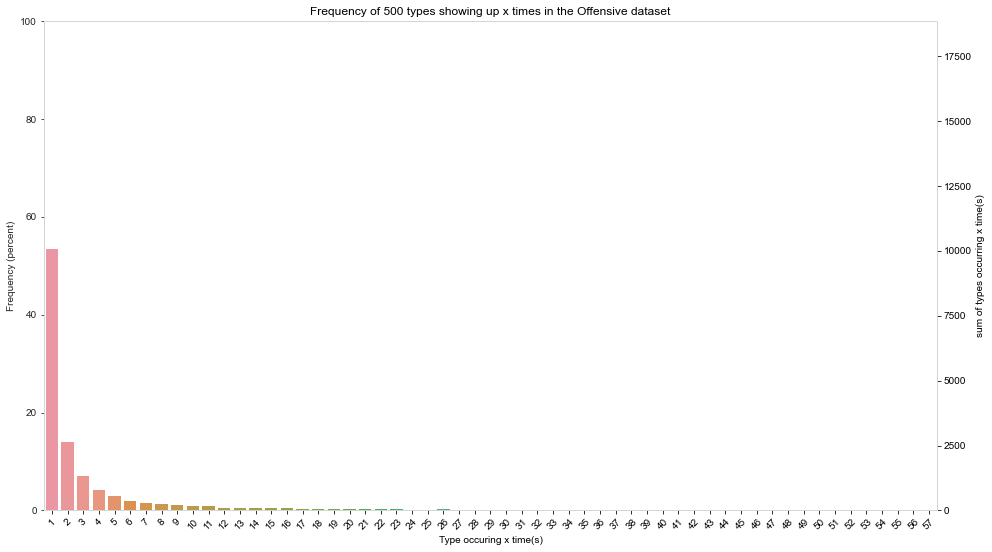

In [20]:
# Amount of types showing up x times in the offensive dataset (e.g 14000 tokens only showing up once, and so on)
# Skipping top 500 types, for visibility in plot (They're not impactful on the plot otherwise, the most frequent of 
#     these 500 entries is 13)
#Plotting visual and double y-axes found at https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies

fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(x="count", data=off_uniq[500:]) #Sns counts the type frequency of each word, and plots it
sns.set_style("darkgrid")
plt.title("Frequency of 500 types showing up x times in the Offensive dataset")
plt.xlabel("Type occuring x time(s)")
plt.ylabel("sum of types occurring x time(s)")
ax.tick_params('x',rotation=45, labelsize = 10) #xlabels are rotated 45 degrees and made bigger

# Twin axes, creating and visualising
ax2 = ax.twinx()
ax2.set_ylabel("Frequency (percent)")

# Moving the ticks and labels of y-axes to opposite sides for more visually pleasing plot
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

# Setting appropriate limits for the y-axes, removing duplicate grid
ax.set_ylim(0,len(off_uniq))
ax2.set_ylim(0,100)
ax2.grid(None)

### Noticable difference in the two datasets

<ul>
    <li>Big difference in size, sentiment dataset over twice the amount of tokens (=library twice the size)</li>
    <li>otherwise quite similar, in both sets the percentage of the vocabulary made up of tokens w. frq. 1 is ~ 56-57%</li>
    <ul><li>Both datasets also seem to follow Zipf's law (see below graphs)</li>
    </ul>
</ul>
    

### Corpus Statistics Consistent with Zipf's law?

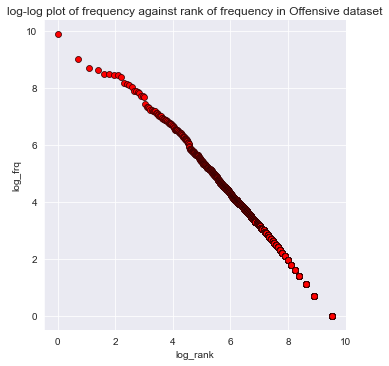

In [21]:
#log-log plot of the rank of token frequency against against the frequency in the offensive dataset
off_uniq["log_frq"] = np.log(off_uniq["count"])
off_uniq["log_rank"] = np.log(off_uniq["count"].rank(ascending=False))
sns.relplot(x="log_rank",y="log_frq", data=off_uniq, color="red", edgecolor=(0.2,0,0,0.01)).set(title=
                "log-log plot of frequency against rank of frequency in Offensive dataset")
plt.show()

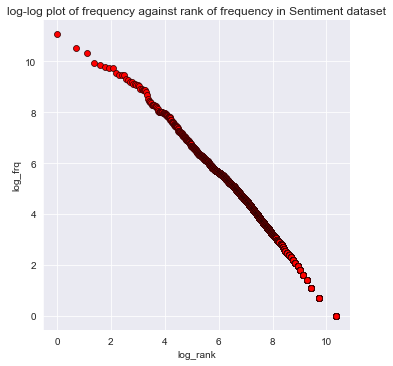

In [22]:
#log-log plot of the rank of token frequency against against the frequency in the sentiment dataset
sent_uniq["log_frq"] = np.log(sent_uniq["count"])
sent_uniq["log_rank"] = np.log(sent_uniq["count"].rank(ascending=False))
sns.relplot(x="log_rank",y="log_frq", data=sent_uniq, color="r", edgecolor=(0.2,0,0,0.01)).set(title=
                "log-log plot of frequency against rank of frequency in Sentiment dataset")
plt.show()

<b>As seen in the above plots, both datasets seem consistent with Zipf's law</b>

## Task 3: Manual Annotation & Inter-user Agreement

### Generating 100 random tweets for manual annotation

In [23]:
random.seed(42) #Seeded for consistency
random_tweets = random.sample(list(enumerate(sentiment_raw)),100)
rtweet_index = [i[0] for i in random_tweets]

# #File-generation is commented out, as the randomness is seeded, thus Making the same "Random" file every time
# with open("../data/interim/random_tweets.txt","w", encoding="utf-8") as f:
#     [f.write(str(i[1])+"\n") for i in random_tweets]

In [24]:
sent_label = pd.read_csv('../data/raw/sentiment/train_labels.txt',header=None)
sent_raw = pd.read_csv("../data/raw/sentiment/train_text.txt",header=None, sep="\n",quoting=3)

In [25]:
# display(sent_label.iloc[rtweet_index])
# display(sent_raw.iloc[rtweet_index])
len(sent_raw)

45615

In [26]:
#creating 100 random ints from the interval [0-2], for later testing

# test_labels = random.choices([0,1,2], k=100)
# with open("../data/interim/manual_annotation/random_test.txt","w", encoding="utf-8") as f:
#     [f.write(str(i)+"\n") for i in test_labels]

### Putting the manually annotated labels into a single dataframe

In [27]:
man_labels = pd.read_csv("../data/interim/manual_annotation/all_combined.csv", delimiter=",") #All manual labels
man_labels = man_labels.iloc[:,:-1] #Not using the _A0_value column from the file
display(man_labels) #The manually annotated labels, put into a dataframe

same_label = man_labels.eq(man_labels.iloc[:,0], axis=0).all(1) #Finding where all annotators agree on a label
display(same_label)
print("# of equal labels:",np.sum(same_label))
obs_agreement = np.sum(same_label)/len(man_labels.iloc[:,0])
print("observed agreement:",obs_agreement)

anno_1  anno_2  anno_3  anno_4
0        1       1       1       1
1        2       1       1       1
2        2       2       2       2
3        0       0       0       0
4        0       1       2       2
..     ...     ...     ...     ...
95       0       2       2       0
96       0       2       2       2
97       1       1       2       1
98       1       1       1       1
99       1       0       1       1

[100 rows x 4 columns]

0      True
1     False
2      True
3      True
4     False
      ...  
95    False
96    False
97    False
98     True
99    False
Length: 100, dtype: bool

# of equal labels: 34
observed agreement: 0.34


### Calculating Chance-corrected agreement

In [28]:
#Formatting manual label answers to calculate Scott's pi, Fleiss' kappa with nltk.agreement
tweets_len = len(man_labels.iloc[:,0])
formatted_answers = [] #Formatting of only the manually annotated data
for column in range(len(man_labels.columns)):
    for tweet_num in range(tweets_len):
        formatted_answers.append([column+1,tweet_num,man_labels.iloc[tweet_num,column]])

#adding the "True" labels to all_formatted:
all_formatted = formatted_answers.copy() #Formatting of BOTH the manually annotated data AND the "True" Annotation of the data
true_label_list = list(sent_label.iloc[rtweet_index][0])
for i in range(tweets_len):
    all_formatted.append([len(man_labels.columns)+1,i,true_label_list[i]])
    
print("lenght of formatted_answers:",len(formatted_answers))
print("length of all_formatted:",len(all_formatted)) #should be 100 characters longer than the above

lenght of formatted_answers: 400
length of all_formatted: 500


#### Chance-corrected for just the manual labels

In [29]:
"""
Note that in the nltk.agreement documentation: https://www.nltk.org/_modules/nltk/metrics/agreement.html
the returned value is the chance-corrected agreement, not just A_e.
"""
ratingtask = agreement.AnnotationTask(data=formatted_answers)
print("Scott's pi: {:.4f}\nCohen's kappa: {:.4f}\nFleiss' kappa: {:.4f}".format(ratingtask.pi(),ratingtask.kappa(),ratingtask.multi_kappa()))


Scott's pi: 0.3962
Cohen's kappa: 0.3950
Fleiss' kappa: 0.3968


#### Chance-corrected for both the manual labels AND the "true" labels

In [30]:
all_label_rating = agreement.AnnotationTask(data=all_formatted)
print("Scott's pi: {:.4f}\nCohen's kappa: {:.4f}\nFleiss' kappa: {:.4f}".format(all_label_rating.pi(),all_label_rating.kappa(),all_label_rating.multi_kappa()))


Scott's pi: 0.3911
Cohen's kappa: 0.3905
Fleiss' kappa: 0.3918


### Showing the tweets with agreeing/disagreeing manual labels for later discussion, saved to file

In [31]:
same_label[same_label==False]
manual_tweets = sent_raw.loc[rtweet_index]

#tweets labels disagree on
annotation_disagree = manual_tweets.iloc[np.where(same_label==False)]
display(annotation_disagree[:10])#Showing the 10 first tweets with disagreeing manual annotation

#tweets labels agree on
annotation_agree = manual_tweets.iloc[np.where(same_label==True)]

# File creation commented out
# annotation_disagree.to_csv("../data/interim/man_anno_disagree.txt", header=None, index=False)
# annotation_agree.to_csv("../data/interim/man_anno_agree.txt", header=None, index=False)

man_labels[same_label==True]["anno_1"][:10]

0
7296   Convenient location to the Georgia Dome: This ...
16049  In bed in Plymouth hotel for the last night of...
14628  Former Florida Gov. Jeb Bush said Thursday tha...
6717   Exciting weekend. Kitchen being fitted today F...
44348  Will the PM stand by and watch his colleagues ...
35741  @user take Niall's guitar and play on stage at...
5697   When you're sick of waiting for a book to come...
27651  "12 Ways June Squibb Is the New Jennifer Lawre...
2082   i want Michelle Obama to be president with Mic...
1952   @user @user As far as I know Rick Perry hasn't...

0     1
2     2
3     0
6     2
11    1
15    1
16    2
18    2
19    1
20    2
Name: anno_1, dtype: int64

### Showing the 10 pairs of inter-annotator agreements possible from 5 annotators (4 manual and the "True" labels)

In [32]:
man_and_true = man_labels.copy()
man_and_true["true"] = true_label_list
man_and_true


anno_1  anno_2  anno_3  anno_4  true
0        1       1       1       1     1
1        2       1       1       1     1
2        2       2       2       2     2
3        0       0       0       0     1
4        0       1       2       2     2
..     ...     ...     ...     ...   ...
95       0       2       2       0     0
96       0       2       2       2     2
97       1       1       2       1     2
98       1       1       1       1     1
99       1       0       1       1     0

[100 rows x 5 columns]

In [33]:
annotator_np = np.empty((5,5))

for i in range(len(man_and_true.columns)):
    for j in range(i, len(man_and_true.columns)):
        l1 = list(man_and_true.iloc[:,i])
        l2 = list(man_and_true.iloc[:,j])
        score = cohen_kappa_score(l1,l2)
        annotator_np[i,j] = score
        annotator_np[j,i] = score
#         if j==4:
#             print("Anno_{}, True:\n".format(i+1),score,"\n")
#         else:
#             print("Anno_{}, Anno_{}:\n".format(i+1,j+1),score,"\n")

print(annotator_np)


[[1.         0.49081932 0.15054271 0.626401   0.38471004]
 [0.49081932 1.         0.21371285 0.75023416 0.48757764]
 [0.15054271 0.21371285 1.         0.13820619 0.13372185]
 [0.626401   0.75023416 0.13820619 1.         0.52933794]
 [0.38471004 0.48757764 0.13372185 0.52933794 1.        ]]


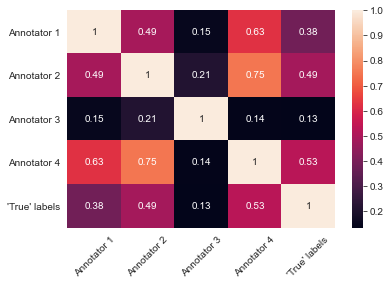

In [34]:
fig, ax = plt.subplots()
# im = ax.imshow(annotator_np) #Creates heatmap of above matrix

# # Shows all ticks
# ax.set_xticks(range(5))
# ax.set_yticks(range(5))
# # Labels ticks
# ax.set_xticklabels(["Annotator 1","Annotator 2",'Annotator 3',"Annotator 4","'True' labels"])
# ax.set_yticklabels(["Annotator 1","Annotator 2",'Annotator 3',"Annotator 4","'True' labels"])

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(5):
#     for j in range(5):
#         text = ax.text(j, i, annotator_np[i, j],
#                        ha="center", va="center", color="w")

# plt.grid(None)

sns.heatmap(data=annotator_np, annot=True,
            xticklabels= ["Annotator 1","Annotator 2",'Annotator 3',"Annotator 4","'True' labels"],
           yticklabels = ["Annotator 1","Annotator 2",'Annotator 3',"Annotator 4","'True' labels"])
ax.tick_params('x',rotation=45)

In [66]:
#Running inter-annotator agreement without Annotator 3:
just_three_annos = list(filter(lambda x: x[0] != 3, all_formatted))
just_three_annos
three_anno_rating = agreement.AnnotationTask(data=just_three_annos)
print("Scott's pi: {:.4f}\nCohen's kappa: {:.4f}\nFleiss' kappa: {:.4f}".format(three_anno_rating.pi(),three_anno_rating.kappa(),three_anno_rating.multi_kappa()))


Scott's pi: 0.5437
Cohen's kappa: 0.5448
Fleiss' kappa: 0.5443


## Automatic Prediction

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics



In [36]:
count_vec = CountVectorizer(tokenizer = lambda x: x, lowercase = False)

### First model on Offensive Language

In [37]:
# NOT USING OWN TOKENIZER, DONT USE IN FINAL REPORT
WRONG_OFF = count_vec.fit_transform(offensive_raw)
WRONG_OFF
#

<11916x514 sparse matrix of type '<class 'numpy.int64'>'
	with 321941 stored elements in Compressed Sparse Row format>

In [38]:
def import_(classification_task, file_name):
    with open("../data/raw/"+classification_task+"/"+file_name, "r", encoding="utf-8") as f:
        temp = [int(line.strip("\n")) for line in f]
    return(temp)

def import_and_tokenize(classification_task, file_name):
    with open("../data/raw/"+classification_task+"/"+file_name, "r", encoding="utf-8") as f:
        temp = [line for line in f]
    return(tokenizer(temp))

#Loading in offensive x-train, x-test, y-train, y-test

# x-train
ox_train = import_and_tokenize("offensive", "train_text.txt")

# x-test
ox_test = import_("offensive", "train_labels.txt")

# y-train
oy_train = import_and_tokenize("offensive", "test_text.txt")

# y-test
oy_test = import_("offensive", "test_labels.txt")



In [39]:
print(len(ox_train))
print(len(ox_test))
print(len(oy_train))
print(len(oy_test))

11916
11916
860
860


In [40]:
#Running Count_vectorizor (Pipeline for the coming commands)
count_ox_train = count_vec.fit_transform(ox_train)
count_ox_train

<11916x18849 sparse matrix of type '<class 'numpy.int64'>'
	with 230844 stored elements in Compressed Sparse Row format>

In [41]:
#Running tf_idf on off_train to "balance" tweets
tf_idf_transformer = TfidfTransformer(use_idf = False)
tf_off_train = tf_idf_transformer.fit_transform(count_ox_train)
tf_off_train

<11916x18849 sparse matrix of type '<class 'numpy.float64'>'
	with 230844 stored elements in Compressed Sparse Row format>

In [42]:
classifier = SGDClassifier(loss="log")

In [43]:
#Training model
off_clf = classifier.fit(tf_off_train, ox_test)

#Preparing validation data
off_pred = count_vec.transform(oy_train)
tf_off_pred = tf_idf_transformer.transform(off_pred)

#Fitting validation data over model
off_predicted = off_clf.predict(tf_off_pred)

# % of answers gotten right
sum((off_predicted == oy_test)) / len(oy_test)

0.786046511627907

In [44]:
print(metrics.classification_report(off_predicted, oy_test, target_names=["Not offensive","Offensive"]))

               precision    recall  f1-score   support

Not offensive       0.99      0.78      0.87       786
    Offensive       0.27      0.88      0.41        74

     accuracy                           0.79       860
    macro avg       0.63      0.83      0.64       860
 weighted avg       0.92      0.79      0.83       860



In [45]:
print(metrics.confusion_matrix(oy_test, off_predicted))

[[611   9]
 [175  65]]


As seen above, The recall is very close to 1 for non-offensive tweets and very close to 0 for offensive tweets.<br>
This means that the model predicts that most of the tweets are not offensive, and the only reason for our relatively high accuracy is that the training data is unbalanced.

In [46]:
#Checking offensive validation data compared to offensive predicted data
np_list_off = np.array(off_predicted)
np_off_validation = np.array(oy_test)
np_off_train = np.array(ox_test)

print("Number of predicted non-offensive tweets: {}\nNumber of predicted offensive tweets: {}\n".format(
len(np_list_off[np.where(np_list_off == 0)]),
len(np_list_off[np.where(np_list_off == 1)])))

print("Number of actual non-offensive tweets: {}\nNumber of actual offensive tweets: {}\n".format(
len(np_off_validation[np.where(np_off_validation == 0)]),
len(np_off_validation[np.where(np_off_validation == 1)])))

print("Number of training non-offensive tweets: {}\nNumber of training offensive tweets: {}".format(
len(np_off_train[np.where(np_off_train == 0)]),
len(np_off_train[np.where(np_off_train == 1)])))


Number of predicted non-offensive tweets: 786
Number of predicted offensive tweets: 74

Number of actual non-offensive tweets: 620
Number of actual offensive tweets: 240

Number of training non-offensive tweets: 7975
Number of training offensive tweets: 3941


## Other Models for the offensive dataset

In [47]:
def report_clf_stats(predicted, test, classification_task):
    name_dict = {"offensive": ["Not offensive","Offensive"], "sentiment": ["Negative", "Neutral", "Positive"]}
    #print("Accuracy:",np.mean(predicted==test),"\n")
    print(metrics.accuracy_score(test, predicted))
#     print("Negative Accuracy: {}      Neutral Accuracy: {}      Positive Accuracy: {}\n
#         Average Accuracy: {}").format()
    print(metrics.classification_report(predicted, test, target_names=name_dict[classification_task]),"\n")
    print(metrics.confusion_matrix(test, predicted))



In [50]:
#Pipeline for sgdclassifier
sgd_clf = Pipeline([
     ('vec', CountVectorizer(tokenizer = lambda x: x, lowercase = False, ngram_range=(1,3),
                            max_df = 0.7, min_df = 4, max_features = 1000)),
     ('tfidf', TfidfTransformer(use_idf=False)),
     ('clf', SGDClassifier(loss="log")),
])

sgd_clf.fit(ox_train, ox_test)
sgd_predicted2 = sgd_clf.predict(oy_train)
sgd_predicted2

report_clf_stats(sgd_predicted2, oy_test, "offensive")

0.7790697674418605
               precision    recall  f1-score   support

Not offensive       0.98      0.77      0.87       790
    Offensive       0.25      0.86      0.39        70

     accuracy                           0.78       860
    macro avg       0.62      0.81      0.63       860
 weighted avg       0.92      0.78      0.83       860
 

[[610  10]
 [180  60]]


<i> Highest Achieved accuracy score for SGDClassifier: 78.6% </i>

In [51]:
# MultinomialNB
multinb_clf = Pipeline([
     ('vec', CountVectorizer(tokenizer = lambda x: x, lowercase = False)),
     ('tfidf', TfidfTransformer(use_idf=False)),
     ('clf', MultinomialNB()),
])

multinb_clf.fit(ox_train, ox_test)
multinb_predict = multinb_clf.predict(oy_train)

report_clf_stats(multinb_predict, oy_test, "offensive")

0.7313953488372092
               precision    recall  f1-score   support

Not offensive       1.00      0.73      0.84       851
    Offensive       0.04      1.00      0.07         9

     accuracy                           0.73       860
    macro avg       0.52      0.86      0.46       860
 weighted avg       0.99      0.73      0.83       860
 

[[620   0]
 [231   9]]


In [52]:
#ComplementNB
complement_clf = Pipeline([
     ('vec', CountVectorizer(tokenizer = lambda x: x, lowercase = False)),
     ('tfidf', TfidfTransformer(use_idf=False)),
     ('clf', ComplementNB()),
])

complement_clf.fit(ox_train, ox_test)
complement_predict = complement_clf.predict(oy_train)

report_clf_stats(complement_predict, oy_test, "offensive")

0.7476744186046511
               precision    recall  f1-score   support

Not offensive       0.98      0.75      0.85       813
    Offensive       0.15      0.74      0.24        47

     accuracy                           0.75       860
    macro avg       0.56      0.75      0.55       860
 weighted avg       0.94      0.75      0.82       860
 

[[608  12]
 [205  35]]


In [53]:
# SVC
SVC_clf = Pipeline([
     ('vec', CountVectorizer(tokenizer = lambda x: x, lowercase = False)),
     ('tfidf', TfidfTransformer(use_idf=False)),
     ('clf', SVC(kernel='poly', degree = 3)),
])

SVC_clf.fit(ox_train, ox_test)
SVC_predict = SVC_clf.predict(oy_train)

report_clf_stats(SVC_predict, oy_test, "offensive")

#For SVC choose kernel = 'poly', degree=2 (or 3)

0.7534883720930232
               precision    recall  f1-score   support

Not offensive       0.99      0.75      0.85       816
    Offensive       0.15      0.82      0.25        44

     accuracy                           0.75       860
    macro avg       0.57      0.78      0.55       860
 weighted avg       0.94      0.75      0.82       860
 

[[612   8]
 [204  36]]


<i>"For your final systems, I suggest you report overall Accuracy as well as Precision, Recall and F-score for all classes.
"</i> - Lecturer

## Classifiers for the sentiment (multiclass) task

In [54]:
#use the following: Bayes, complement, SGD

In [55]:
#Loading in Sentiment x-train, x-test, y-train, y-test

# x-train
sx_train = import_and_tokenize("sentiment", "train_text.txt")

# x-test
sx_test = import_("sentiment", "train_labels.txt")

# y-train
sy_train = import_and_tokenize("sentiment", "test_text.txt")

# y-test
sy_test = import_("sentiment", "test_labels.txt")


In [56]:
# Bayes on Sentiment analysis

multinb_clf.fit(sx_train, sx_test)
sent_multinb = multinb_clf.predict(sy_train)

report_clf_stats(sent_multinb, sy_test, "sentiment")

0.5317486160859655
              precision    recall  f1-score   support

    Negative       0.00      0.53      0.00        15
     Neutral       0.88      0.53      0.66      9894
    Positive       0.55      0.55      0.55      2375

    accuracy                           0.53     12284
   macro avg       0.48      0.54      0.40     12284
weighted avg       0.81      0.53      0.64     12284
 

[[   8 3619  345]
 [   7 5212  718]
 [   0 1063 1312]]


In [57]:
# Complement on Sentiment

complement_clf.fit(sx_train, sx_test)
sent_complement = complement_clf.predict(sy_train)

report_clf_stats(sent_complement, sy_test, "sentiment")

0.5671605340280039
              precision    recall  f1-score   support

    Negative       0.37      0.60      0.46      2442
     Neutral       0.65      0.60      0.62      6452
    Positive       0.69      0.48      0.57      3390

    accuracy                           0.57     12284
   macro avg       0.57      0.56      0.55     12284
weighted avg       0.61      0.57      0.58     12284
 

[[1467 1943  562]
 [ 867 3871 1199]
 [ 108  638 1629]]


In [58]:
# SGD on Sentiment

sgd_clf.fit(sx_train, sx_test)
sent_sgd = sgd_clf.predict(sy_train)

report_clf_stats(sent_sgd, sy_test, "sentiment")



0.5298762618039726
              precision    recall  f1-score   support

    Negative       0.12      0.59      0.20       830
     Neutral       0.78      0.56      0.65      8345
    Positive       0.58      0.44      0.50      3109

    accuracy                           0.53     12284
   macro avg       0.49      0.53      0.45     12284
weighted avg       0.69      0.53      0.58     12284
 

[[ 488 2748  736]
 [ 291 4647  999]
 [  51  950 1374]]
